<img src='../sys/Title.png'>


<p style="text-align: right;"><font  face="Microsoft JhengHei"> 精算二部 決策支援系統科 黃喬敬 </font> </p>







<p style="text-align: center;"> <font size=100% face="Microsoft JhengHei">Classification 分類    </font>  </p>





<table>
  <tr>
    <th><font size=4% face="Arial Black" color="GOLD">Shortcut :  </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[從零開始](#BEGIN) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[結果](#ToBecontinued) </font></th>
  </tr>

</table>
<a id="BEGIN"></a>


------

# 從零開始



## <font color=DARKRED>設定輸入資料、目標欄位</font>




1.  
    ```python
    TrainDataFile = 'Train'

    ```
    引號中的 **Train**  改成自己上傳的檔案位置及名稱，以 ClaimRiskTrain 為例，修改如下
    ```python
    TrainDataFile = 'ClaimRiskTrain'
    ```
2. 
    ```python
    TestDataFile = 'Test'

    ```
    引號中的 **Test**  改成自己上傳的檔案位置及名稱，以 ClaimRiskTest17 為例，修改如下
    ```python
    TestDataFile = 'ClaimRiskTest17'
    ```
3. 
    ```python
    TargetColumn = 'Y'

    ```
    引號中的 **Y**  改成自己上傳的檔案中，要學習預測的目標欄位的名稱，以 ans 為例，修改如下
    ```python
    TargetColumn = 'ans'
    ```
4. 
    ```python
    DropColumns = ''

    ```
    引號中 填入自己上傳的檔案中，不需要學習的欄位名稱，多數欄位以逗號分隔，比如 ID 或是 電話 等等，以 '被保人ID', '理賠指數_2016' 為例，修改如下
    ```python
    TargetColumn = '被保人ID', '理賠指數_2016'
    ```
5. 
    ```python
    OutputAnswer = 'Test_Answer'

    ```
    引號中的 **Test_Answer**  改成預定產出各模型預測結果的檔名，也可以不必修改

<img src='../sys/NeedExe.png' style="float:left;width:27%;">
<img src='../sys/NeedModi.png' style="float:middle;width:27.2%;">


In [1]:
TrainDataFile = 'digits_train'
TestDataFile = 'digits_test'
TargetColumn = 'ans'
DropColumns = ''
OutputAnswer = 'digits_ans'

## 介面說明

In [2]:
'左方帶有 In [ ]  表示這是程式碼的區塊，在區塊內的程式碼可以執行，游標移至區塊內並按下 Shift + Enter ，即可執行此區塊內的程式'
'In [ ] 的中括號 [ ] 內的數字表示執行順序，在介面開啟之後執行過的變數都會存在 (除非重啟核心或重開介面) ，類似 Script 執行概念'

1 + 2
#a+9   #這行是用來產生錯誤範例用的

3

<img src='../sys/ErrorExample1.png' width="70%" >

* 錯誤訊息範例如上圖所示 <font color=OliveDrab size=4%> ↑ </font> ，請**觀察錯誤訊息原因並修改**後重新執行一次  Shift + Enter 

* 如果是之前的區塊執行造成的錯誤，則之前的區塊 (及過程中相關的區塊) 及錯誤區塊都要重新執行一次  Shift + Enter 


------
### 工具列介面

<img src='../sys/UIExample1.png' width="40%" >

執行介面範例如上圖所示 ， 包含數種功能 <font color=OliveDrab size=4%> ↑ </font> ，請依需求使用
* Interrupt: 中斷目前執行
* Restart & Run All : **全部重新執行**  如果已經執行過一次了，只是修改一點參數或是檔案想全部重跑，可以直接按這個


## 事前教學: 

### <font color=DARKSLATEBLUE>轉為註解 / 取消註解 : 可以全選(ctrl+a)整個區塊然後(ctrl+/)</font>

以下會針對各種資料及特徵進行不同處理，每份資料不一定需要哪種處理法，<font color=MIDNIGHTBLUE> **如果不需要請在指令前加上井字號 # 轉為註解** </font>

**範例 : **
```python
print('我不想要這行')
```
**加上井字號 # 轉為註解，把上面變成下面這樣 : ** 
```python
#print('我不想要這行')
```

**#不管它做了什麼，不需要的#掉就是了**


<font color=DARKSLATEBLUE  size=4%>快捷鍵 : 可以全選(ctrl+a)整個區塊然後(ctrl+/)</font>



------

## 符號說明

<font color=OliveDrab size=4%>◎◎◎ ↓ </font>  : 表示以下的程式原則上**不需更改**，一般而言是資料庫、設定或教學示範

<font color=Orange size=4%  >◎◎◎ ↓</font>  : 表示以下的程式需要**視資料情形更改**，一般而言是特徵選擇，請依需求調整

<font color=CRIMSON size=4%> ◎◎◎ ↓</font>  : 表示以下的程式**必需更改**，改為自己的資料名稱等等

<font  size=4%> ◎◎◎ ↓</font> : 程式功能或說明



## 資料型式   .CSV 檔案格式

### 資料型態 

本章節為 **Classification 分類**，目標值必需是**整數類別**，(True or False) 可視為二元分類 (0 or 1)；非整數會被視為整數處理

* 各項特徵值以數值為主，文字會被轉成數值 (比如 male/female 可能會被轉成 0/1 或 1/0) 

* 缺值或文字異常原則上會自動處理，但無法保證不會出錯

### 訓練資料格式
ID(不一定要，使用者自己辨認用)；目標值可以是特徵的其中一個，不一定要列在最後

ID | 特徵名1 | ... | 特徵名m | 目標值
---- | ---
id_1 | x_11 | ... | x_m1 | y_1
.. | .. | ... | .. | ..
id_n | x_1n | ... | x_mn | y_n



### 測試資料格式
ID(不一定要，使用者自己辨認用)；**欄位必需與訓練資料相同，或是欄位剛好少一欄目標值**



ID | 特徵名1 | ... | 特徵名m 
---- | ---
id_1 | x_11 | ... | x_m1
.. | .. | ... | .. 
id_n | x_1n | ... | x_mn 

*如果測試資料也包含目標欄位，可以在預測階段進行對答案計算準確率*  

也可以將其移除以便計算 (假設資料變數叫 TestData)

```python
TestData.drop(['目標值'],axis=1,inplace=True)
```




### 此教學範例說明
將使用 **理賠風險預測** 檔案進行範例實驗


註: 有隨機挖空及改動少數欄位以作為教學特徵處理

<table>
  <tr>
    <th><font size=4% face="Arial Black" color="GOLD">Shortcut :  </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[從零開始](#BEGIN) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[結果](#ToBecontinued) </font></th>
  </tr>

</table>
<a id="INPUT"></a>

#  <font color=RED>程式開始</font> 


## 載入資料庫
<font color=OliveDrab size=5%>◎◎◎ ↓ </font> : 載入各種資料庫並設定呈現方式等等，原則上這塊不要理他

<a id="BEGIN"></a>

<img src='../sys/NeedExe.png' style="float:left;width:27%;">

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
%autosave 180 
%matplotlib inline
#import scikitplot as skplt
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, Normalizer,QuantileTransformer 
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA, TruncatedSVD, NMF,MiniBatchSparsePCA,DictionaryLearning,FastICA,FactorAnalysis
from sklearn.manifold import TSNE
from sklearn.utils import shuffle
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,precision_score,recall_score,confusion_matrix,classification_report,cohen_kappa_score,hamming_loss,jaccard_similarity_score
from imblearn.under_sampling import RandomUnderSampler
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.graph_objs import *
import os
if not os.path.exists(r'Model'):
    os.makedirs(r'Model') 
import seaborn as sns


Autosaving every 180 seconds


<img src='../sys/NeedExe.png' style="float:left;width:27%;">

In [4]:
os.environ['KERAS_BACKEND']='tensorflow'
os.environ['MLENS_BACKEND']='multiprocessing'
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 144
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['axes.unicode_minus'] = False
sns.set(font_scale=0.6,font="Microsoft JhengHei")

import xlrd
import unicodecsv

def xls2csv (filename):
    if filename.split('.')[-1] == 'csv':
        return filename
    elif filename.split('.')[-1] not in ('xls', 'xlsx'):
        if os.path.exists(filename+'.csv'):
            return filename+'.csv'
        elif os.path.exists(filename+'.xls') :
            filenamexls = filename+'.xls'
        elif os.path.exists(filename+'.xlsx'):
            filenamexls = filename+'.xlsx'
    else:
        filenamexls = filename

    # Converts an Excel file to a CSV file.
    # If the excel file has multiple worksheets, only the first worksheet is converted.
    # Uses unicodecsv, so it will handle Unicode characters.
    # Uses a recent version of xlrd, so it should handle old .xls and new .xlsx equally well.

    wb = xlrd.open_workbook(filenamexls, encoding_override="cp950")
    sh = wb.sheet_by_index(0)

    filenamecsv = filenamexls.replace('xlsx','csv').replace('xls','csv')
    with open(filename+'.csv',"wb") as fh:
        csv_out = unicodecsv.writer(fh, encoding='utf-8')
        for row_number in range(sh.nrows):
            print(sh.row_values(row_number))
            force_decode(sh.row_values(row_number))
            csv_out.writerow(sh.row_values(row_number))

    fh.close()
    return filenamecsv

TrainDataFileCSV = xls2csv(TrainDataFile)
TestDataFileCSV = xls2csv(TestDataFile)
OutputAnswerCSV = OutputAnswer + '.csv'


###  <font color=DARKBLUE>決定隨機種子 及 平行化分工數目</font>
<font color=OliveDrab size=5%>◎◎◎ ↓ </font>   為了實驗的可再現性，通常會固定種子，原則上這塊就隨便訂一個固定值；平行化數目預設為核心數-2
<img src='../sys/NeedExe.png' style="float:left;width:27%;">

In [5]:
Random_State = 411

import multiprocessing
n_jobs = multiprocessing.cpu_count()-2

## <font color=DARKBLUE>輸入資料</font>

<font size=4%>◎◎◎ </font> 上方有數個區塊是引入資料庫的必需區塊，如未執行請回上方 [程式開始](#BEGIN) 執行 
<br>



<font size=4%, color=DARKRED>修改檔名</font>

<font color=CRIMSON> 請將下方程式中第二行 </font>

```python
TrainDataFile = r'ClaimRiskTrain.csv'

```
引號中的 **ClaimRiskTrain.csv**  改成自己上傳的檔案位置及名稱，以 Train.csv 為例，修改如下
```python
TrainDataFile = r'Train.csv'
```

-----
<font color = Brown , size=2%> **注意**  : 對 Training Data 所做的各種處理，也要對 Testing Data 做一樣的處理</font>



程式修改範例如下


```python
TestDataFile = r'ClaimRiskTest.csv'
```
引號中的 **ClaimRiskTrain.csv**  改成自己上傳的檔案位置及名稱，以 Test.csv 為例，修改如下

```python
TestDataFile = r'Test.csv'
```



## <font color=DARKRED>讀取檔案</font>
◎◎◎ 讀取檔案、印出前五行觀察 ◎◎◎
<font color=CRIMSON size=5%>◎◎◎ ↓ </font>  以下為範例，如需使用請將檔案上傳至同資料夾並更改檔名讀取

<img src='../sys/NeedExe.png' style="float:left;width:27%;">
<img src='../sys/NeedModi.png' style="float:middle;width:27.2%;">

<font color=CRIMSON size=3%>為節省系統空間，前次執行的預測結果與預測模型會直接刪除或覆蓋，請自行保留 Model 資料夾下的檔案 </font>  

In [6]:

try:
    TrainData = pd.read_csv(TrainDataFileCSV)
except UnicodeDecodeError:
    TrainData = pd.read_csv(TrainDataFileCSV, encoding='big5')


try:
    TestData = pd.read_csv(TestDataFileCSV)
except UnicodeDecodeError:
    TestData = pd.read_csv(TestDataFileCSV, encoding='big5')


try:
    os.remove(OutputAnswerCSV)
except OSError:
    pass

'觀察一下前五列資料'
TrainData.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,ans
0,0.0,0.0,2.0,14.0,14.0,6.0,0.0,0.0,0.0,0.0,10.0,15.0,11.0,15.0,2.0,0.0,0.0,3.0,16.0,3.0,0.0,12.0,6.0,0.0,0.0,3.0,9.0,0.0,0.0,9.0,10.0,0.0,0.0,10.0,11.0,0.0,0.0,8.0,12.0,0.0,0.0,7.0,16.0,1.0,0.0,11.0,13.0,0.0,0.0,0.0,15.0,14.0,12.0,15.0,10.0,0.0,0.0,0.0,3.0,14.0,16.0,13.0,5.0,0.0,0
1,0.0,0.0,4.0,13.0,14.0,16.0,3.0,0.0,0.0,0.0,6.0,11.0,10.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,14.0,0.0,0.0,0.0,0.0,9.0,16.0,16.0,16.0,12.0,0.0,0.0,0.0,15.0,13.0,16.0,7.0,2.0,0.0,0.0,0.0,0.0,8.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,14.0,6.0,0.0,0.0,0.0,0.0,0.0,8.0,13.0,1.0,0.0,0.0,0.0,7
2,0.0,2.0,10.0,16.0,12.0,0.0,0.0,0.0,0.0,12.0,14.0,12.0,16.0,5.0,0.0,0.0,0.0,2.0,0.0,4.0,16.0,7.0,1.0,0.0,0.0,0.0,4.0,15.0,16.0,16.0,10.0,0.0,0.0,1.0,16.0,16.0,12.0,5.0,2.0,0.0,0.0,0.0,15.0,12.0,1.0,0.0,0.0,0.0,0.0,1.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,3.0,0.0,0.0,0.0,0.0,7
3,0.0,0.0,2.0,11.0,13.0,4.0,0.0,0.0,0.0,1.0,13.0,7.0,8.0,15.0,0.0,0.0,0.0,6.0,11.0,0.0,5.0,13.0,0.0,0.0,0.0,9.0,7.0,2.0,14.0,14.0,0.0,0.0,0.0,3.0,14.0,15.0,8.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,0.0,0.0,0.0,11.0,7.0,0.0,10.0,7.0,0.0,0.0,0.0,4.0,10.0,15.0,15.0,3.0,0.0,9
4,0.0,0.0,8.0,16.0,14.0,15.0,0.0,0.0,0.0,0.0,13.0,11.0,15.0,11.0,0.0,0.0,0.0,4.0,14.0,1.0,13.0,5.0,0.0,0.0,0.0,3.0,7.0,8.0,16.0,4.0,3.0,0.0,0.0,0.0,14.0,16.0,16.0,13.0,7.0,0.0,0.0,0.0,5.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,6.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,6.0,0.0,0.0,0.0,0.0,7


## <font color=DARKRED>設定目標</font>


可以直接指定目標欄位，比如目標類別是"Y"，就設定為 TargetY = 'Y' 

```python
TargetY = 'Y'
```
引號中的 **Y**  改成自己上傳的檔案中，要預測的目標欄位名稱


-----

也可以用條件式設定並建立目標，比如資料中想以 *理賠指數_2016* 是否為零作為目標

```python                      
TrainData['Y'] = (TrainData['理賠指數_2016']>0).astype('int')
TestData['Y']  = (TestData['理賠指數_2016']>0).astype('int')
```

```python
TrainData['Y'] = (TrainData['理賠指數_2016']>0).astype('int')
TestData['Y'] = (TestData['理賠指數_2016']>0).astype('int')
```
一樣要設定 TargetY = 'Y'，用於之後的判別目標

-----


CSV檔案中，如果中文出現亂碼請使用UTF-8編碼；



◎◎◎ 檔案資訊中每欄的格式如果是 **object** ，代表資料欄位中有非數值的文字或異常

<font color = Brown , size=2%> 預測類別目標設定</font>

<font color=CRIMSON size=5%>◎◎◎ ↓ </font>  以下為範例展示，如需使用請將檔案放在同資料夾並更改檔名讀取

<img src='../sys/NeedExe.png' style="float:left;width:27%;">

In [7]:
'可以直接指定目標欄位'
TargetY = TargetColumn

'簡單檢閱資料資訊'
print(TrainData.info())
TestData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 65 columns):
0      898 non-null float64
1      898 non-null float64
2      898 non-null float64
3      898 non-null float64
4      898 non-null float64
5      898 non-null float64
6      898 non-null float64
7      898 non-null float64
8      898 non-null float64
9      898 non-null float64
10     898 non-null float64
11     898 non-null float64
12     898 non-null float64
13     898 non-null float64
14     898 non-null float64
15     898 non-null float64
16     898 non-null float64
17     898 non-null float64
18     898 non-null float64
19     898 non-null float64
20     898 non-null float64
21     898 non-null float64
22     898 non-null float64
23     898 non-null float64
24     898 non-null float64
25     898 non-null float64
26     898 non-null float64
27     898 non-null float64
28     898 non-null float64
29     898 non-null float64
30     898 non-null float64
31     898 non-null float64

- - - 
↑ 上方資料資訊中，如果 **dtypes: ** .... 最後有 **object(1)**，代表資料中有 **1** 個欄位是非數字 (2就是2欄是非數字)
- - - 
* 通常資料中會包含部份識別欄位，比如 ID 

* 這些欄位可以暫時移除，以供測試，程式碼範例如下，移除 **理賠指數_2016** 與 **被保人ID** 欄位，可自行修改欲刪除欄位。

```python
TrainData.drop(['理賠指數_2016','被保人ID'],axis=1,inplace=True, errors='ignore')
TestData.drop(['理賠指數_2016','被保人ID'],axis=1,inplace=True, errors='ignore')
```

<font color=Orange size=5%  >◎◎◎ ↓</font> 移除特定欄位，將不影響計算的欄位移除

<img src='../sys/NeedExe.png' style="float:left;width:27%;">

In [8]:
'移除不必要欄位，可能是 ID 或是轉換 TargetY 之前的原值，如果沒有就留空 即可'

TrainData.drop(list(DropColumns),axis=1,inplace=True, errors='ignore')
TestData.drop(list(DropColumns),axis=1,inplace=True, errors='ignore')


print(TrainData.columns.values)

'印出訓練資料及測試資料的筆數與欄位數'
print('訓練資料筆數：', TrainData.shape[0], '   訓練資料欄位數：',TrainData.shape[1])
print('測試資料筆數：', TestData.shape[0], '   測試資料欄位數：',TestData.shape[1])

temp = set(TrainData.columns.values) - set(TestData.columns.values) 
if not ((temp == set(TargetY) ) or (temp ==  set())):
    print('Train 與 Test 資料欄位不合，請確認欄位:' ,temp)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43'
 '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57'
 '58' '59' '60' '61' '62' '63' 'ans']
訓練資料筆數： 898    訓練資料欄位數： 65
測試資料筆數： 899    測試資料欄位數： 65


<table>
  <tr>
    <th><font size=4% face="Arial Black" color="GOLD">Shortcut :  </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[從零開始](#BEGIN) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[結果](#ToBecontinued) </font></th>
  </tr>

</table>
<a id="PREPROCESS"></a>

# 特徵處理

異常欄位值、缺失值簡易處理

------
## <font color=DARKBLUE>非數值特徵轉為數值</font>

如果不需要請在指令前加上井字號 # 轉為註解 

風險是如果資料有異常字元，會被硬轉成數字，請自行確認資料 

◎◎◎ 建立類別轉換器、列出非數字欄位名稱、將非數字欄位轉為數字 ◎◎◎

<font color=Orange size=5%>◎◎◎ ↓ </font> 以下是將欄位中，不是數字類別的資料欄視為字串類別，並轉為數字。

In [9]:
'注意 : 對 Training Data 所做的各種處理，也要對 Testing Data 做一樣的處理 '
'''把非數字特徵轉為數字'''
le = LabelEncoder()
print('非數字轉換為數字的欄位: ')
for feature in list(TrainData.select_dtypes(include=[object]).columns.values):
    print(feature,', ',end='')
    TrainData.loc[~TrainData[feature].isnull(), feature] = le.fit_transform(TrainData.loc[~TrainData[feature].isnull(), feature])

for feature in list(TestData.select_dtypes(include=[object]).columns.values):
    print(feature,', ',end='')
    TestData.loc[~TestData[feature].isnull(), feature] = le.fit_transform(TestData.loc[~TestData[feature].isnull(), feature])    

非數字轉換為數字的欄位: 


------
## <font color=DARKBLUE>填補缺失值</font>

◎◎◎ 先檢閱缺失值，指令可以看出哪些欄有缺失值，依缺失值多寡列出  (欄位太多則只顯示前10)

◎◎◎ 如果印出值全都有 >0 代表可能有 20欄以上的欄位有缺失值，可修改 (10) 為更多，比如 (50) 以供觀察

<font color=OliveDrab size=5%>◎◎◎ ↓ </font>   檢閱缺失值並列出

In [10]:
TrainData.isnull().sum().sort_values(ascending=False).head(10)

ans    0
31     0
29     0
28     0
27     0
26     0
25     0
24     0
23     0
22     0
dtype: int64

### <font color=DARKBLUE>逐欄填補缺失值</font>
#### 填值



<font color=CRIMSON>請將下方兩處 ['feature'] 中的 <font color=DARKCYAN>**feature** </font> 改成上方觀察到的有缺失值的欄位名稱</font> 
```python
TrainData['feature'].fillna(TrainData['feature'].mode(),inplace=True)
```
比如改為
```python
TrainData['缺值'].fillna(TrainData['缺值'].mode(),inplace=True)
```

或是改為如下，則全部填 -999 
```python
TrainData['缺值'].fillna( -999 ,inplace=True)
```

* mode() 眾數 
* mean() 平均數

**如果需要使用請移除指令前的井字號 #**

<font color=Orange size=5%>◎◎◎ ↓ </font>  逐欄填值方法之一，使用該欄位的眾數填值

In [11]:
# TrainData['feature'].fillna(TrainData['feature'].mode(),inplace=True)
# TestData['feature'].fillna(TestData['feature'].mode(),inplace=True)

#### 分有無

<font color=CRIMSON>請將下方程式的兩處 ['feature'] 中的 <font color=DARKCYAN>**feature** </font> 改成上方觀察到的有缺失值的欄位名稱</font> 
```python
TrainData.loc[TrainData.feature.notnull(),'feature'] = 1
```
比如改為
```python
TrainData.loc[TrainData.feature.notnull(),'feature'] = 1
```

**如果需要使用請移除指令前的井字號 #**

<font color=Orange size=5%>◎◎◎ ↓ </font>  逐欄填值方法之一，直接將該欄分成有值(1)跟缺值(0)

In [12]:
# TrainData.loc[TrainData.feature.notnull(),'feature']=1
# TrainData.loc[TrainData.feature.isnull(),'feature']=0

# TestData.loc[TestData.feature.notnull(),'feature']=1
# TestData.loc[TestData.feature.isnull(),'feature']=0

------
### <font color=DARKBLUE>全面填補缺失值</font>

◎◎◎<font  color=red >**下列兩方法請擇一進行**</font>

嚴格來說，進行資料分析時應針對各項缺值使用不同方法填值

如果不需要請在指令前加上井字號 # 轉為註解 


#### <font color=DARKBLUE>全部填值</font>
把所有空值全部填入設定值, 請將 -1 數值修改

```python
TrainData.fillna(-1, inplace=True)
```

改為想要的填入值，例如 -999

```python
TrainData.fillna(-999, inplace=True)
```
**如果需要使用請移除指令前的井字號 #**
<font color=Orange size=5%>◎◎◎ ↓</font>  將資料空欄全部填入指定數值

In [13]:
# TrainData.fillna(-1, inplace=True)

# TestData.fillna(-1, inplace=True)

#### <font color=DARKBLUE>全部取眾數</font>
<font color=Orange  >◎◎◎ ↓</font>  : 建立填值類別方法，直接把所有資料缺值填入該欄位的眾數，填完之後再次印出缺失值檢閱確認
<br>    
 此處是直接全部填進眾數 <font color=blue  >.mode()[0]</font>，可以修改為 **.mean() 平均值** 或 **.min() 最小值** 等等。
 (原先是非數字轉數字的欄位仍會使用眾數)
 
 嚴格來說，進行資料分析時應針對各項缺值使用不同方法填值
 
 **如果不需使用請在指令前加上井字號 #**
 
 <font color=Orange size=5%>◎◎◎ ↓</font>  將資料空欄全部填入眾數，包含原先是字串的欄位

In [14]:
class DataFrameImputer(TransformerMixin):
    def __init__(self):
        """Impute missing values.
        Columns of dtype object are imputed with the most frequent value 
        in column.
        Columns of other types are imputed with mode of column.
        """
     
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mode()[0] for c in X],
            index=X.columns)
        
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)
    
TrainData = DataFrameImputer().fit_transform(TrainData)   
TestData = DataFrameImputer().fit_transform(TestData)   



## 特徵轉換

有時候某些特徵經過轉換之後表現較佳，金額或許是其中一個可能的例子，以下範例為將 '收入NTD' 轉換為其 log10 值 

**如果需要使用請移除指令前的井字號 #**

<font color=OliveDrab size=5%>◎◎◎ ↓ </font>    以下範例是轉換特徵

In [15]:
# TrainData.loc[TrainData['收入_NTD']>0,'收入_NTD'] = np.log10(TrainData.loc[TrainData['收入_NTD']>0,'收入_NTD'])
# TestData.loc[TestData['收入_NTD']>0,'收入_NTD'] = np.log10(TestData.loc[TestData['收入_NTD']>0,'收入_NTD'])

------
## <font color=DARKBLUE>粹取特徵</font>

* 粹取特徵應依資料不同而定，以下舉例是以逐年理賠金額粹取特徵

* 可在觀察資料之後自行粹取重要特徵

程式說明:

* 針對特徵名稱包含 '指數_' 的欄位粹取特徵
```python
X_features = Kernel_Scaler.fit_transform(TrainData.drop([TargetY],axis=1).filter(s for s in TrainData.drop([TargetY],axis=1).columns.values if '指數_' in s))
```

* 建立新特徵，依序為 '指數RBF\__1' , '指數RBF\__2' ....
```python
for i in range(X_features.shape[1]):
    TrainData['指數RBF__'+ str(i+1)] = X_features[:,i]
```

<font color = Brown , size=2%> **注意**  : 對 Training Data 所做的各種處理，也要對 Testing Data 做一樣的處理</font>


**如果需要使用請移除指令前的井字號 #**

<font color=OliveDrab size=5%>◎◎◎ ↓ </font>    以下範例是以 PCA 及 RBF Kernel ，針對各年指數，各粹取特徵 10 個特徵 (非指數部份亦分開粹取 RBF )

In [16]:
# from sklearn.kernel_approximation import RBFSampler
# Scaler = QuantileTransformer()
# rbf_feature = RBFSampler(gamma=0.1, random_state=Random_State, n_components=10)
# Kernel_Scaler = make_pipeline(Scaler, rbf_feature)

# X_features = Kernel_Scaler.fit_transform(TrainData.drop([TargetY],axis=1).filter(s for s in TrainData.drop([TargetY],axis=1).columns.values if '指數_' in s))
# for i in range(X_features.shape[1]):
#     TrainData['指數RBF__'+ str(i+1)] = X_features[:,i]

# X_features = Kernel_Scaler.fit_transform(TestData.drop([TargetY],axis=1).filter(s for s in TestData.drop([TargetY],axis=1).columns.values if '指數_' in s))
# for i in range(X_features.shape[1]):
#     TestData['指數RBF__'+ str(i+1)] = X_features[:,i]

    

# X_features = Kernel_Scaler.fit_transform(TrainData.drop([TargetY],axis=1).filter(s for s in TrainData.drop([TargetY],axis=1).columns.values if '指數_' not in s))
# for i in range(X_features.shape[1]):
#     TrainData['RBF__'+ str(i+1)] = X_features[:,i]

# X_features = Kernel_Scaler.fit_transform(TestData.drop([TargetY],axis=1).filter(s for s in TestData.drop([TargetY],axis=1).columns.values if '指數_' not in s))
# for i in range(X_features.shape[1]):
#     TestData['RBF__'+ str(i+1)] = X_features[:,i]


# reducedPCA = PCA(n_components=10)
# reducedICA = FastICA(n_components=10)
# reduced_Scaler = make_pipeline(Scaler, reducedPCA)

# X_features = reduced_Scaler.fit_transform(TrainData.drop([TargetY],axis=1).filter(s for s in TrainData.drop([TargetY],axis=1).columns.values if '指數_' in s))
# for i in range(X_features.shape[1]):
#     TrainData['指數pca_'+ str(i+1)] = X_features[:,i]

# X_features = reduced_Scaler.fit_transform(TestData.drop([TargetY],axis=1).filter(s for s in TestData.drop([TargetY],axis=1).columns.values if '指數_' in s))
# for i in range(X_features.shape[1]):
#     TestData['指數pca_'+ str(i+1)] = X_features[:,i]
    
    
    
# reducedICA = FastICA(n_components=10)
# reduced_Scaler = make_pipeline(Scaler, reducedICA)

# X_features = reduced_Scaler.fit_transform(TrainData.drop([TargetY],axis=1).filter(s for s in TrainData.drop([TargetY],axis=1).columns.values if '指數_' in s))
# for i in range(X_features.shape[1]):
#     TrainData['指數ICA_'+ str(i+1)] = X_features[:,i]

# X_features = reduced_Scaler.fit_transform(TestData.drop([TargetY],axis=1).filter(s for s in TestData.drop([TargetY],axis=1).columns.values if '指數_' in s))
# for i in range(X_features.shape[1]):
#     TestData['指數ICA_'+ str(i+1)] = X_features[:,i]
    


# TrainData.drop([s for s in TrainData.columns.values if '指數_2' in s],axis=1,inplace=True)
# TestData.drop([s for s in TestData.columns.values if '指數_2' in s],axis=1,inplace=True)

# # print(TrainData.columns.values)

<table>
  <tr>
    <th><font size=4% face="Arial Black" color="GOLD">Shortcut :  </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[從零開始](#BEGIN) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[結果](#ToBecontinued) </font></th>
  </tr>

</table>
<a id="OBSERVATION"></a>

------
# <font color=DARKBLUE>觀察資料</font>
觀察資料是很重要的一步，以下為基本幾種檢視方式
<br>
<font color=MIDNIGHTBLUE>! 如果不需要請在指令前加上井字號 # 轉為註解 !</font>



## <font color=DARKBLUE>觀察各特徵散佈區間</font>



請將下方程式中的中欄位名稱修改

```python
sns.boxplot(data=TrainData.iloc[:,5:35]);
```

<font color=blue >**5**</font> 與 <font color=blue >**35**</font> 改為自定欄位編號，意思是觀察欄位區間從前者看到後者，也可以使用欄位名稱，比如 

```python
sns.boxplot(data=TrainData.loc[:,'BMI':'被保人性別']);
```

-----



此範例以對 Training Data 做觀察處理為主， Testing Data 請自行觀測

<font color=Orange size=5%>◎◎◎ ↓</font>  印出各欄位名稱，再畫出特定欄位區間的特徵散佈

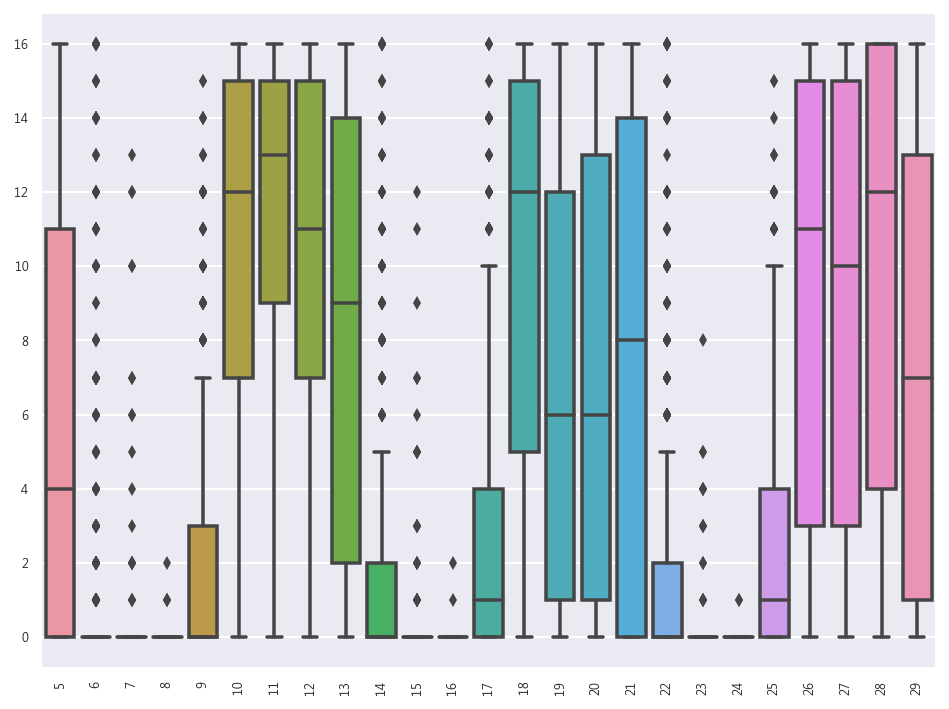

In [17]:
plot = sns.boxplot(data=TrainData.iloc[:,5:30]);
plot.set_xticklabels(plot.get_xticklabels(), rotation=90);

 ### <font color=DARKBLUE>移除部份欄位</font>
 
 移除影響分佈觀察的欄位再觀察一次，這個流程可能會重複數次以觀察各欄位分佈情形
 
<font color=Orange size=5%>◎◎◎ ↓</font>  選擇影響分佈觀察的欄位， 請將 **drop(['B5到達年齡'])** 中的欄位名改為自定欄位名

In [18]:
# '''移除較不同的分佈以觀察其它特徵'''
# plot = sns.boxplot(data=TrainData.drop(['B5到達年齡'],axis=1).iloc[:,0:15]);
# plot.set_xticklabels(plot.get_xticklabels(), rotation=90);

### <font color=DARKBLUE>觀察特定欄位</font>

如果不需要請在指令前加上井字號 # 轉為註解

<font color=Orange size=5%>◎◎◎ ↓</font>  觀察特定欄位分佈， 請將 **['Total']** 中的欄位名**Total**名改為自定欄位名

In [19]:
# TrainData['役別'].describe()

## <font color=DARKBLUE>關聯矩陣</font>


-----
<font color = Brown , size=2%> **注意**  : 對 Training Data 所做的各種處理，也要對 Testing Data 做一樣的處理</font>



此範例以對 Training Data 做觀察處理為主， Testing Data 請自行觀測

如果類別比例懸殊，建議使用降採樣 (或其它方法) 進行預處理



<font color=Orange size=5%>◎◎◎ ↓</font> 將資料分為學習資料X與目標值Y 
<a id="DEFINEXY"></a>

In [20]:

TrainX = TrainData.drop([TargetY],axis=1)
TrainY = TrainData[TargetY]

'降採樣，如不需使用請加上註解'
rus = RandomUnderSampler(return_indices=True,ratio='auto',random_state=Random_State)
TrainX, TrainY, idx_resampled = rus.fit_sample(TrainData.drop([TargetY],axis=1), TrainData[TargetY])

'洗牌打亂'
TrainX,TrainY =  shuffle(TrainX, TrainY ,random_state=Random_State)

TrainX = pd.DataFrame(TrainX,columns=TrainData.drop([TargetY],axis=1).columns)
TrainY = pd.Series(TrainY)

TestX = TestData if TargetY not in TestData.columns else TestData.drop([TargetY],axis=1)
TestY = 0 if TargetY not in TestData.columns else TestData[TargetY]


◎◎◎ 如果特徵欄位太多，呈現圖太密密麻麻，請使用以下指令觀察特定欄位區間:
```python
temp = TrainX.iloc[:,50:80].copy()
```

以取代原本的 **temp = TrainX.copy()** ，請將上述指令中的觀察欄位名 **50** 及 **80** 名改為自定目標欄位編號，意思是從 50 看到 80 欄 
<font color=Orange size=5%>◎◎◎ ↓</font> 計算X與Y的關係並畫出

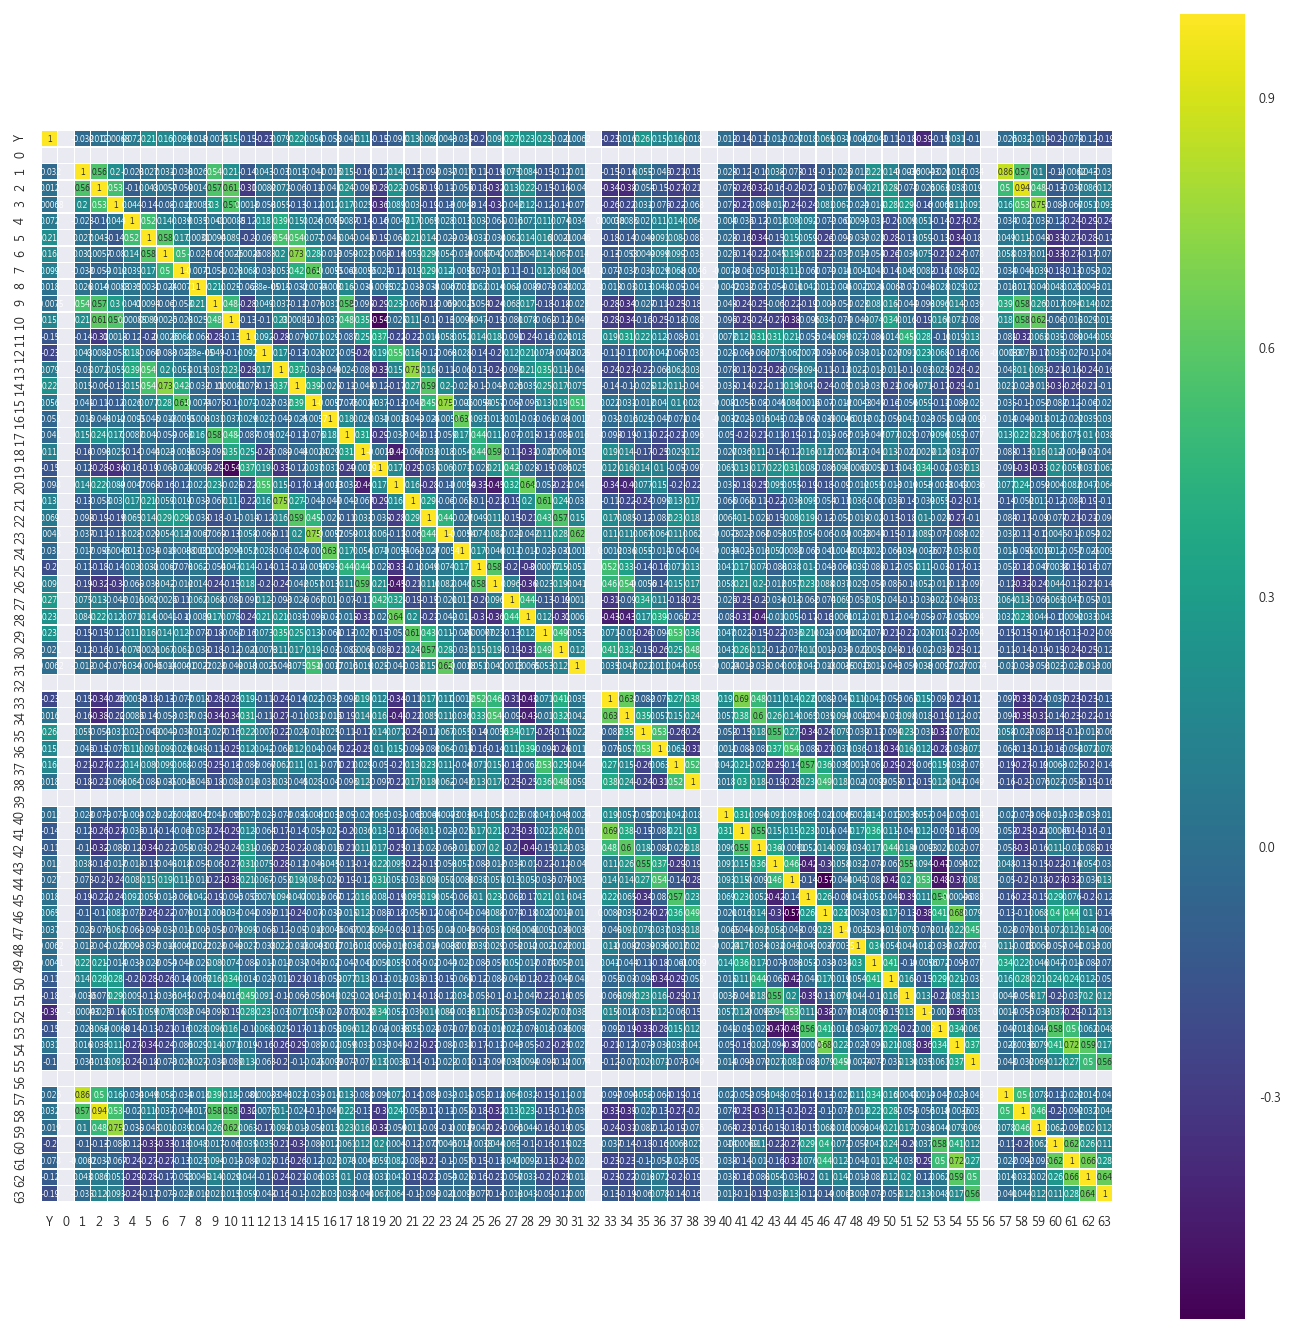

In [21]:
plt.rcParams['figure.figsize'] = (12,12)
temp = TrainX.iloc[:,0:80].copy()
temp.insert(0,'Y',TrainY)
corrmat = temp.corr()
corr = sns.heatmap(corrmat.astype(float),linewidths=0.1,vmax=1.0, square=True, cmap= plt.cm.viridis, linecolor='white', annot=True,annot_kws={"size": 4});

以上圖為例，可以看到以下欄位其實都是常數，不會改變，所以在本次實驗中可以移除以降低演算法時間複雜度
```PYTHON
['婚姻狀況3','婚姻狀況4']
```
可以使用以下指令移除
```PYTHON
    TrainData.drop(['婚姻狀況3','婚姻狀況4'],axis=1,inplace=True)
    TestData.drop(['婚姻狀況3','婚姻狀況4'],axis=1,inplace=True)
```
<font color=Orange size=5%>◎◎◎ ↓ </font> 如需使用請解除註解 #

In [22]:
# TrainData.drop(['有幾張主約之效力_41','有幾張主約之效力_53','有幾張主約之效力_47','有幾張主約之效力_52'],axis=1,inplace=True)
# TestData.drop(['有幾張主約之效力_41','有幾張主約之效力_53','有幾張主約之效力_47','有幾張主約之效力_52'],axis=1,inplace=True)

## <font color=DARKBLUE>觀察類別分佈</font>
<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  目標類別的分佈會影響結果，一般而言會希望各類別數量相似，太過懸殊建議先以降採樣處理
預設直接進行降採樣，這邊印出的數字是降採樣後的，畫長條圖的則是原始資料的

9    79
8    79
7    79
6    79
5    79
4    79
3    79
2    79
1    79
0    79
dtype: int64


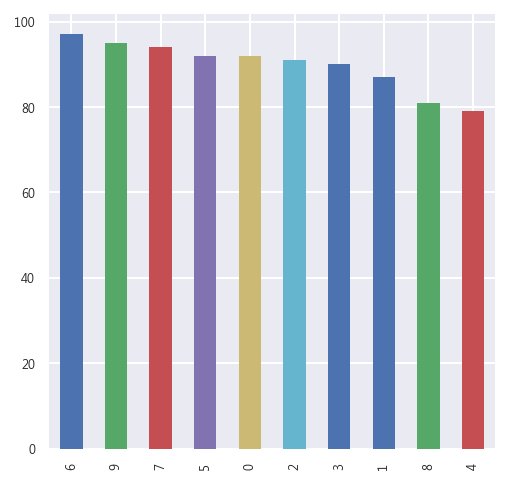

In [23]:
print(TrainY.value_counts())
TrainData[TargetY].value_counts().plot(kind='bar', figsize=(4, 4))


## <font color=DARKBLUE>觀察整體資料散佈情形，以PCA降維畫出</font>

在進行 Classification 分類時，常會以各種降維方式，將資料散佈圖畫出，使用不同顏色表示不同類別，藉以觀察分類問題的難度


* reduced3 = PCA(n_components=3)
* reduced3 = TSNE(n_components=3)
* reduced3 = NMF(n_components=3)  註: 不能有負值

◎◎◎ Scaler方式也有其它方式可以挑選
* Scaler = QuantileTransformer()
* Scaler = MinMaxScaler()
* Scaler = StandardScaler()
* Scaler = RobustScaler()


<font color=Orange size=5%>◎◎◎ ↓</font> 將資料降維，選擇使用的 降維 及 Scaler 方法，可以增加或移除註解#自行選擇想用的方法

In [24]:

#Scaler = MinMaxScaler(feature_range=(0, 1))
#Scaler = StandardScaler()
#Scaler = RobustScaler()
#Scaler = Normalizer()
Scaler = QuantileTransformer()


#reduced3 = FastICA(n_components=3)
#reduced3 = TSNE(n_components=3)
#reduced3 = FactorAnalysis(n_components=3)
reduced3 = PCA(n_components=3)
#reduced3 = NMF(n_components=3)
#reduced3 = TruncatedSVD(n_components=3)
#reduced3 = LinearDiscriminantAnalysis(n_components=3)

Reduce3_Scaler = make_pipeline(Scaler, reduced3)




<img  src='../sys/sphx_glr_plot_pca_vs_lda_001.png' style="float:right;width:50%;">
如果是不困難的分類問題，降維後畫出來應該顏色混雜度很低，比如 PCA降維後的 的知名鳶尾花資料集，如圖所示：

- - - - -

◎◎◎ 最後一行為圖檔存檔指令，可將 # 註解移除並修改存檔檔名以儲存圖檔
```PYTHON
plt.savefig('存檔檔名.jpg', dpi = 300);
```
<font color=OliveDrab size=5%>◎◎◎ ↓</font> 將資料降維並畫出，如果超過5000個樣本會只畫5000個

[[-0.82440933  0.91023557 -0.01630762]]


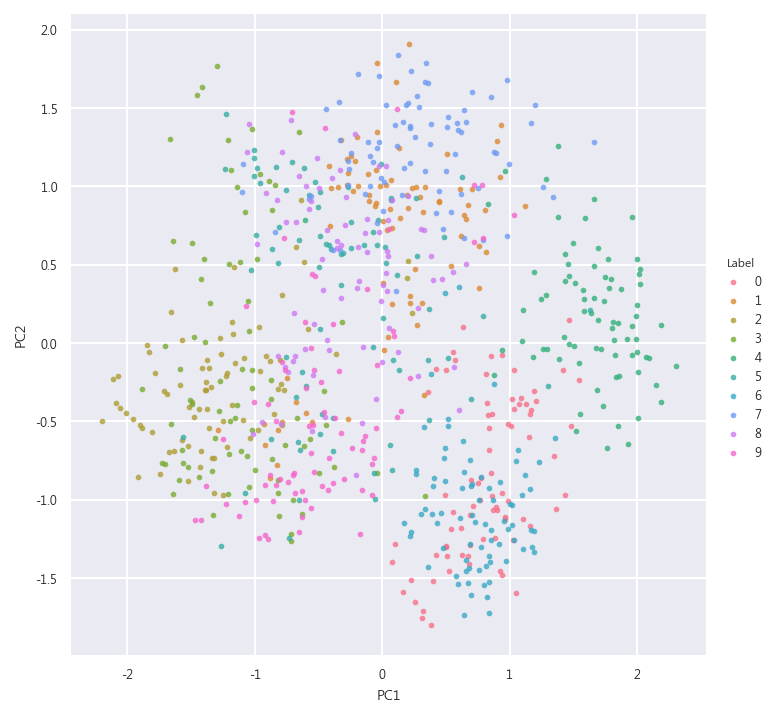

In [25]:
Draw_X = TrainX[:min(5000,TrainX.shape[0])]
Draw_Y = TrainY[:min(5000,TrainY.shape[0])]
DataX_Reduced = Reduce3_Scaler.fit_transform(Draw_X,Draw_Y)
print(DataX_Reduced[:1])

DataFrameX = pd.DataFrame(DataX_Reduced, columns = ['PC1', 'PC2', 'PC3'])
DataFrameX['Label'] = Draw_Y.values

sns.lmplot(x='PC1', y='PC2', data = DataFrameX, hue = 'Label',fit_reg=False, scatter_kws={'s':8});
#plt.savefig('destfile.jpg', dpi = 300);

### <font color=DARKBLUE>可旋轉的模組畫出三維的情形</font>

<font color=OliveDrab size=5%>◎◎◎ ↓ </font>   使用另一個可旋轉的模組畫出三維分佈圖，以觀察各種角度下的類別分佈情形

In [26]:
#Plot scatter 3d
traces = []
for name in set(Draw_Y):
    trace = Scatter3d(
        x=DataX_Reduced[Draw_Y==name,0],
        y=DataX_Reduced[Draw_Y==name,1],
        z=DataX_Reduced[Draw_Y==name,2],
        mode='markers',
        name=name,
        marker={ 'size': "3"},)
    traces.append(trace)
data = Data(traces)
layout = Layout(xaxis=XAxis(title='PC1', showline=False),
                yaxis=YAxis(title='PC2', showline=False),
                margin=dict(
                    l=0,
                    r=0,
                    b=0,
                    t=0))
fig = Figure(data=data, layout=layout)
py.iplot(fig,filename='TrainData-3d-scatter')

<table>
  <tr>
    <th><font size=4% face="Arial Black" color="GOLD">Shortcut :  </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[從零開始](#BEGIN) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[結果](#ToBecontinued) </font></th>
  </tr>

</table>
<a id="CLASSIFICATION"></a>

------

------
# <font color=DARKBLUE>開始分類</font>

<font color = Brown , size=2%> **注意**  : 對 Training Data 所做的各種處理，也要對 Testing Data 做一樣的處理</font>

## <font color=RED>資料驗證與演算法</font> 
<font color=RED>在進行機器學習之前，本節欄位請務必執行，以確認各資料
</font> 
<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  檢查輸入資料

<img src='../sys/NeedExe.png' style="float:left;width:27%;">

In [27]:
if TrainData.isnull().sum().sum() >0 or TestData.isnull().sum().sum() >0 :
    print('請回到 填補缺失值 章節進行填值處理')
if list(TrainData.select_dtypes(include=[object]).columns) != [] or list(TestData.select_dtypes(include=[object]).columns) != []:
    print('請回到 將非數值特徵轉為數值 章節進行非數值特徵處理')


<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  設定資料，並進行 under sampling，如不需要請將最後三行加上#字註解

<img src='../sys/NeedExe.png' style="float:left;width:27%;">

In [28]:
TrainX =  TrainData.drop([TargetY],axis=1)
TrainY =  TrainData[TargetY]

TestX = TestData if TargetY not in TestData.columns else TestData.drop([TargetY],axis=1)
TestY = 0 if TargetY not in TestData.columns else TestData[TargetY].astype('int')


from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(return_indices=True,ratio='auto',random_state=Random_State)
TrainX, TrainY, idx_resampled = rus.fit_sample(TrainData.drop([TargetY],axis=1), TrainData[TargetY])

### Scaler
在執行分類演算法之前，時常需對資料進行前處理，將資料 Scaler 化。在此將各欄位 Scaler 先行計算。
<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  計算 Train 與 Test 的 Scaler值，可以選擇 Scaler 方法，預設為 QuantileTransformer

<img src='../sys/NeedExe.png' style="float:left;width:27%;">

In [29]:
Scaler = QuantileTransformer()
#Scaler = StandardScaler()
#Scaler = RobustScaler()
#Scaler = Normalizer()

TrainX_Scaler = Scaler.fit_transform(TrainX)
TestX_Scaler = Scaler.transform(TestX)

### Shuffle
<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  許多機器學習演算法的學習順序會有一定影響，故在此將原始分佈打亂

<img src='../sys/NeedExe.png' style="float:left;width:27%;">

In [30]:
TrainX, TrainX_Scaler, TrainY = shuffle(TrainX, TrainX_Scaler, TrainY, random_state=Random_State)

TrainX = pd.DataFrame(TrainX,columns=TrainData.drop([TargetY],axis=1).columns)
TrainX_Scaler = pd.DataFrame(TrainX_Scaler,columns=TrainData.drop([TargetY],axis=1).columns)
TrainY = pd.Series(TrainY)    


'同時建立表格儲存真實答案'
TrainPredict = pd.DataFrame(TrainY.values,columns=['Truth'])


本範例中以 **4-fold** 進行驗證，以 **75%** 的有答案資料 (Training Data)進行建模，以剩餘的 **25%** (valid)來計算正確率。

* train_test_split : 將資料進行切分去訓練模型

<font color=OliveDrab size=5%>◎◎◎ ↓ </font> train_test_split 切分訓練及驗證

<img src='../sys/NeedExe.png' style="float:left;width:27%;">

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_valid, X_train_sc, X_valid_sc, y_train, y_valid = train_test_split(TrainX, TrainX_Scaler, TrainY, test_size=0.25, random_state=Random_State)

### 分類演算法
接下來會使用數種分類演算法進行分類，儲存分類模型並產出分類結果

<font color=CRISOM>每個演算法都會產生預測答案的欄位 (可能包含答案與其機率) ，並存於 Test_answer.CSV 檔案中，如果重複執行演算法，則前次結果會被覆蓋掉 </font> 


<br>
<font color=RED>在進行機器學習之前，本欄位請務必執行，以載入各種資料庫  </font> 


<font color=OliveDrab size=5%> ◎◎◎ ↓ </font> 導入演算法資料庫並建立 Baseline 分類器

<img src='../sys/NeedExe.png' style="float:left;width:27%;">

In [32]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import  GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle
import pickle
ordercols = ['Algorithm','Accuracy','Precision','Recall','f1_score','ROC_AUC',"Cohen's kappa","JaccardSim","HammingLoss",'confusion_matrix']
TestReport = pd.DataFrame(columns=ordercols)
Train_Valid_Acc = {}

print('以下是 DummyClassifier 的分類與驗證，這是用來作為Baseline的分類器，不具備分類預測能力', )

dumclf = DummyClassifier(strategy='stratified',random_state=Random_State)
dumclf.fit(TrainX, TrainY)
dum_pred = dumclf.predict(TrainX)
report = classification_report(TrainY, dum_pred)
print(os.linesep,report)
DumCrossValid = cross_val_score(dumclf, TrainX, TrainY, cv=4,  scoring='f1_weighted').mean()
print(os.linesep,'DummyClassifier 的平均準確率為 :  ', DumCrossValid.round(8))
from collections import OrderedDict
def TestReport_Metrics(TestReport,Method,y_true,y_pred,y_score):
    temp = OrderedDict({'Algorithm' : Method,
            'Accuracy' : accuracy_score(y_true,y_pred),
            'Precision' : precision_score(y_true,y_pred, average ='weighted'),
            'Recall' : recall_score(y_true,y_pred, average ='weighted'),
            'f1_score' : f1_score(y_true,y_pred, average ='weighted'),
            'confusion_matrix' : confusion_matrix(y_true,y_pred),
            "Cohen's kappa" : cohen_kappa_score(y_true,y_pred),
            "HammingLoss" : -hamming_loss(y_true,y_pred),
            "JaccardSim" : jaccard_similarity_score(y_true,y_pred),            
           })
    if len(set(TrainY))==2:
        temp.update({'ROC_AUC' :  roc_auc_score(y_true,y_score)})

    #print(temp)
    return pd.DataFrame([temp],columns=ordercols)
#TestReport = TestReport.append(TestReport_Metrics(TestReport,'Baseline',TrainY,dum_pred,dum_pred))
#TestReport

以下是 DummyClassifier 的分類與驗證，這是用來作為Baseline的分類器，不具備分類預測能力

              precision    recall  f1-score   support

          0       0.06      0.05      0.05        79
          1       0.05      0.05      0.05        79
          2       0.07      0.08      0.07        79
          3       0.11      0.11      0.11        79
          4       0.05      0.05      0.05        79
          5       0.08      0.10      0.09        79
          6       0.08      0.08      0.08        79
          7       0.08      0.08      0.08        79
          8       0.10      0.10      0.10        79
          9       0.07      0.06      0.07        79

avg / total       0.08      0.08      0.08       790


 DummyClassifier 的平均準確率為 :   0.07876662



<table>
  <tr>
    <th><font size=4% face="Arial Black" color="GOLD">Shortcut :  </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[從零開始](#BEGIN) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[結果](#ToBecontinued) </font></th>
  </tr>

</table>
<a id="BEGIN"></a>

<table>
  <tr>
    <th align="center"><font size=3% face="Arial Black" color="GOLD">Shortcut :  </font></th><th></th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[DecisionTree](#DecisionTree) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[RandomForest](#RandomForest) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[GradientBoost](#GradientBoost) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[Ridge](#Ridge) </font></th><th></th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[SVM](#SVM) </font></th><th></th>

  </tr><tr>
    <th></th><th></th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[KNN](#K-NN) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[SGD](#SGD) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[NaiveBayes](#NaiveBayes) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[DeepLearning](#DeepLearning) </font></th><th> </th>
  </tr>

</table>
<a id="DecisionTree"></a>

## <font color=DARKBLUE>使用決策樹進行分類</font>


### 分別以 split 產生 report 以及 cross-validation 驗證演算法 

- wiki : [cross-validation 交叉驗證](https://zh.wikipedia.org/wiki/%E4%BA%A4%E5%8F%89%E9%A9%97%E8%AD%89)

本範例中以 **4-fold** 進行驗證，以 **75%** 的有答案資料 (Training Data)進行建模，以剩餘的 **25%** (valid)來計算正確率。

* train_test_split : 將資料進行切分去訓練模型
* classification_report : 依據訓練的模型，預測 valid 資料，並產生結果表格
* cross_val_score : 將資料進行切分去訓練模型，重複執行交叉驗證，並產生 Accuracy 平均 

**train_test_split** 的 **classification_report**是其中一次切割之後的驗證結果，可能會不足以說明模型穩定度

**cross_val_score**則是數次交叉驗證的平均，一般而言可用以預測整體模型準確率

<!--- ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
--->

<font color=OliveDrab size=5%>◎◎◎ ↓ </font> 建立決策樹模型，並以 cross-validation 檢驗效能

In [33]:
from sklearn.tree import DecisionTreeClassifier
clfdec = DecisionTreeClassifier(random_state=Random_State)

clfdec.fit(X_train,y_train)

print('以下是 DecisionTreeClassifier 的分類與驗證 : ', )
report = classification_report(y_valid, clfdec.predict(X_valid),digits =4)
print(os.linesep,report)


CrossValid = cross_val_score(clfdec, TrainX, TrainY, cv=4, verbose=3,  scoring='f1_weighted') #f1_weighted

Train_Valid_Acc.update({'DecisionTree':CrossValid.mean()})
print(os.linesep,'以上為 CrossValidation 每次的準確度，平均準確為', CrossValid.mean().round(10) , '大約是 Baseline DummyClassifier 的' , (CrossValid.mean()/DumCrossValid).round(3),'倍')




以下是 DecisionTreeClassifier 的分類與驗證 : 

              precision    recall  f1-score   support

          0     0.8947    0.9444    0.9189        18
          1     0.7059    0.6000    0.6486        20
          2     0.7619    0.8421    0.8000        19
          3     0.7895    0.7895    0.7895        19
          4     0.7826    0.9474    0.8571        19
          5     0.7931    0.9583    0.8679        24
          6     0.8636    0.9500    0.9048        20
          7     0.9286    0.7647    0.8387        17
          8     0.7857    0.6111    0.6875        18
          9     0.9000    0.7500    0.8182        24

avg / total     0.8202    0.8182    0.8141       198

[CV]  ................................................................
[CV] ....................... , score=0.8052545633638072, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.8254076402446406, total=   0.1s
[CV]  ................................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


### <font color=DARKBLUE>建立完整決策樹</font>
 
 使用整個資料建立決策樹

#### 調參數 <font color=RED>(耗時注意)</font> 

 <font color=YELLOW, size=3%>注意，本段程式碼為調參數迴圈，速度緩慢，如只是測試實驗不建議解除註解</font> 
 
目前已註解 # ，如要使用請移除下方程式碼區塊的註解符號#

In [34]:
# param_grid = {"criterion": ["gini", "entropy"],
#               "min_samples_split": range(2,40,6),
#               "max_depth": [None] + list(range(2,25,4)),
#               "min_samples_leaf": range(1,25,4),
#               "max_leaf_nodes": [None] + list(range(5,25,5)),
#               }
# clfdec_Grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, scoring='accuracy',verbose=1,n_jobs=n_jobs)
# clfdec_Grid.fit(TrainX,TrainY)
# clfdec = clfdec_Grid.best_estimator_
# clfdec_Grid.best_params_

<!---
{'criterion': 'entropy',
 'max_depth': 14,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 32}
--->
<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  使用整個資料建立決策樹，並將其儲存為 clfdec.model (格式為 pickle檔案)

In [35]:
clfdec.fit(TrainX, TrainY)
TrainPredict['DecisionTree'] = clfdec.predict(TrainX)
report = classification_report(TrainY, TrainPredict['DecisionTree'] ,digits=4)
print(os.linesep,report)

prob = clfdec.predict_proba(TrainX)
for i,s in enumerate(clfdec.classes_):
    TrainPredict['DecTree_p_' + str(s)] = prob[:,i]

with open(r"Model/clfdec.model", "wb") as output_file:
    pickle.dump(clfdec, output_file)



              precision    recall  f1-score   support

          0     1.0000    1.0000    1.0000        79
          1     1.0000    1.0000    1.0000        79
          2     1.0000    1.0000    1.0000        79
          3     1.0000    1.0000    1.0000        79
          4     1.0000    1.0000    1.0000        79
          5     1.0000    1.0000    1.0000        79
          6     1.0000    1.0000    1.0000        79
          7     1.0000    1.0000    1.0000        79
          8     1.0000    1.0000    1.0000        79
          9     1.0000    1.0000    1.0000        79

avg / total     1.0000    1.0000    1.0000       790



### 模型分析

同時畫出各特徵的重要程度 **不是每一個演算法都能呈現特徵重要度**

<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  畫出前15重要的 feature 的重要程度

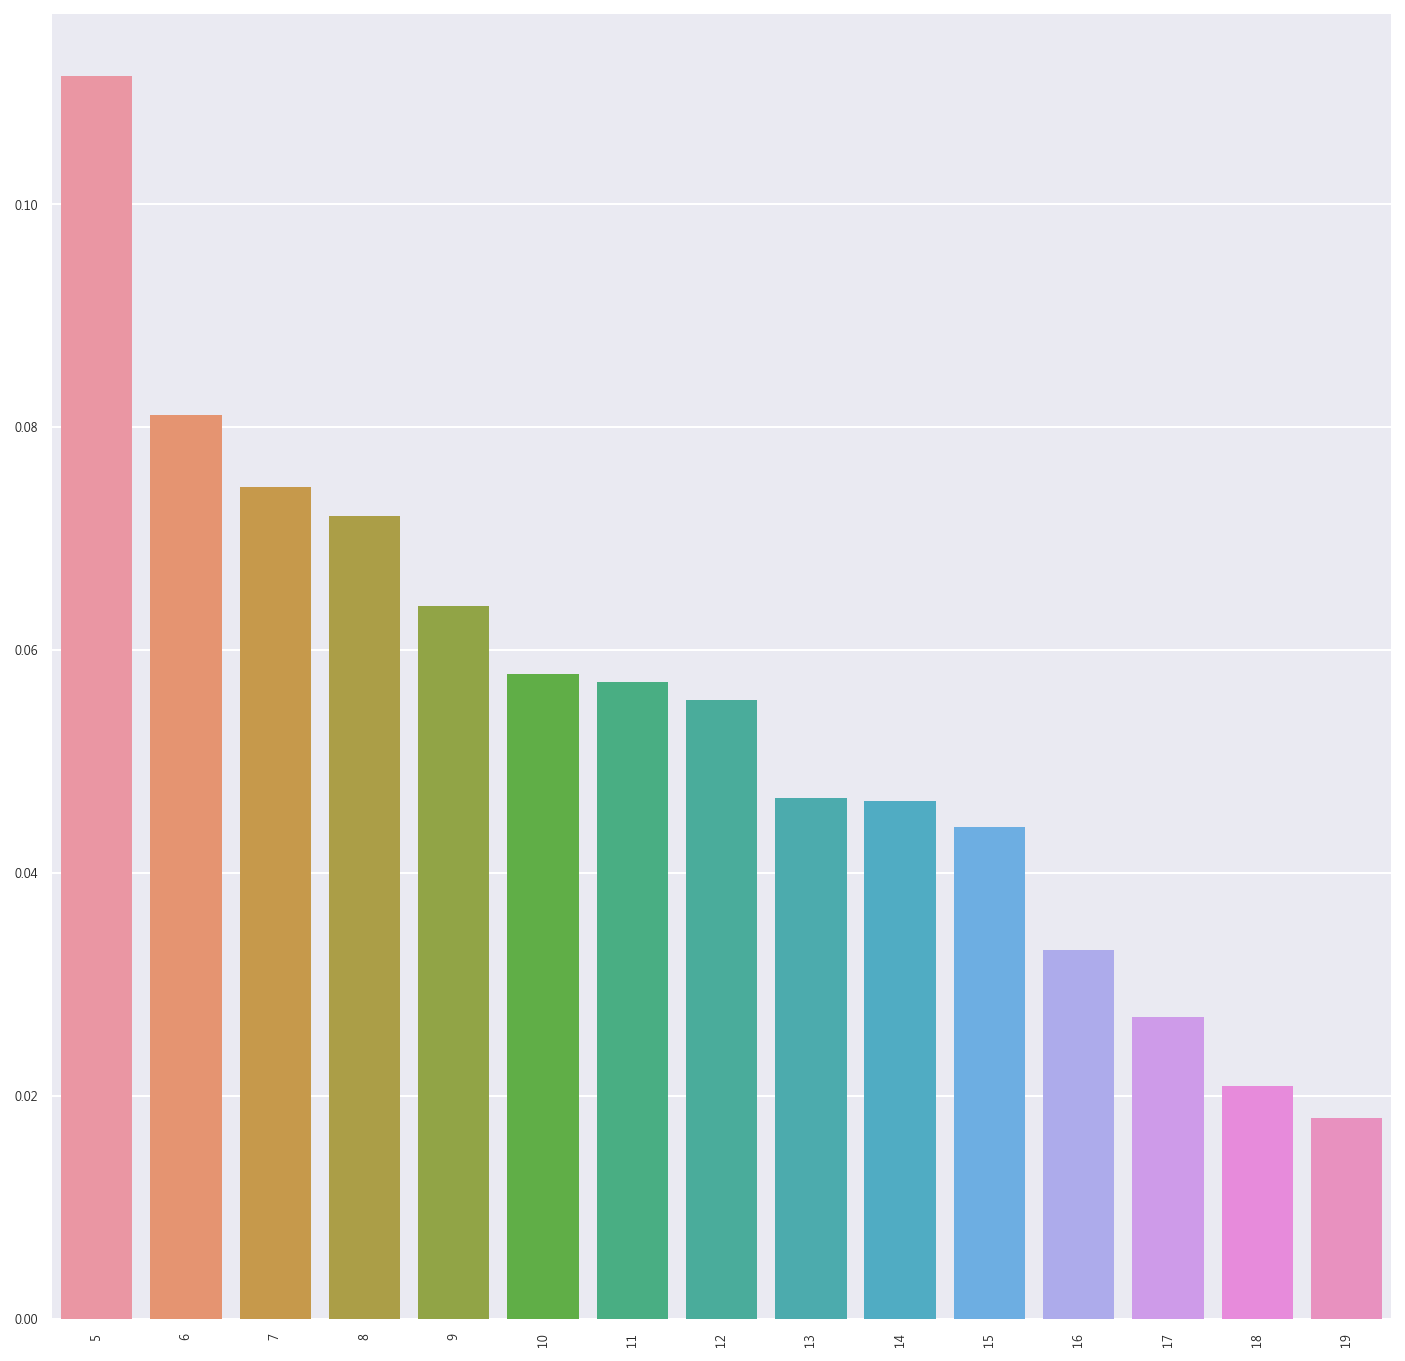

In [36]:
col_size = len(TrainX.columns) if TrainX.columns.size < 15 else 15
important_columns = [x for _,x in sorted(zip(clfdec.feature_importances_,TrainX.columns),reverse=True)]
barplot = sns.barplot(x=important_columns[:col_size], y=sorted(clfdec.feature_importances_,reverse=True)[:col_size],order=important_columns[:col_size])
barplot.set_xticklabels(plot.get_xticklabels(), rotation=90);

### <font color=DARKBLUE>使用決策樹進行預測</font>
#### 讀取clfdec.model，Test data 預測，如果Test data 有答案則順便產生預測報告

如果出現 IOerror "Permission denied" ，請關閉 'Test_Answer.csv' 檔案並重新執行

以下為測試資料的預測結果準確率

              precision    recall  f1-score   support

          0     0.9213    0.9535    0.9371        86
          1     0.8085    0.8000    0.8042        95
          2     0.6979    0.7791    0.7363        86
          3     0.8391    0.7849    0.8111        93
          4     0.8300    0.8137    0.8218       102
          5     0.9059    0.8556    0.8800        90
          6     0.9024    0.8810    0.8916        84
          7     0.8488    0.8588    0.8538        85
          8     0.7528    0.7204    0.7363        93
          9     0.7253    0.7765    0.7500        85

avg / total     0.8230    0.8209    0.8214       899



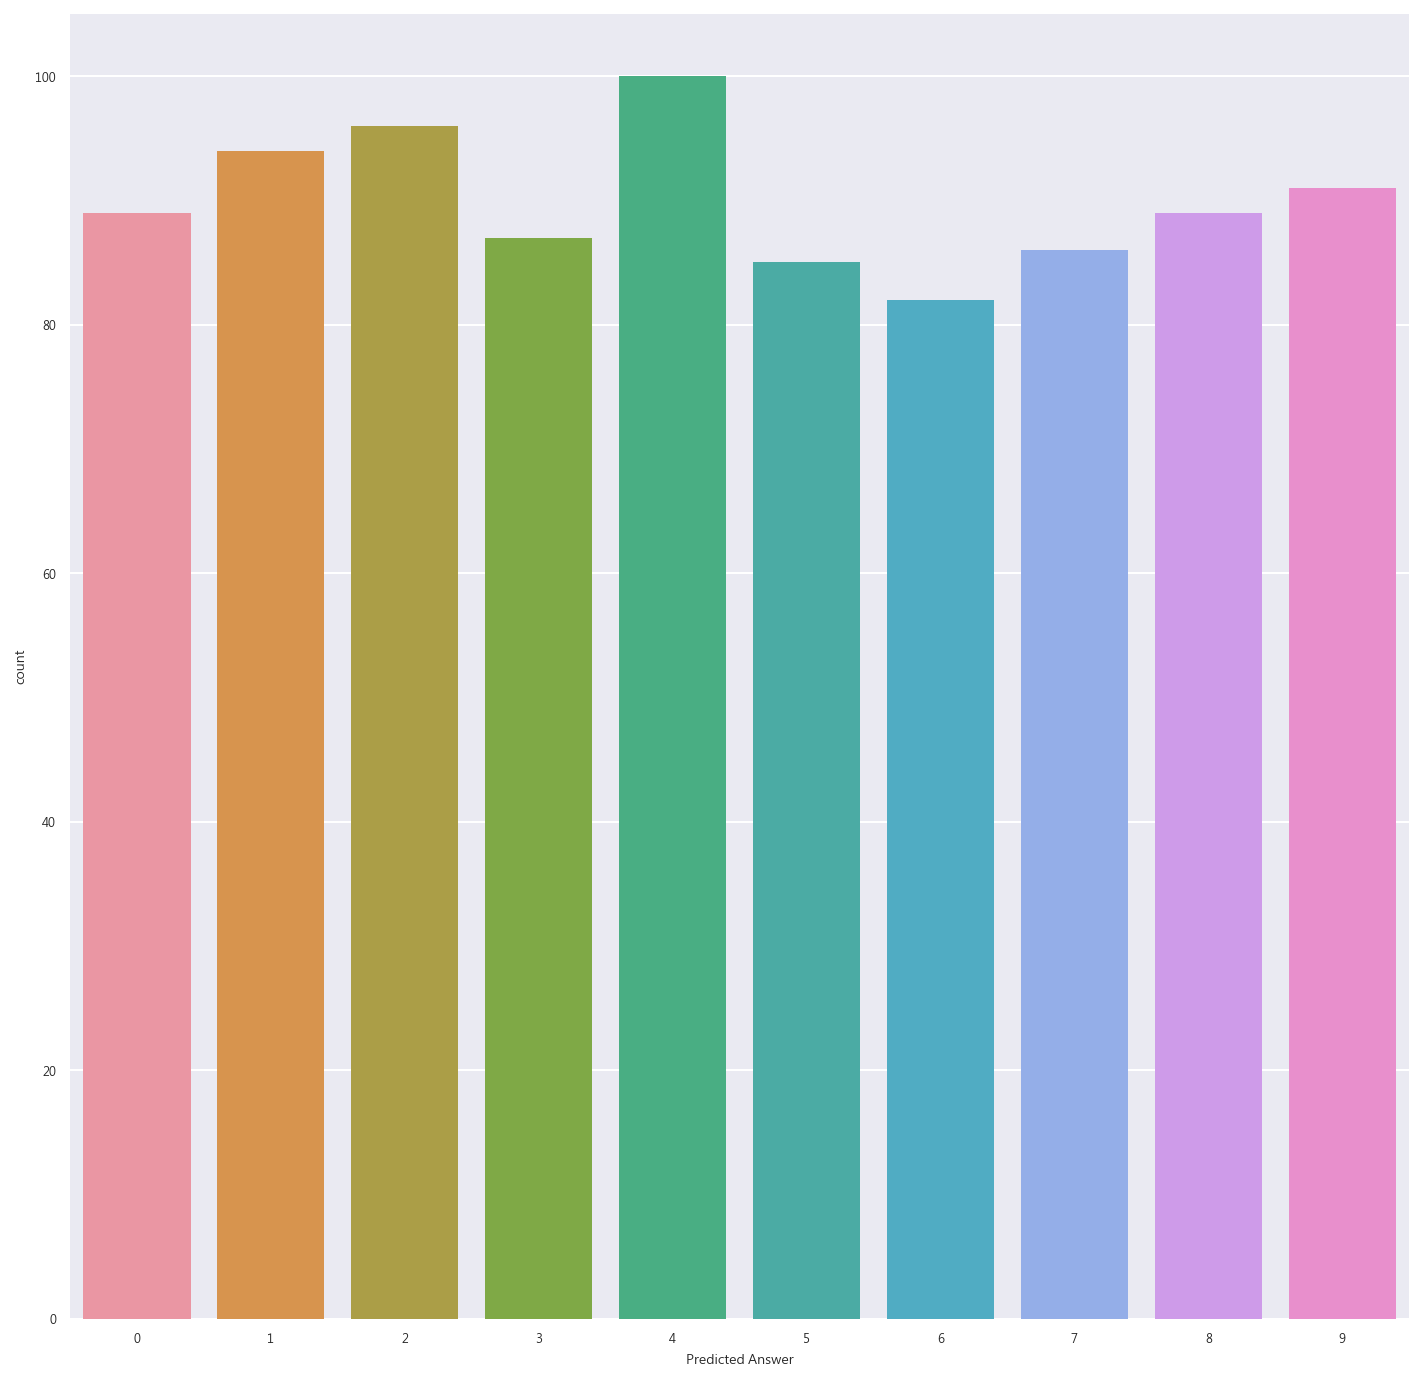

In [37]:
with open(r"Model/clfdec.model", "rb") as input_file:
    clfdec = pickle.load(input_file)

Answer_by_clfdec = clfdec.predict(TestX).astype('int')
Answer_proba_clfdec = clfdec.predict_proba(TestX)
ax = sns.countplot(x=Answer_by_clfdec)
'稍微看一下預測的分佈情形'
ax.set(xlabel='Predicted Answer', ylabel='count')

if not os.path.exists(OutputAnswerCSV):
    Test_Answer = pd.DataFrame()
else:
    Test_Answer = pd.read_csv(OutputAnswerCSV)

Test_Answer['DecisionTree'] = Answer_by_clfdec    
col_names = ['DecTree_p_' + str(s)  for s in clfdec.classes_] 

    
Test_Answer_prob = pd.DataFrame(Answer_proba_clfdec, columns=col_names)

for col in col_names:
    Test_Answer[col] = Test_Answer_prob[col]
    
if TestY is not 0:
    print('以下為測試資料的預測結果準確率')
    if 'Truth' not in Test_Answer.columns:
        Test_Answer['Truth'] = TestY.values
    report = classification_report(TestY, Answer_by_clfdec,digits=4)
    print(os.linesep,report)
    #print(roc_auc_score(Test_Answer['Truth'], Test_Answer['DecTree_p_1']))
    TestReport = pd.concat([TestReport,TestReport_Metrics(
        TestReport,'DecisionTree',Test_Answer['Truth'],Test_Answer['DecisionTree'],Test_Answer['DecTree_p_1'])]).drop_duplicates(subset=['Algorithm'])

    

# if col_names[0] in Test_Answer.columns:
#     for col in col_names:
#         Test_Answer[col] = Test_Answer_prob[col]
#     output = Test_Answer
# else:
#     output = pd.concat([Test_Answer,Test_Answer_prob], join="inner", axis=1) 
    
Test_Answer.to_csv(OutputAnswerCSV, index=False,header=True,encoding = 'utf8')




<table>
  <tr>
    <th><font size=4% face="Arial Black" color="GOLD">Shortcut :  </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[從零開始](#BEGIN) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[結果](#ToBecontinued) </font></th>
  </tr>

</table>
<a id="BEGIN"></a>

<table>
  <tr>
    <th align="center"><font size=3% face="Arial Black" color="GOLD">Shortcut :  </font></th><th></th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[DecisionTree](#DecisionTree) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[RandomForest](#RandomForest) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[GradientBoost](#GradientBoost) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[Ridge](#Ridge) </font></th><th></th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[SVM](#SVM) </font></th><th></th>

  </tr><tr>
    <th></th><th></th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[KNN](#K-NN) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[SGD](#SGD) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[NaiveBayes](#NaiveBayes) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[DeepLearning](#DeepLearning) </font></th><th> </th>
  </tr>

</table>
<a id="RandomForest"></a>

## <font color=DARKBLUE>使用隨機森林進行分類</font>


### 分別以 split 產生 report 以及 cross-validation 驗證演算法 

- wiki : [cross-validation 交叉驗證](https://zh.wikipedia.org/wiki/%E4%BA%A4%E5%8F%89%E9%A9%97%E8%AD%89)

本範例中以 **4-fold** 進行驗證，以 **75%** 的有答案資料 (Training Data)進行建模，以剩餘的 **25%** (valid)來計算正確率。

* train_test_split : 將資料進行切分去訓練模型
* classification_report : 依據訓練的模型，預測 valid 資料，並產生結果表格
* cross_val_score : 將資料進行切分去訓練模型，重複執行交叉驗證，並產生 Accuracy 平均 

**train_test_split** 的 **classification_report**是其中一次切割之後的驗證結果，可能會不足以說明模型穩定度

**cross_val_score**則是數次交叉驗證的平均，一般而言可用以預測整體模型準確率

<!--- ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
--->

<font color=OliveDrab size=5%>◎◎◎ ↓ </font> 建立隨機森林模型，並以 cross-validation 檢驗效能

In [38]:
from sklearn.ensemble import RandomForestClassifier
clfrfc = RandomForestClassifier(random_state=Random_State,n_jobs=n_jobs)

clfrfc.fit(X_train,y_train)

print('以下是 RandomForestClassifier 的分類與驗證 : ', )
report = classification_report(y_valid, clfrfc.predict(X_valid),digits=4)
print(os.linesep,report)


CrossValid = cross_val_score(clfrfc, TrainX, TrainY, cv=4, verbose=3,  scoring='f1_weighted')
Train_Valid_Acc.update({'RandomForest':CrossValid.mean()})
print(os.linesep,'以上為 CrossValidation 每次的準確度，平均準確為', CrossValid.mean().round(8) , '大約是 Baseline DummyClassifier 的' , (CrossValid.mean()/DumCrossValid).round(3),'倍')



以下是 RandomForestClassifier 的分類與驗證 : 

              precision    recall  f1-score   support

          0     1.0000    1.0000    1.0000        18
          1     0.9444    0.8500    0.8947        20
          2     1.0000    1.0000    1.0000        19
          3     0.8182    0.9474    0.8780        19
          4     0.9000    0.9474    0.9231        19
          5     0.9130    0.8750    0.8936        24
          6     0.9091    1.0000    0.9524        20
          7     0.9412    0.9412    0.9412        17
          8     0.8889    0.8889    0.8889        18
          9     0.8571    0.7500    0.8000        24

avg / total     0.9152    0.9141    0.9132       198

[CV]  ................................................................
[CV] ....................... , score=0.8743511010984217, total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ....................... , score=0.9090708165983563, total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] ....................... , score=0.9549332994775871, total=   0.2s
[CV]  ................................................................
[CV] ....................... , score=0.9202642388246104, total=   0.2s

 以上為 CrossValidation 每次的準確度，平均準確為 0.91465486 大約是 Baseline DummyClassifier 的 11.612 倍


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.9s finished


### <font color=DARKBLUE>建立隨機森林</font>



#### 調參數 <font color=RED>(耗時注意)</font> 

 <font color=YELLOW, size=3%>注意，本段程式碼為調參數迴圈，速度緩慢，如只是測試實驗不建議解除註解</font> 
 
目前已註解 # ，如要使用請移除下方程式碼區塊的註解符號#

In [39]:
# param_grid = {"n_estimators" : range(10,100,20),
#               "criterion": ["gini", "entropy"],
#               "max_features" : ["auto","sqrt","log2"],
#               "min_samples_split": range(2,20,6),
#               "max_depth": [None] + list(range(2,20,6)),
#               "min_samples_leaf": range(1,15,6),
#               "max_leaf_nodes": [None] + list(range(5,15,5)),
#               }
# clfrfc_Grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, scoring='accuracy',verbose=1,n_jobs=n_jobs)
# clfrfc_Grid.fit(TrainX,TrainY)
# clfrfc = clfrfc_Grid.best_estimator_
# clfrfc_Grid.best_params_

<!---
{'criterion': 'entropy',
 'max_depth': 14,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 90}
--->

<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  使用整個資料建立隨機森林，並將其儲存為 clfrfc.model (格式為 pickle檔案)

In [40]:
clfrfc.fit(TrainX, TrainY)

TrainPredict['RandomForest'] = clfrfc.predict(TrainX)
report = classification_report(TrainY, TrainPredict['RandomForest'],digits=4)
print(os.linesep,report)


prob = clfrfc.predict_proba(TrainX)
for i,s in enumerate(clfrfc.classes_):
    TrainPredict['RandomF_p_' + str(s)] = prob[:,i]

with open(r"Model/clfrfc.model", "wb") as output_file:
    pickle.dump(clfrfc, output_file)




              precision    recall  f1-score   support

          0     1.0000    1.0000    1.0000        79
          1     0.9875    1.0000    0.9937        79
          2     1.0000    1.0000    1.0000        79
          3     1.0000    1.0000    1.0000        79
          4     1.0000    1.0000    1.0000        79
          5     1.0000    1.0000    1.0000        79
          6     1.0000    1.0000    1.0000        79
          7     1.0000    1.0000    1.0000        79
          8     1.0000    0.9873    0.9936        79
          9     1.0000    1.0000    1.0000        79

avg / total     0.9988    0.9987    0.9987       790



### 模型分析

同時畫出各特徵的重要程度 **不是每一個演算法都能呈現特徵重要度**

<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  畫出前15重要的 feature 的重要程度

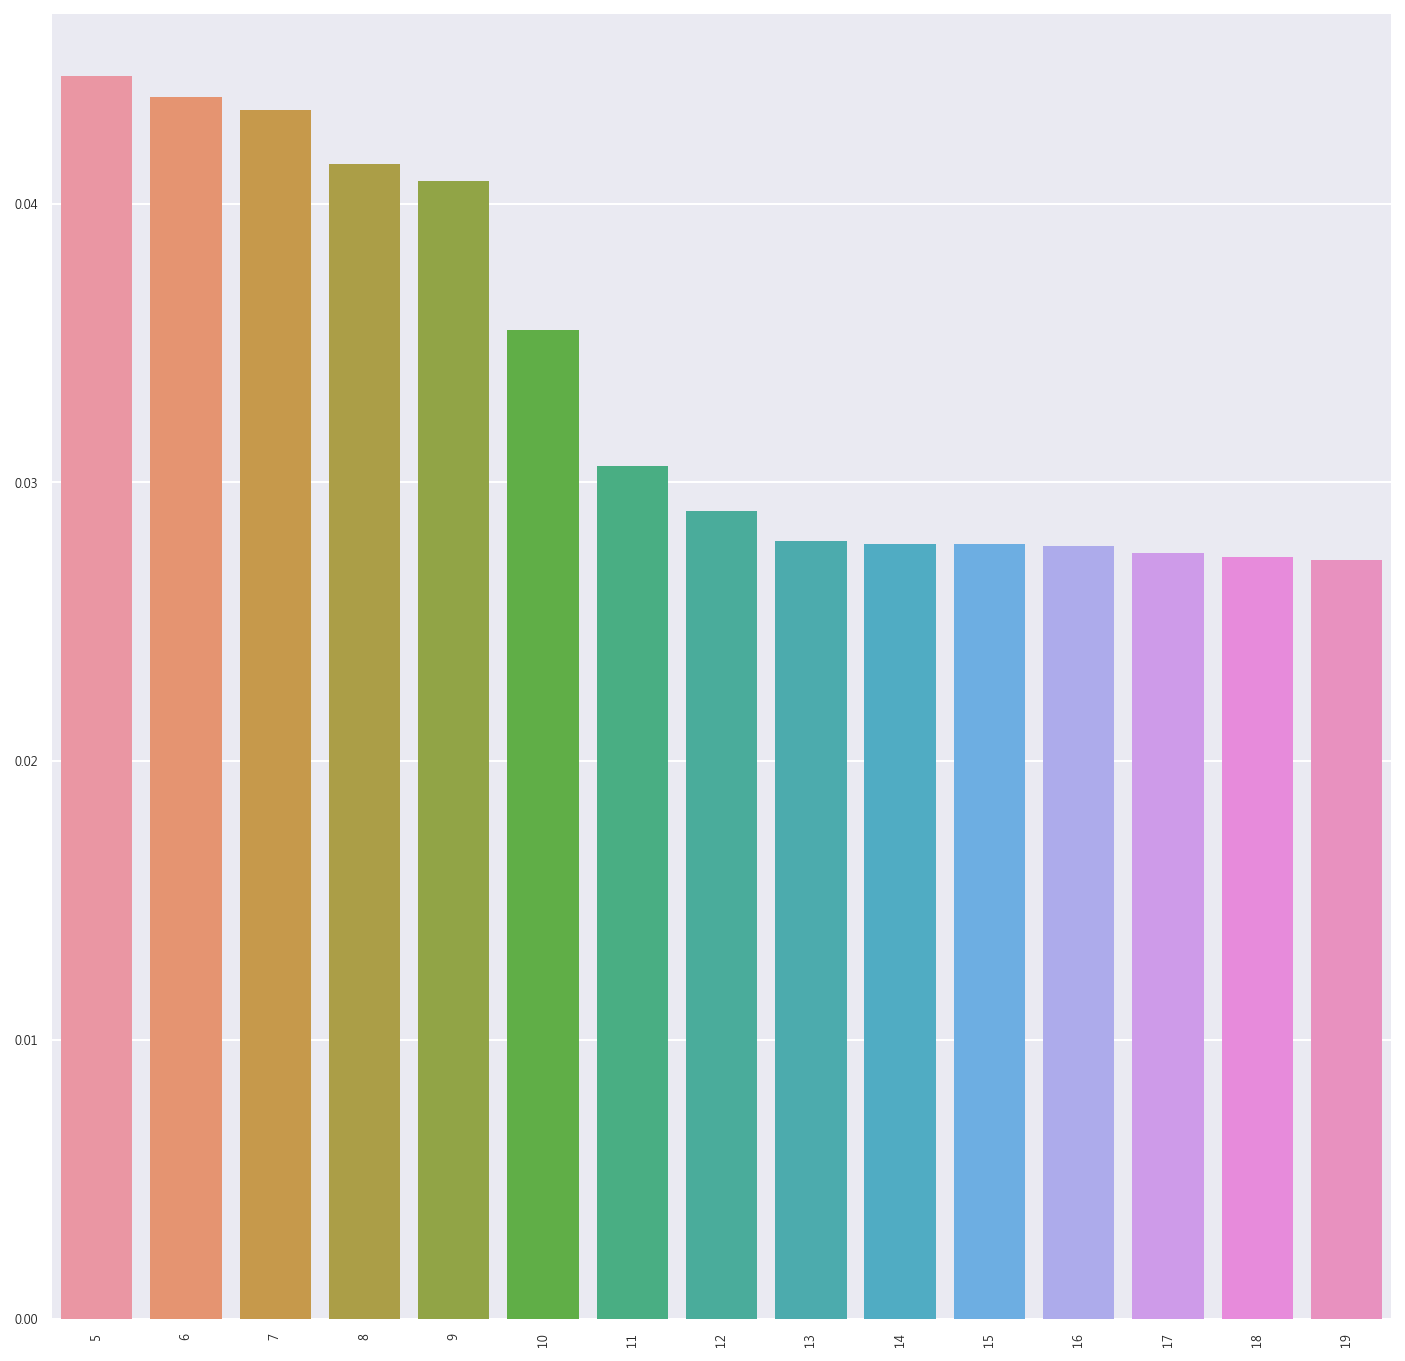

In [41]:
col_size = TrainX.columns if TrainX.columns.size < 15 else 15
important_columns = [x for _,x in sorted(zip(clfrfc.feature_importances_,TrainX.columns),reverse=True)]
barplot = sns.barplot(x=important_columns[:col_size], y=sorted(clfrfc.feature_importances_,reverse=True)[:col_size],order=important_columns[:col_size])
barplot.set_xticklabels(plot.get_xticklabels(), rotation=90);

### <font color=DARKBLUE>使用隨機森林進行預測</font>
#### 讀取clfrfc.model，對Test data 預測，如果Test data 有答案則順便產生預測報告

如果出現 IOerror "Permission denied" ，請關閉 'Test_Answer.csv' 檔案並重新執行

以下為測試資料的預測結果準確率

              precision    recall  f1-score   support

          0     0.9773    1.0000    0.9885        86
          1     0.8103    0.9895    0.8910        95
          2     0.9625    0.8953    0.9277        86
          3     0.9412    0.8602    0.8989        93
          4     0.9515    0.9608    0.9561       102
          5     0.8646    0.9222    0.8925        90
          6     0.9398    0.9286    0.9341        84
          7     0.9000    0.9529    0.9257        85
          8     0.8780    0.7742    0.8229        93
          9     0.8553    0.7647    0.8075        85

avg / total     0.9077    0.9055    0.9046       899



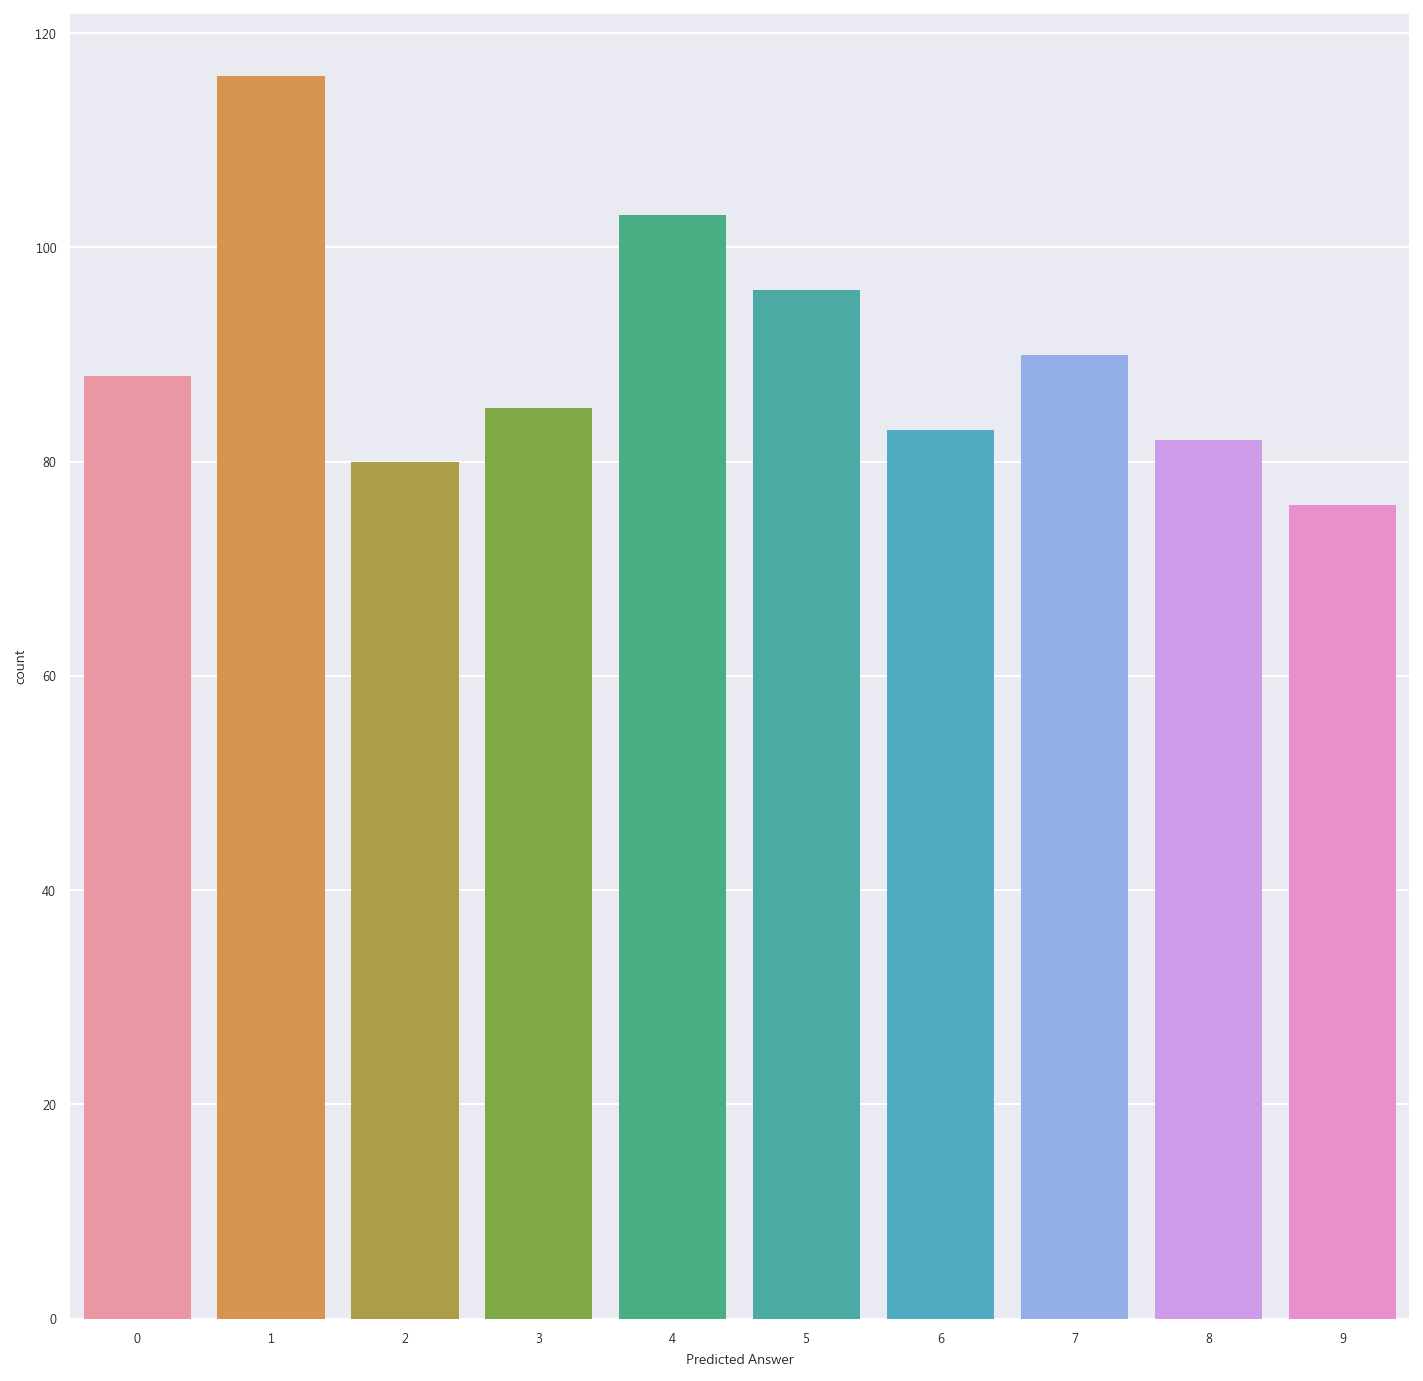

In [42]:
with open(r"Model/clfrfc.model", "rb") as input_file:
    clfrfc = pickle.load(input_file)

Answer_by_clfrfc = clfrfc.predict(TestX).astype('int')
Answer_proba_clfrfc = clfrfc.predict_proba(TestX)
ax = sns.countplot(x=Answer_by_clfrfc)
'稍微看一下預測的分佈情形'
ax.set(xlabel='Predicted Answer', ylabel='count')

if not os.path.exists(OutputAnswerCSV):
    Test_Answer = pd.DataFrame()
else:
    Test_Answer = pd.read_csv(OutputAnswerCSV)

col_names = ['RandomF_p_' + str(s)  for s in clfrfc.classes_] 
Test_Answer['RandomForest'] = Answer_by_clfrfc
    
Test_Answer_prob = pd.DataFrame(Answer_proba_clfrfc,columns=col_names)
for col in col_names:
    Test_Answer[col] = Test_Answer_prob[col]

if TestY is not 0:
    print('以下為測試資料的預測結果準確率')
    if 'Truth' not in Test_Answer.columns:
        Test_Answer['Truth'] = TestY.values
    report = classification_report(TestY, Answer_by_clfrfc, digits=4)
    print(os.linesep,report)
    TestReport = pd.concat([TestReport,TestReport_Metrics(
    TestReport,'RandomForest',Test_Answer['Truth'],Test_Answer['RandomForest'],Test_Answer['RandomF_p_1'])]).drop_duplicates(subset=['Algorithm'])
    #print(TestReport)
    

    
Test_Answer.to_csv(OutputAnswerCSV, index=False,header=True,encoding = 'utf8')





<table>
  <tr>
    <th><font size=4% face="Arial Black" color="GOLD">Shortcut :  </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[從零開始](#BEGIN) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[結果](#ToBecontinued) </font></th>
  </tr>

</table>
<a id="BEGIN"></a>

<table>
  <tr>
    <th align="center"><font size=3% face="Arial Black" color="GOLD">Shortcut :  </font></th><th></th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[DecisionTree](#DecisionTree) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[RandomForest](#RandomForest) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[GradientBoost](#GradientBoost) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[Ridge](#Ridge) </font></th><th></th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[SVM](#SVM) </font></th><th></th>

  </tr><tr>
    <th></th><th></th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[KNN](#K-NN) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[SGD](#SGD) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[NaiveBayes](#NaiveBayes) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[DeepLearning](#DeepLearning) </font></th><th> </th>
  </tr>

</table>
<a id="GradientBoost"></a>

## <font color=DARKBLUE>使用 Gradient Boosting 進行分類</font>


### 分別以 split 產生 report 以及 cross-validation 驗證演算法 

- wiki : [cross-validation 交叉驗證](https://zh.wikipedia.org/wiki/%E4%BA%A4%E5%8F%89%E9%A9%97%E8%AD%89)

本範例中以 **4-fold** 進行驗證，以 **75%** 的有答案資料 (Training Data)進行建模，以剩餘的 **25%** (valid)來計算正確率。

* train_test_split : 將資料進行切分去訓練模型
* classification_report : 依據訓練的模型，預測 valid 資料，並產生結果表格
* cross_val_score : 將資料進行切分去訓練模型，重複執行交叉驗證，並產生 Accuracy 平均 

**train_test_split** 的 **classification_report**是其中一次切割之後的驗證結果，可能會不足以說明模型穩定度

**cross_val_score**則是數次交叉驗證的平均，一般而言可用以預測整體模型準確率

<!--- ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
--->

<font color=OliveDrab size=5%>◎◎◎ ↓ </font> 建立 Gradient Boosting 模型，並以 cross-validation 檢驗效能

In [43]:
import xgboost as xgb
clfxgb = xgb.XGBClassifier(nthread=n_jobs)

clfxgb.fit(X_train,y_train)

print('以下是 XGBClassifier 的分類與驗證 : ', )
report = classification_report(y_valid, clfxgb.predict(X_valid), digits=4)
print(os.linesep,report)


CrossValid = cross_val_score(clfxgb, TrainX, TrainY, cv=4, verbose=3,  scoring='f1_weighted')
Train_Valid_Acc.update({'XGboost':CrossValid.mean()})
print(os.linesep,'以上為 CrossValidation 每次的準確度，平均準確為', CrossValid.mean().round(10) , '大約是 Baseline DummyClassifier 的' , (CrossValid.mean()/DumCrossValid).round(3),'倍')



以下是 XGBClassifier 的分類與驗證 : 

              precision    recall  f1-score   support

          0     1.0000    1.0000    1.0000        18
          1     0.9524    1.0000    0.9756        20
          2     1.0000    0.9474    0.9730        19
          3     0.9412    0.8421    0.8889        19
          4     1.0000    0.8947    0.9444        19
          5     0.9200    0.9583    0.9388        24
          6     1.0000    0.9500    0.9744        20
          7     0.9412    0.9412    0.9412        17
          8     0.8889    0.8889    0.8889        18
          9     0.8571    1.0000    0.9231        24

avg / total     0.9474    0.9444    0.9445       198

[CV]  ................................................................


/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV] ....................... , score=0.9244208122555437, total=   2.2s
[CV]  ................................................................


/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


[CV] ....................... , score=0.9447742244918111, total=   1.6s
[CV]  ................................................................


/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



[CV] ....................... , score=0.9604694898597337, total=   1.3s
[CV]  ................................................................
[CV] ....................... , score=0.9319665469472915, total=   1.3s

 以上為 CrossValidation 每次的準確度，平均準確為 0.9404077684 大約是 Baseline DummyClassifier 的 11.939 倍


/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.3s finished


### <font color=DARKBLUE>建立 Gradient Boosting </font>



#### 調參數 <font color=RED>(耗時注意)</font> 

 <font color=YELLOW, size=3%>注意，本段程式碼為調參數迴圈，速度緩慢，如只是測試實驗不建議解除註解</font> 
 
目前已註解 # ，如要使用請移除下方程式碼區塊的註解符號#

In [44]:
# param_grid = {"max_depth" : range(2,8,1),
#               "learning_rate": np.logspace(-3.5, 0, 8),
#               "n_estimators" :  np.arange(120,1500,80),
#               "subsample": np.arange(0.4,1.1,0.2),
#               "reg_alpha": np.arange(0.01,0.3,0.05),
#               }
# clfxgb_Grid = GridSearchCV(xgb.XGBClassifier(seed =Random_State ), param_grid=param_grid, scoring='accuracy',verbose=1,n_jobs=n_jobs)
# clfxgb_Grid.fit(TrainX.values[:8000],TrainY[:8000])
# clfxgb = clfxgb_Grid.best_estimator_
# clfxgb_Grid.best_params_


# {'learning_rate': 0.001,
#  'max_depth': 5,
#  'n_estimators': 920,
#  'reg_alpha': 0.16000000000000003,
#  'subsample': 0.7}

<!---
{'algorithm': 'ball_tree', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
--->
<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  使用整個資料建立 Gradient Boosting，並將其儲存為 clfxgb.model (格式為 pickle檔案)

In [45]:
# clfxgb.set_params(**{'learning_rate': 0.001,
#  'max_depth': 5,
#  'n_estimators': 1000,
#  'reg_alpha': 0.2,
#  'subsample': 0.8})

clfxgb.fit(TrainX, TrainY)

TrainPredict['XGB'] = clfxgb.predict(TrainX)
report = classification_report(TrainY, TrainPredict['XGB'],digits=4)
print(os.linesep,report)

prob = clfxgb.predict_proba(TrainX)
for i,s in enumerate(clfxgb.classes_):
    TrainPredict['XGB_p_' + str(s)] = prob[:,i]

with open(r"Model/clfxgb.model", "wb") as output_file:
    pickle.dump(clfxgb, output_file)




              precision    recall  f1-score   support

          0     1.0000    1.0000    1.0000        79
          1     1.0000    1.0000    1.0000        79
          2     1.0000    1.0000    1.0000        79
          3     1.0000    1.0000    1.0000        79
          4     1.0000    1.0000    1.0000        79
          5     1.0000    1.0000    1.0000        79
          6     1.0000    1.0000    1.0000        79
          7     1.0000    1.0000    1.0000        79
          8     1.0000    1.0000    1.0000        79
          9     1.0000    1.0000    1.0000        79

avg / total     1.0000    1.0000    1.0000       790



/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



### 模型分析

同時畫出各特徵的重要程度 **不是每一個演算法都能呈現特徵重要度**

<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  畫出前15重要的 feature 的重要程度

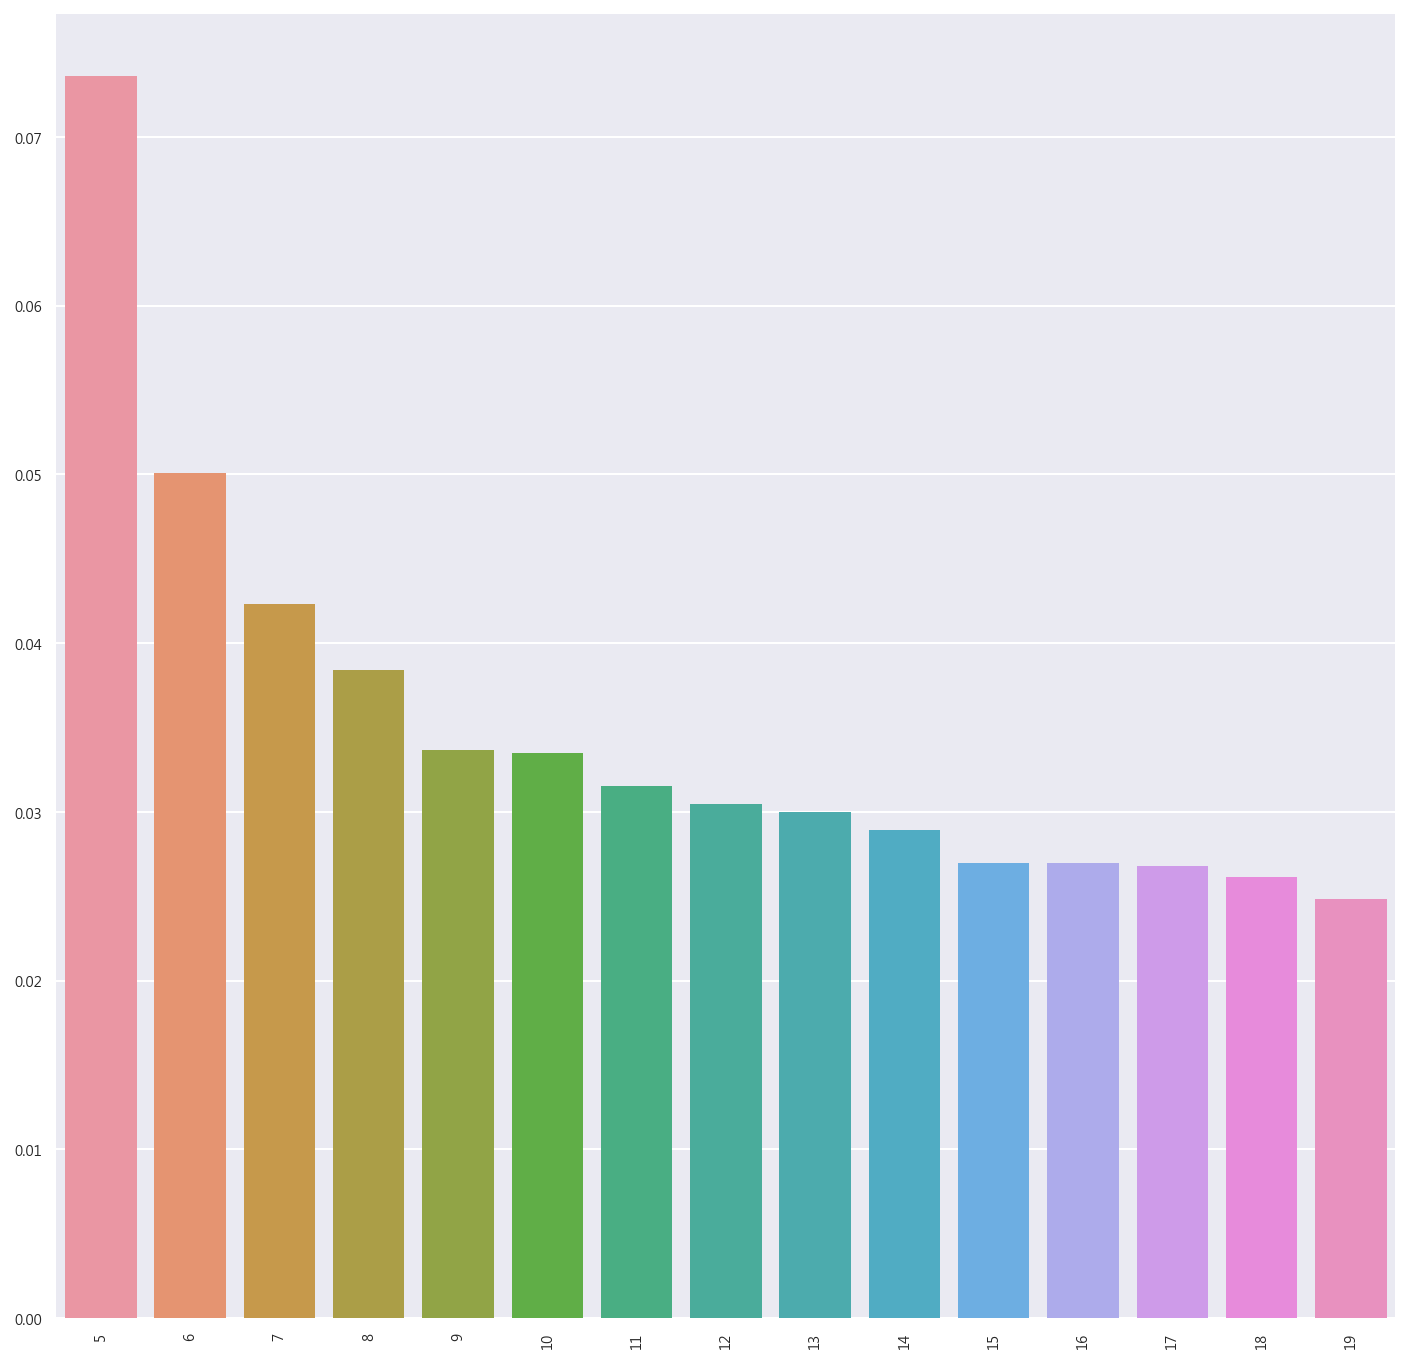

In [46]:
col_size = len(TrainX.columns) if TrainX.columns.size < 15 else 15
important_columns = [x for _,x in sorted(zip(clfxgb.feature_importances_,TrainX.columns),reverse=True)]
sns.set(font_scale=0.7,font="Microsoft JhengHei")
barplot = sns.barplot(x=important_columns[:col_size], y=sorted(clfxgb.feature_importances_,reverse=True)[:col_size],order=important_columns[:col_size])
barplot.set_xticklabels(plot.get_xticklabels(), rotation=90);

### <font color=DARKBLUE>使用 Gradient Boosting 進行預測</font>
#### 讀取clfxgb.model，對Test data 預測，如果Test data 有答案則順便產生預測報告
如果出現 IOerror "Permission denied" ，請關閉 'Test_Answer.csv' 檔案並重新執行

/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



以下為測試資料的預測結果準確率

              precision    recall  f1-score   support

          0     0.9765    0.9651    0.9708        86
          1     0.8673    0.8947    0.8808        95
          2     0.9524    0.9302    0.9412        86
          3     0.9651    0.8925    0.9274        93
          4     0.9895    0.9216    0.9543       102
          5     0.9333    0.9333    0.9333        90
          6     0.9756    0.9524    0.9639        84
          7     0.9231    0.9882    0.9545        85
          8     0.8542    0.8817    0.8677        93
          9     0.8587    0.9294    0.8927        85

avg / total     0.9297    0.9277    0.9281       899



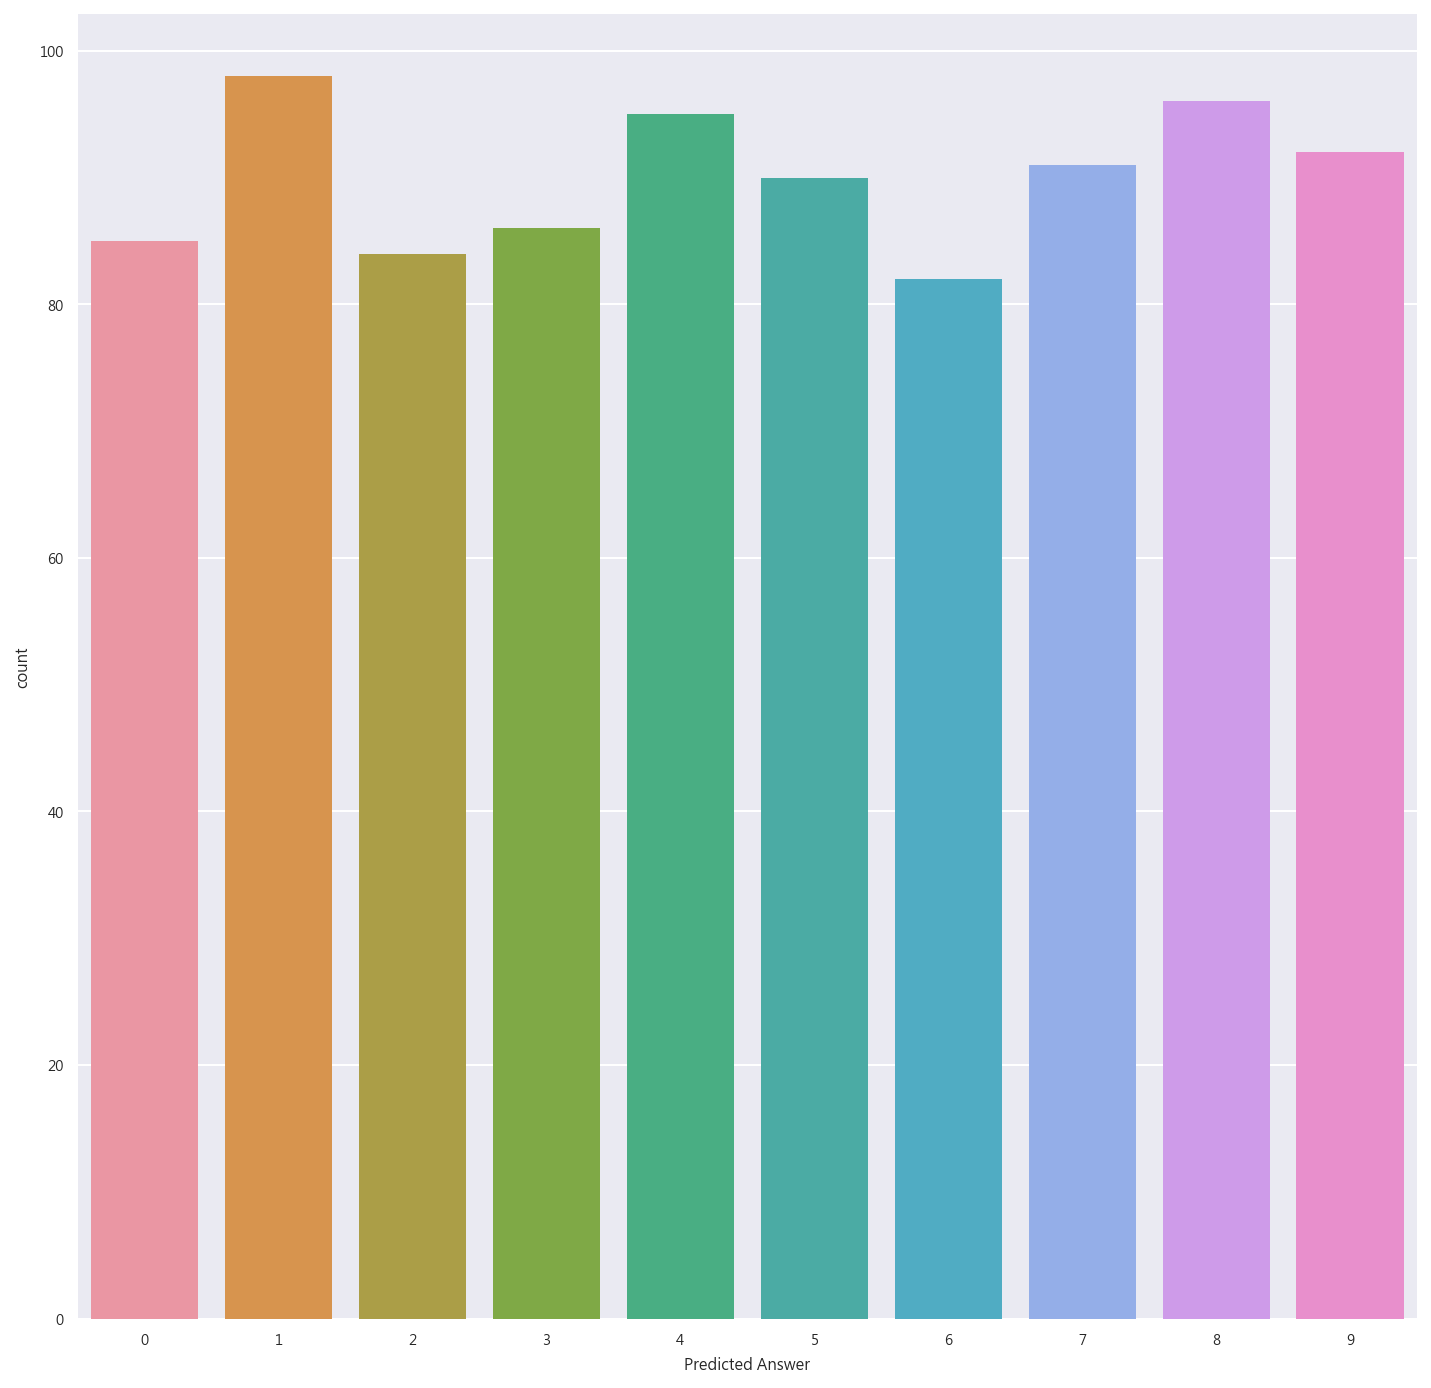

In [47]:
with open(r"Model/clfxgb.model", "rb") as input_file:
    clfxgb = pickle.load(input_file)
#TestX.columns=list(TrainX.columns.values)
Answer_by_clfxgb = clfxgb.predict(TestX).astype('int')
Answer_proba_clfxgb = clfxgb.predict_proba(TestX)
ax = sns.countplot(x=Answer_by_clfxgb)
'稍微看一下預測的分佈情形'
ax.set(xlabel='Predicted Answer', ylabel='count')

if not os.path.exists(OutputAnswerCSV):
    Test_Answer = pd.DataFrame()
else:
    Test_Answer = pd.read_csv(OutputAnswerCSV)
    
col_names = ['XGB_p_' + str(s)  for s in clfxgb.classes_] 
Test_Answer['XGB'] = Answer_by_clfxgb
    
Test_Answer_prob = pd.DataFrame(Answer_proba_clfxgb,columns=col_names)
for col in col_names:
    Test_Answer[col] = Test_Answer_prob[col]
if TestY is not 0:
    print('以下為測試資料的預測結果準確率')
    if 'Truth' not in Test_Answer.columns:
        Test_Answer['Truth'] = TestY.values
    report = classification_report(TestY, Answer_by_clfxgb,digits=4)
    print(os.linesep,report)
    TestReport = pd.concat([TestReport,TestReport_Metrics(
    TestReport,'Gradient Boosting',Test_Answer['Truth'],Test_Answer['XGB'],Test_Answer['XGB_p_1'])]).drop_duplicates(subset=['Algorithm'])
    #print(TestReport)
    


    
Test_Answer.to_csv(OutputAnswerCSV, index=False,header=True,encoding = 'utf8')





<table>
  <tr>
    <th><font size=4% face="Arial Black" color="GOLD">Shortcut :  </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[從零開始](#BEGIN) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[結果](#ToBecontinued) </font></th>
  </tr>

</table>
<a id="BEGIN"></a>

<table>
  <tr>
    <th align="center"><font size=3% face="Arial Black" color="GOLD">Shortcut :  </font></th><th></th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[DecisionTree](#DecisionTree) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[RandomForest](#RandomForest) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[GradientBoost](#GradientBoost) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[Ridge](#Ridge) </font></th><th></th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[SVM](#SVM) </font></th><th></th>

  </tr><tr>
    <th></th><th></th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[KNN](#K-NN) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[SGD](#SGD) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[NaiveBayes](#NaiveBayes) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[DeepLearning](#DeepLearning) </font></th><th> </th>
  </tr>

</table>
<a id="Ridge"></a>

## <font color=DARKBLUE>使用 Ridge classifier 進行分類</font>


### 分別以 split 產生 report 以及 cross-validation 驗證演算法 

- wiki : [cross-validation 交叉驗證](https://zh.wikipedia.org/wiki/%E4%BA%A4%E5%8F%89%E9%A9%97%E8%AD%89)

本範例中以 **4-fold** 進行驗證，以 **75%** 的有答案資料 (Training Data)進行建模，以剩餘的 **25%** (valid)來計算正確率。

* train_test_split : 將資料進行切分去訓練模型
* classification_report : 依據訓練的模型，預測 valid 資料，並產生結果表格
* cross_val_score : 將資料進行切分去訓練模型，重複執行交叉驗證，並產生 Accuracy 平均 

**train_test_split** 的 **classification_report**是其中一次切割之後的驗證結果，可能會不足以說明模型穩定度

**cross_val_score**則是數次交叉驗證的平均，一般而言可用以預測整體模型準確率

<!--- ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
--->

<font color=OliveDrab size=5%>◎◎◎ ↓ </font> 建立 Ridge classifier 模型，並以 cross-validation 檢驗效能

In [48]:
#from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier,RidgeClassifierCV
clfrig = RidgeClassifierCV()#



clfrig.fit(X_train_sc,y_train)

print('以下是 Quadratic Discriminant Analysis 的分類與驗證 : ', )
report = classification_report(y_valid, clfrig.predict(X_valid_sc),digits=4)
print(os.linesep,report)


CrossValid = cross_val_score(clfrig, TrainX_Scaler, TrainY, cv=4, verbose=3,  scoring='f1_weighted')
Train_Valid_Acc.update({'Ridge':CrossValid.mean()})
print(os.linesep,'以上為 CrossValidation 每次的準確度，平均準確為', CrossValid.mean().round(10) , '大約是 Baseline DummyClassifier 的' , (CrossValid.mean()/DumCrossValid).round(3),'倍')



以下是 Quadratic Discriminant Analysis 的分類與驗證 : 

              precision    recall  f1-score   support

          0     0.9474    1.0000    0.9730        18
          1     0.9474    0.9000    0.9231        20
          2     0.9500    1.0000    0.9744        19
          3     0.8947    0.8947    0.8947        19
          4     1.0000    0.9474    0.9730        19
          5     0.9565    0.9167    0.9362        24
          6     0.9500    0.9500    0.9500        20
          7     1.0000    0.9412    0.9697        17
          8     0.8421    0.8889    0.8649        18
          9     0.7600    0.7917    0.7755        24

avg / total     0.9212    0.9192    0.9197       198

[CV]  ................................................................
[CV] ....................... , score=0.8937467758754155, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.9648364109147164, total=   0.1s
[CV]  .......................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ....................... , score=0.9342126346156557, total=   0.3s
[CV]  ................................................................
[CV] ........................ , score=0.925895377737483, total=   0.2s

 以上為 CrossValidation 每次的準確度，平均準確為 0.9296727998 大約是 Baseline DummyClassifier 的 11.803 倍


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s finished


### <font color=DARKBLUE>建立 Ridge classifier  </font>



<!---
{'algorithm': 'ball_tree', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
--->
<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  使用整個資料建立 Ridge classifier ，並將其儲存為 clfrig.model (格式為 pickle檔案)

In [49]:
clfrig.fit(TrainX_Scaler, TrainY)
TrainPredict['RIG'] = clfrig.predict(TrainX_Scaler)
report = classification_report(TrainY, TrainPredict['RIG'],digits=4)
print(os.linesep,report)


prob = clfrig.decision_function(TrainX_Scaler) #decision_function
for i,s in enumerate(clfrig.classes_):
    if len(clfrig.classes_) > 2:
        TrainPredict['RIG_dec_' + str(s)] = prob[:,i]
    else:
        TrainPredict['RIG_dec_' + str(s)] = prob

with open(r"Model/clfrig.model", "wb") as output_file:
    pickle.dump(clfrig, output_file)




              precision    recall  f1-score   support

          0     0.9753    1.0000    0.9875        79
          1     0.9250    0.9367    0.9308        79
          2     0.9753    1.0000    0.9875        79
          3     0.9615    0.9494    0.9554        79
          4     0.9740    0.9494    0.9615        79
          5     0.9157    0.9620    0.9383        79
          6     0.9620    0.9620    0.9620        79
          7     0.9744    0.9620    0.9682        79
          8     0.9333    0.8861    0.9091        79
          9     0.8846    0.8734    0.8790        79

avg / total     0.9481    0.9481    0.9479       790



### <font color=DARKBLUE>使用 Ridge classifier  進行預測</font>
#### 讀取clfrig.model，對Test data 預測，如果Test data 有答案則順便產生預測報告
如果出現 IOerror "Permission denied" ，請關閉 'Test_Answer.csv' 檔案並重新執行

以下為測試資料的預測結果準確率

              precision    recall  f1-score   support

          0     0.9773    1.0000    0.9885        86
          1     0.8557    0.8737    0.8646        95
          2     0.9545    0.9767    0.9655        86
          3     0.9762    0.8817    0.9266        93
          4     1.0000    0.9510    0.9749       102
          5     0.9239    0.9444    0.9341        90
          6     0.9419    0.9643    0.9529        84
          7     0.8673    1.0000    0.9290        85
          8     0.8161    0.7634    0.7889        93
          9     0.8415    0.8118    0.8263        85

avg / total     0.9162    0.9155    0.9149       899



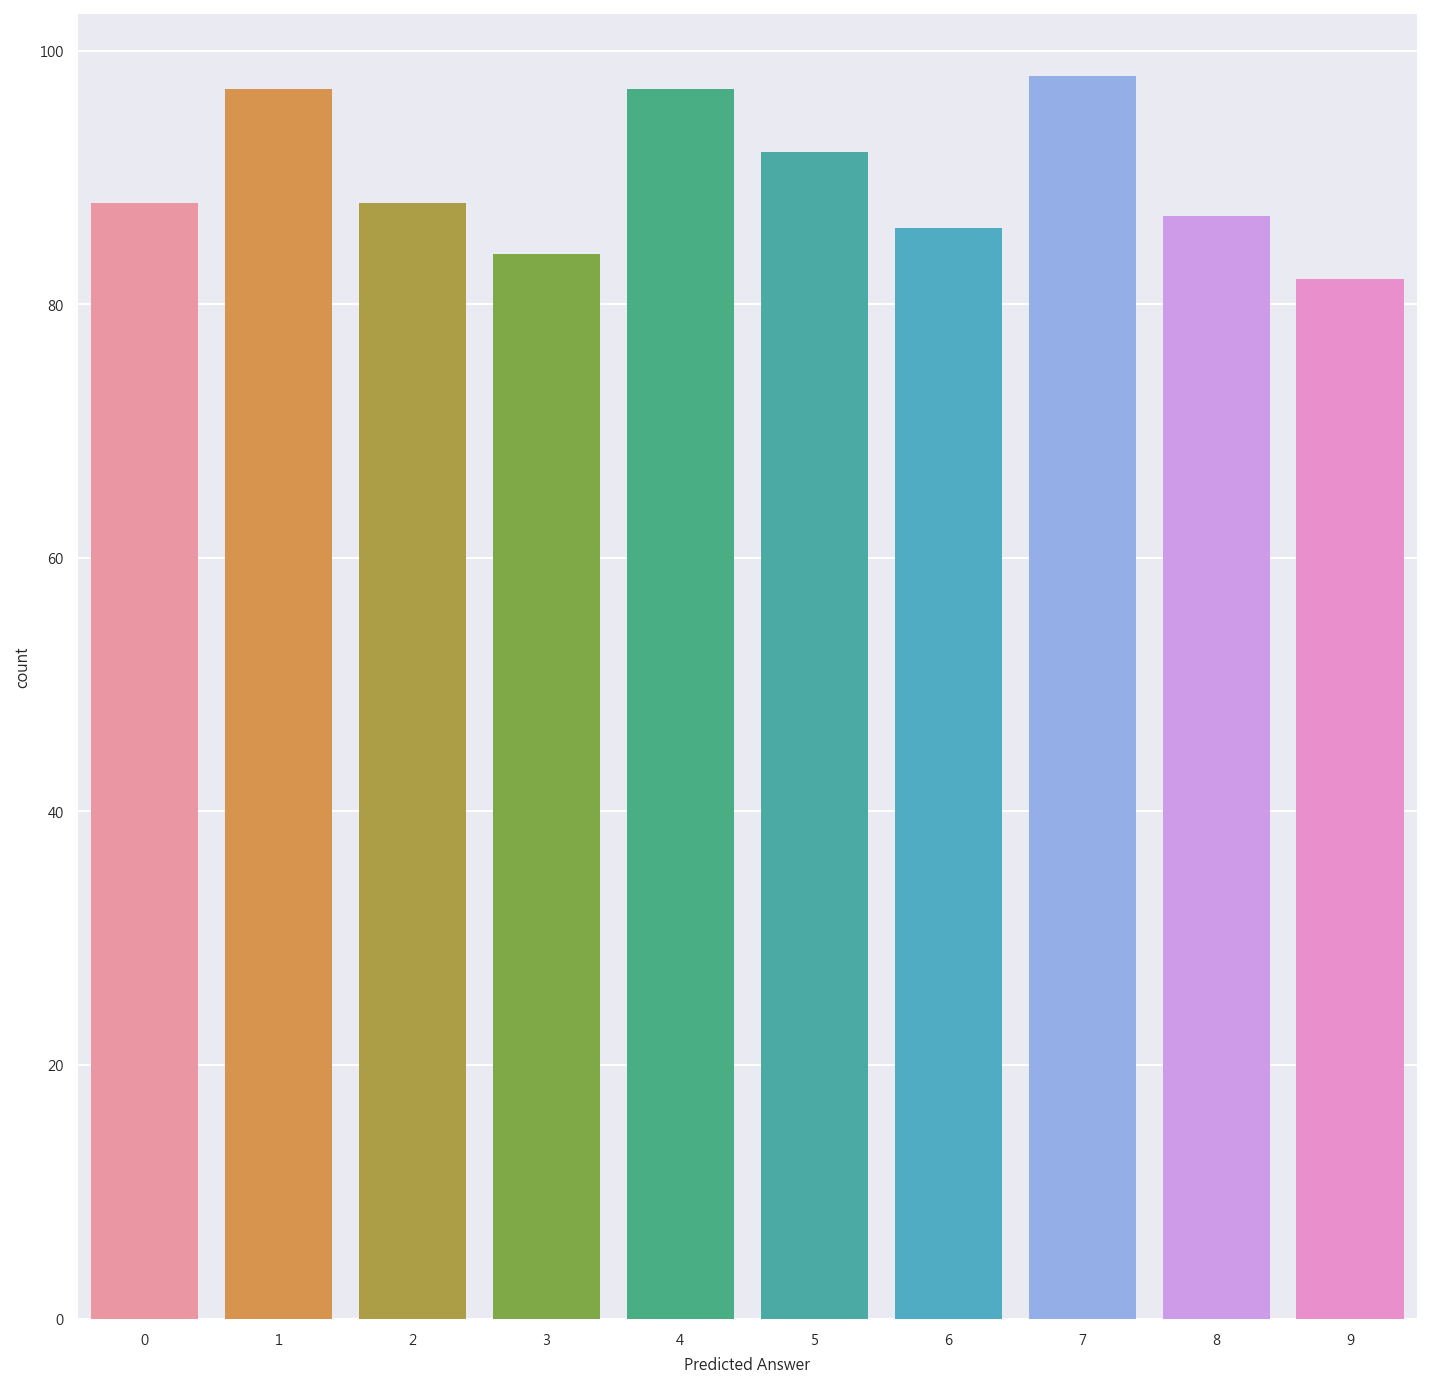

In [50]:
with open(r"Model/clfrig.model", "rb") as input_file:
    clfrig = pickle.load(input_file)

Answer_by_clfrig = clfrig.predict(TestX_Scaler)
Answer_dec_clfrig = clfrig.decision_function(TestX_Scaler)
ax = sns.countplot(x=Answer_by_clfrig)
'稍微看一下預測的分佈情形'
ax.set(xlabel='Predicted Answer', ylabel='count')

if not os.path.exists(OutputAnswerCSV):
    Test_Answer = pd.DataFrame()
else:
    Test_Answer = pd.read_csv(OutputAnswerCSV)
col_names = ['RIG_dec_' + str(s)  for s in clfrig.classes_] if len(clfrig.classes_) >2 else ['RIG_dec_1']
Test_Answer['RIG'] = Answer_by_clfrig
    
Test_Answer_prob = pd.DataFrame(Answer_dec_clfrig,columns=col_names)
for col in col_names:
    Test_Answer[col] = Test_Answer_prob[col]
    
if TestY is not 0:
    print('以下為測試資料的預測結果準確率')
    if 'Truth' not in Test_Answer.columns:
        Test_Answer['Truth'] = TestY.values
    report = classification_report(TestY, Answer_by_clfrig,digits=4)
    print(os.linesep,report)
    TestReport = pd.concat([TestReport,TestReport_Metrics(
    TestReport,'RidgeClassifier',Test_Answer['Truth'],Test_Answer['RIG'],Test_Answer['RIG_dec_1'])]).drop_duplicates(subset=['Algorithm'])
    #print(TestReport)
    


    


    
Test_Answer.to_csv(OutputAnswerCSV, index=False,header=True,encoding = 'utf8')





<table>
  <tr>
    <th><font size=4% face="Arial Black" color="GOLD">Shortcut :  </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[從零開始](#BEGIN) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[結果](#ToBecontinued) </font></th>
  </tr>

</table>
<a id="CLASSIFICATION"></a>

<table>
  <tr>
    <th align="center"><font size=3% face="Arial Black" color="GOLD">Shortcut :  </font></th><th></th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[DecisionTree](#DecisionTree) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[RandomForest](#RandomForest) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[GradientBoost](#GradientBoost) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[Ridge](#Ridge) </font></th><th></th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[SVM](#SVM) </font></th><th></th>

  </tr><tr>
    <th></th><th></th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[KNN](#K-NN) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[SGD](#SGD) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[NaiveBayes](#NaiveBayes) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[DeepLearning](#DeepLearning) </font></th><th> </th>
  </tr>

</table>
<a id="SVM"></a>

## <font color=DARKBLUE>使用 SVM 進行分類</font>


### 分別以 split 產生 report 以及 cross-validation 驗證演算法 

- wiki : [cross-validation 交叉驗證](https://zh.wikipedia.org/wiki/%E4%BA%A4%E5%8F%89%E9%A9%97%E8%AD%89)

本範例中以 **4-fold** 進行驗證，以 **75%** 的有答案資料 (Training Data)進行建模，以剩餘的 **25%** (valid)來計算正確率。

* train_test_split : 將資料進行切分去訓練模型
* classification_report : 依據訓練的模型，預測 valid 資料，並產生結果表格
* cross_val_score : 將資料進行切分去訓練模型，重複執行交叉驗證，並產生 Accuracy 平均 

**train_test_split** 的 **classification_report**是其中一次切割之後的驗證結果，可能會不足以說明模型穩定度

**cross_val_score**則是數次交叉驗證的平均，一般而言可用以預測整體模型準確率

<!--- ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
--->

<font color=OliveDrab size=5%>◎◎◎ ↓ </font> 建立 SVM 模型，並以 cross-validation 檢驗效能

max_iter是迭代次數，原則上應該至少上萬讓它跑完整，但可能很慢，可以設100~1000左右先測試效能

In [51]:
from sklearn.svm import SVC
max_iter = 1e8 #20000
clfsvc = SVC(max_iter=max_iter,probability=True,random_state=Random_State,verbose = True)

temp = int(int(500/TrainX.shape[1])*1e3)
msize = min(max(temp,TrainY.shape[0]),temp)

clfsvc.fit(X_train_sc[:msize],y_train[:msize])

print('以下是 SVM 的分類與驗證 : ', )
report = classification_report(y_valid, clfsvc.predict(X_valid_sc),digits=4)
print(os.linesep,report)


CrossValid = cross_val_score(clfsvc, TrainX_Scaler[:msize], TrainY[:msize], cv=4, verbose=3,  scoring='f1_weighted')
Train_Valid_Acc.update({'SVM':CrossValid.mean()})
print(os.linesep,'以上為 CrossValidation 每次的準確度，平均準確為', CrossValid.mean().round(10) , '大約是 Baseline DummyClassifier 的' , (CrossValid.mean()/DumCrossValid).round(3),'倍')



[LibSVM]以下是 SVM 的分類與驗證 : 

              precision    recall  f1-score   support

          0     0.9474    1.0000    0.9730        18
          1     0.9000    0.9000    0.9000        20
          2     0.9474    0.9474    0.9474        19
          3     0.9444    0.8947    0.9189        19
          4     0.9474    0.9474    0.9474        19
          5     1.0000    0.8750    0.9333        24
          6     1.0000    0.9500    0.9744        20
          7     1.0000    0.9412    0.9697        17
          8     0.8500    0.9444    0.8947        18
          9     0.8148    0.9167    0.8627        24

avg / total     0.9336    0.9293    0.9301       198

[CV]  ................................................................
[LibSVM][CV] ....................... , score=0.9046299805318525, total=   0.5s
[CV]  ................................................................
[LibSVM]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ....................... , score=0.9453133280132714, total=   0.4s
[CV]  ................................................................
[LibSVM]

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV] ....................... , score=0.9652036517184142, total=   0.5s
[CV]  ................................................................
[LibSVM][CV] ....................... , score=0.9257130580622237, total=   0.5s

 以上為 CrossValidation 每次的準確度，平均準確為 0.9352150046 大約是 Baseline DummyClassifier 的 11.873 倍


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.9s finished


### <font color=DARKBLUE>建立 SVM </font>



#### 調參數 <font color=RED>(耗時注意)</font> 

 <font color=YELLOW, size=3%>注意，本段程式碼為調參數迴圈，速度緩慢，如只是測試實驗不建議解除註解</font> 
 
目前已註解 # ，如要使用請移除下方程式碼區塊的註解符號#

In [52]:
# {'C': 100.0, 'class_weight': 'balanced', 'gamma': 0.001, 'kernel': 'rbf'}
# param_grid = {"C" : list(np.logspace(-2, 10, 13)),
#               "kernel": ["rbf", "linear", "poly"],
#               "gamma" : ["auto"]+ list(np.logspace(-9, 3, 26)),
#               "class_weight" : ['balanced'],
#               }
# clfsvc_Grid = GridSearchCV(SVC(max_iter = max_iter), param_grid=param_grid,cv=2, scoring='accuracy',verbose=1,n_jobs=n_jobs)
# clfsvc_Grid.fit(TrainX_Scaler[:1000],TrainY[:1000])
# clfsvc = clfsvc_Grid.best_estimator_
# clfsvc_Grid.best_params_

<!---
{'C': 1.0, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'rbf'}
--->
<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  使用整個資料建立 SVM，並將其儲存為 clfsvc.model (格式為 pickle檔案)

In [53]:
clfsvc.set_params(**{'C': 1e5, 'class_weight': 'balanced', 'gamma': 1e-5, 'kernel': 'rbf'})
# {'C': 1.0,
#  'class_weight': 'balanced',
#  'gamma': 0.01584893192461111,
#  'kernel': 'poly'}
clfsvc.fit(TrainX_Scaler[:msize], TrainY[:msize])

TrainPredict['SVM'] = clfsvc.predict(TrainX_Scaler)
report = classification_report(TrainY, TrainPredict['SVM'],digits=4)
print(os.linesep,report)


prob = clfsvc.predict_proba(TrainX_Scaler)
for i,s in enumerate(clfsvc.classes_):
    TrainPredict['SVM_p_' + str(s)] = prob[:,i]

with open(r"Model/clfsvc.model", "wb") as output_file:
    pickle.dump(clfsvc, output_file)



[LibSVM]
              precision    recall  f1-score   support

          0     1.0000    1.0000    1.0000        79
          1     1.0000    1.0000    1.0000        79
          2     1.0000    1.0000    1.0000        79
          3     1.0000    1.0000    1.0000        79
          4     1.0000    1.0000    1.0000        79
          5     1.0000    1.0000    1.0000        79
          6     1.0000    1.0000    1.0000        79
          7     1.0000    1.0000    1.0000        79
          8     1.0000    1.0000    1.0000        79
          9     1.0000    1.0000    1.0000        79

avg / total     1.0000    1.0000    1.0000       790



### <font color=DARKBLUE>使用 SVM 進行預測</font>
#### 讀取clfsvc.model，對Test data 預測，如果Test data 有答案則順便產生預測報告
如果出現 IOerror "Permission denied" ，請關閉 'Test_Answer.csv' 檔案並重新執行

以下為測試資料的預測結果準確率

              precision    recall  f1-score   support

          0     0.9885    1.0000    0.9942        86
          1     0.9020    0.9684    0.9340        95
          2     1.0000    0.9767    0.9882        86
          3     0.9886    0.9355    0.9613        93
          4     0.9619    0.9902    0.9758       102
          5     0.9770    0.9444    0.9605        90
          6     0.9881    0.9881    0.9881        84
          7     0.9655    0.9882    0.9767        85
          8     0.8723    0.8817    0.8770        93
          9     0.9383    0.8941    0.9157        85

avg / total     0.9573    0.9566    0.9566       899



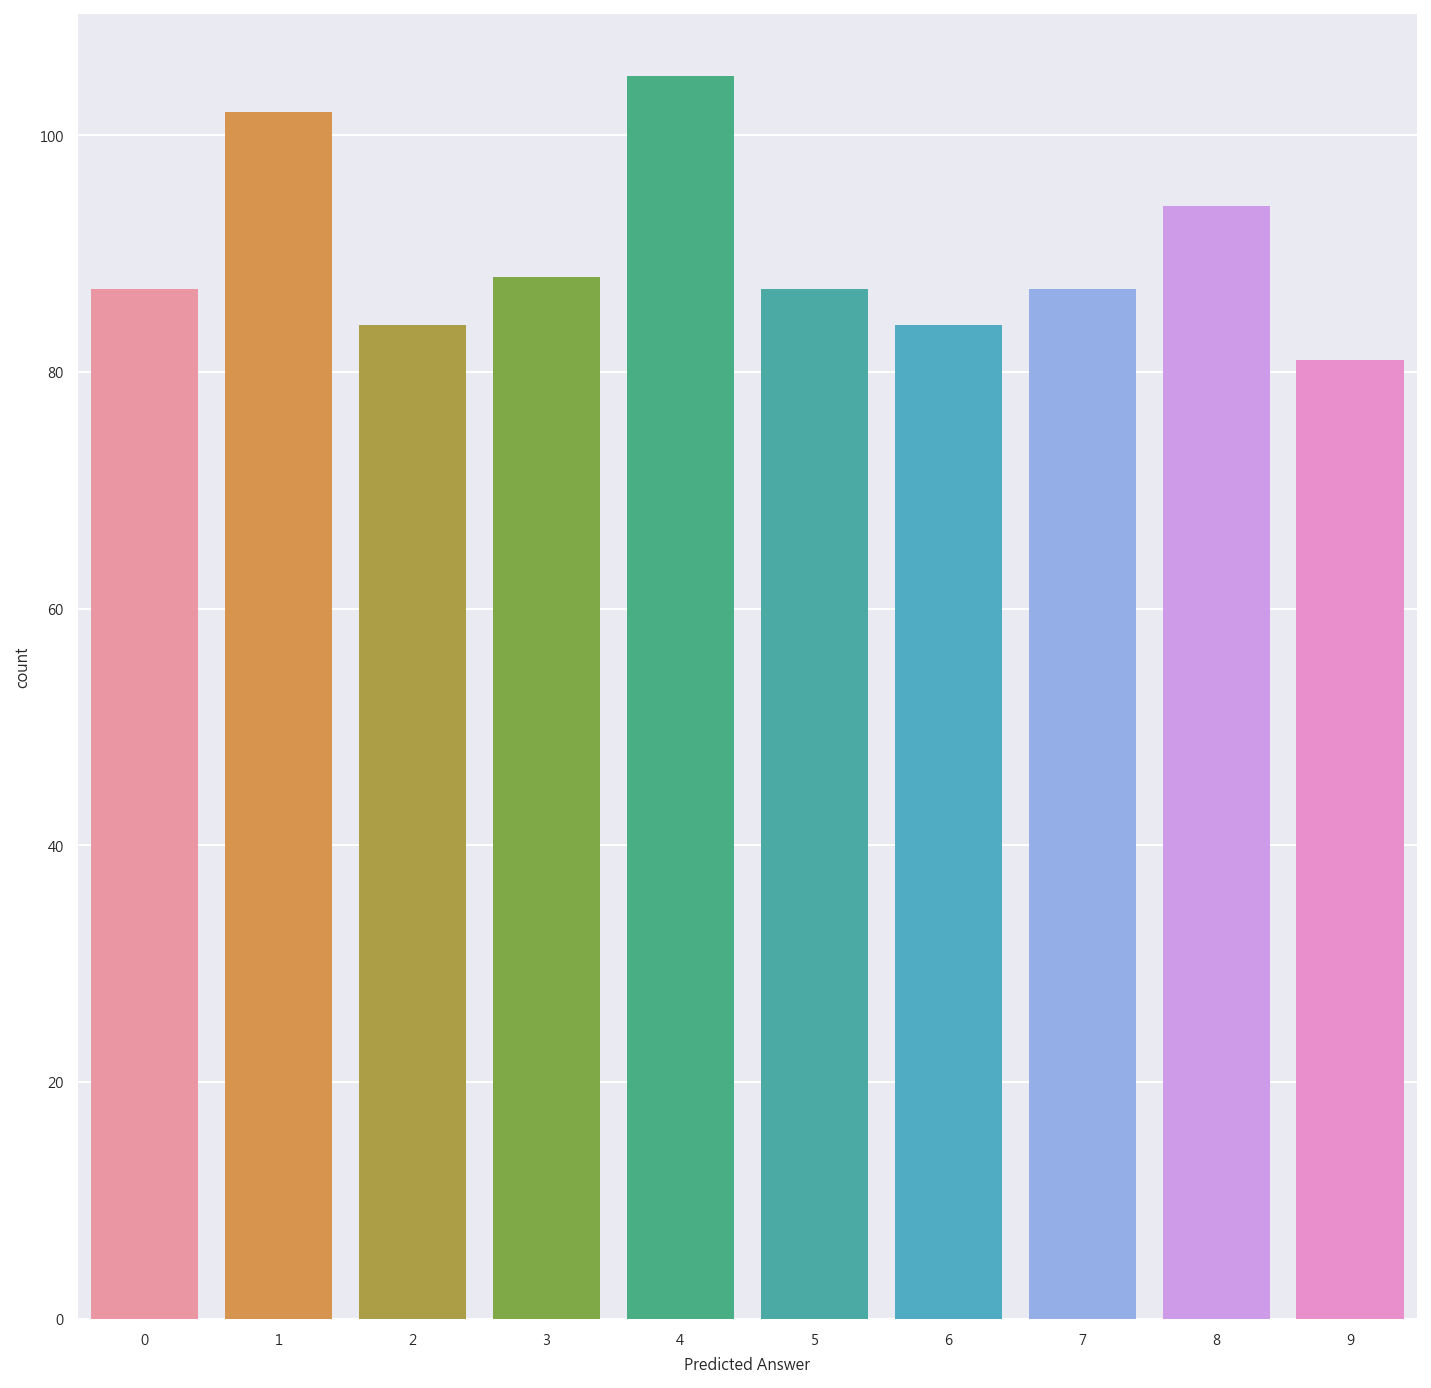

In [54]:
with open(r"Model/clfsvc.model", "rb") as input_file:
    clfsvc = pickle.load(input_file)

Answer_by_clfsvc = clfsvc.predict(TestX_Scaler)
Answer_proba_clfsvc = clfsvc.predict_proba(TestX_Scaler)

ax = sns.countplot(x=Answer_by_clfsvc)
'稍微看一下預測的分佈情形'
ax.set(xlabel='Predicted Answer', ylabel='count')

if not os.path.exists(OutputAnswerCSV):
    Test_Answer = pd.DataFrame()
else:
    Test_Answer = pd.read_csv(OutputAnswerCSV)

Test_Answer['SVM'] = Answer_by_clfsvc
    
if clfsvc.probability:
    col_names = ['SVM_p_' + str(s)  for s in clfsvc.classes_] 
    Test_Answer_prob = pd.DataFrame(Answer_proba_clfsvc,columns=col_names)


    for col in col_names:
        Test_Answer[col] = Test_Answer_prob[col]

else:
    output = Test_Answer    
    
if TestY is not 0:
    print('以下為測試資料的預測結果準確率')
    if 'Truth' not in Test_Answer.columns:
        Test_Answer['Truth'] = TestY.values
    report = classification_report(TestY, Answer_by_clfsvc,digits=4)
    print(os.linesep,report)
    TestReport = pd.concat([TestReport,TestReport_Metrics(
    TestReport,'SVM',Test_Answer['Truth'],Test_Answer['SVM'],Test_Answer['SVM_p_1'])]).drop_duplicates(subset=['Algorithm'])
    #print(TestReport)

    
    

Test_Answer.to_csv(OutputAnswerCSV, index=False,header=True,encoding = 'utf8')





<table>
  <tr>
    <th><font size=4% face="Arial Black" color="GOLD">Shortcut :  </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[從零開始](#BEGIN) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[結果](#ToBecontinued) </font></th>
  </tr>

</table>
<a id="BEGIN"></a>

<table>
  <tr>
    <th align="center"><font size=3% face="Arial Black" color="GOLD">Shortcut :  </font></th><th></th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[DecisionTree](#DecisionTree) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[RandomForest](#RandomForest) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[GradientBoost](#GradientBoost) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[Ridge](#Ridge) </font></th><th></th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[SVM](#SVM) </font></th><th></th>

  </tr><tr>
    <th></th><th></th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[KNN](#K-NN) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[SGD](#SGD) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[NaiveBayes](#NaiveBayes) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[DeepLearning](#DeepLearning) </font></th><th> </th>
  </tr>

</table>
<a id="K-NN"></a>

## <font color=DARKBLUE>使用 KNN 進行分類</font>


### 分別以 split 產生 report 以及 cross-validation 驗證演算法 

- wiki : [cross-validation 交叉驗證](https://zh.wikipedia.org/wiki/%E4%BA%A4%E5%8F%89%E9%A9%97%E8%AD%89)

本範例中以 **4-fold** 進行驗證，以 **75%** 的有答案資料 (Training Data)進行建模，以剩餘的 **25%** (valid)來計算正確率。

* train_test_split : 將資料進行切分去訓練模型
* classification_report : 依據訓練的模型，預測 valid 資料，並產生結果表格
* cross_val_score : 將資料進行切分去訓練模型，重複執行交叉驗證，並產生 Accuracy 平均 

**train_test_split** 的 **classification_report**是其中一次切割之後的驗證結果，可能會不足以說明模型穩定度

**cross_val_score**則是數次交叉驗證的平均，一般而言可用以預測整體模型準確率

<!--- ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
--->

<font color=OliveDrab size=5%>◎◎◎ ↓ </font> 建立隨機森林模型，並以 cross-validation 檢驗效能

In [55]:
from sklearn.neighbors import KNeighborsClassifier
clfknc = KNeighborsClassifier(n_jobs=n_jobs)
clfknc.set_params(**{'algorithm': 'auto', 'n_neighbors': 45, 'p': 2, 'weights': 'distance'})

temp = int(int(250/TrainX.shape[1])*1e3)
msize = min(max(temp,TrainY.shape[0]),temp)

clfknc.fit(X_train_sc[:msize],y_train[:msize])

print('以下是 KNeighborsClassifier 的分類與驗證 : ', )
report = classification_report(y_valid, clfknc.predict(X_valid_sc),digits=4)
print(os.linesep,report)


CrossValid = cross_val_score(clfknc, TrainX_Scaler[:msize], TrainY[:msize], cv=4, verbose=3,  scoring='f1_weighted')
Train_Valid_Acc.update({'k-NN':CrossValid.mean()})
print(os.linesep,'以上為 CrossValidation 每次的準確度，平均準確為', CrossValid.mean().round(10) , '大約是 Baseline DummyClassifier 的' , (CrossValid.mean()/DumCrossValid).round(3),'倍')



以下是 KNeighborsClassifier 的分類與驗證 : 

              precision    recall  f1-score   support

          0     0.8571    1.0000    0.9231        18
          1     0.8947    0.8500    0.8718        20
          2     0.9000    0.9474    0.9231        19
          3     0.9444    0.8947    0.9189        19
          4     1.0000    0.9474    0.9730        19
          5     1.0000    0.8333    0.9091        24
          6     0.9048    0.9500    0.9268        20
          7     1.0000    0.9412    0.9697        17
          8     0.8333    0.8333    0.8333        18
          9     0.7778    0.8750    0.8235        24

avg / total     0.9097    0.9040    0.9047       198

[CV]  ................................................................
[CV] ........................ , score=0.888072464200774, total=   0.1s
[CV]  ................................................................
[CV] ....................... , score=0.9251463320590405, total=   0.1s
[CV]  ..................................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ....................... , score=0.8957944174407589, total=   0.1s
[CV]  ................................................................
[CV] ....................... , score=0.8900437566034486, total=   0.1s

 以上為 CrossValidation 每次的準確度，平均準確為 0.8997642426 大約是 Baseline DummyClassifier 的 11.423 倍


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s finished


### <font color=DARKBLUE>建立 KNN </font>



#### 調參數 <font color=RED>(耗時注意)</font> 

 <font color=YELLOW, size=3%>注意，本段程式碼為調參數迴圈，速度緩慢，如只是測試實驗不建議解除註解</font> 
 
目前已註解 # ，如要使用請移除下方程式碼區塊的註解符號#

In [56]:
# param_grid = {"n_neighbors" : range(5,50,5),
#               "weights": ["uniform", "distance"],
#               "algorithm" : ["auto","ball_tree","kd_tree"],
#               "p": [1,2,3],
#               }
# clfknc_Grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, scoring='accuracy',verbose=1,n_jobs=n_jobs)
# clfknc_Grid.fit(TrainX_Scaler[:3000],TrainY[:3000])
# clfknc = clfknc_Grid.best_estimator_
# clfknc_Grid.best_params_

#'algorithm': 'auto', 'n_neighbors': 45, 'p': 3, 'weights': 'distance'

<!---
{'algorithm': 'ball_tree', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
--->
<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  使用整個資料建立 KNN，並將其儲存為 clfknc.model (格式為 pickle檔案)

In [57]:

clfknc.fit(TrainX_Scaler[:msize], TrainY[:msize])

TrainPredict['KNN'] = clfknc.predict(TrainX_Scaler).astype('int')
report = classification_report(TrainY, TrainPredict['KNN'],digits=4)
print(os.linesep,report)


prob = clfknc.predict_proba(TrainX_Scaler)
for i,s in enumerate(clfknc.classes_):
    TrainPredict['KNN_p_' + str(s)] = prob[:,i]

with open(r"Model/clfknc.model", "wb") as output_file:
    pickle.dump(clfknc, output_file)




              precision    recall  f1-score   support

          0     1.0000    1.0000    1.0000        79
          1     1.0000    1.0000    1.0000        79
          2     1.0000    1.0000    1.0000        79
          3     1.0000    1.0000    1.0000        79
          4     1.0000    1.0000    1.0000        79
          5     1.0000    1.0000    1.0000        79
          6     1.0000    1.0000    1.0000        79
          7     1.0000    1.0000    1.0000        79
          8     1.0000    1.0000    1.0000        79
          9     1.0000    1.0000    1.0000        79

avg / total     1.0000    1.0000    1.0000       790



### <font color=DARKBLUE>使用 KNN 進行預測</font>
#### 讀取clfknc.model，對Test data 預測，如果Test data 有答案則順便產生預測報告
如果出現 IOerror "Permission denied" ，請關閉 'Test_Answer.csv' 檔案並重新執行

以下為測試資料的預測結果準確率

              precision    recall  f1-score   support

          0     0.9556    1.0000    0.9773        86
          1     0.8627    0.9263    0.8934        95
          2     0.9506    0.8953    0.9222        86
          3     0.9529    0.8710    0.9101        93
          4     0.9901    0.9804    0.9852       102
          5     0.9759    0.9000    0.9364        90
          6     0.9647    0.9762    0.9704        84
          7     0.8400    0.9882    0.9081        85
          8     0.8444    0.8172    0.8306        93
          9     0.8415    0.8118    0.8263        85

avg / total     0.9186    0.9166    0.9164       899



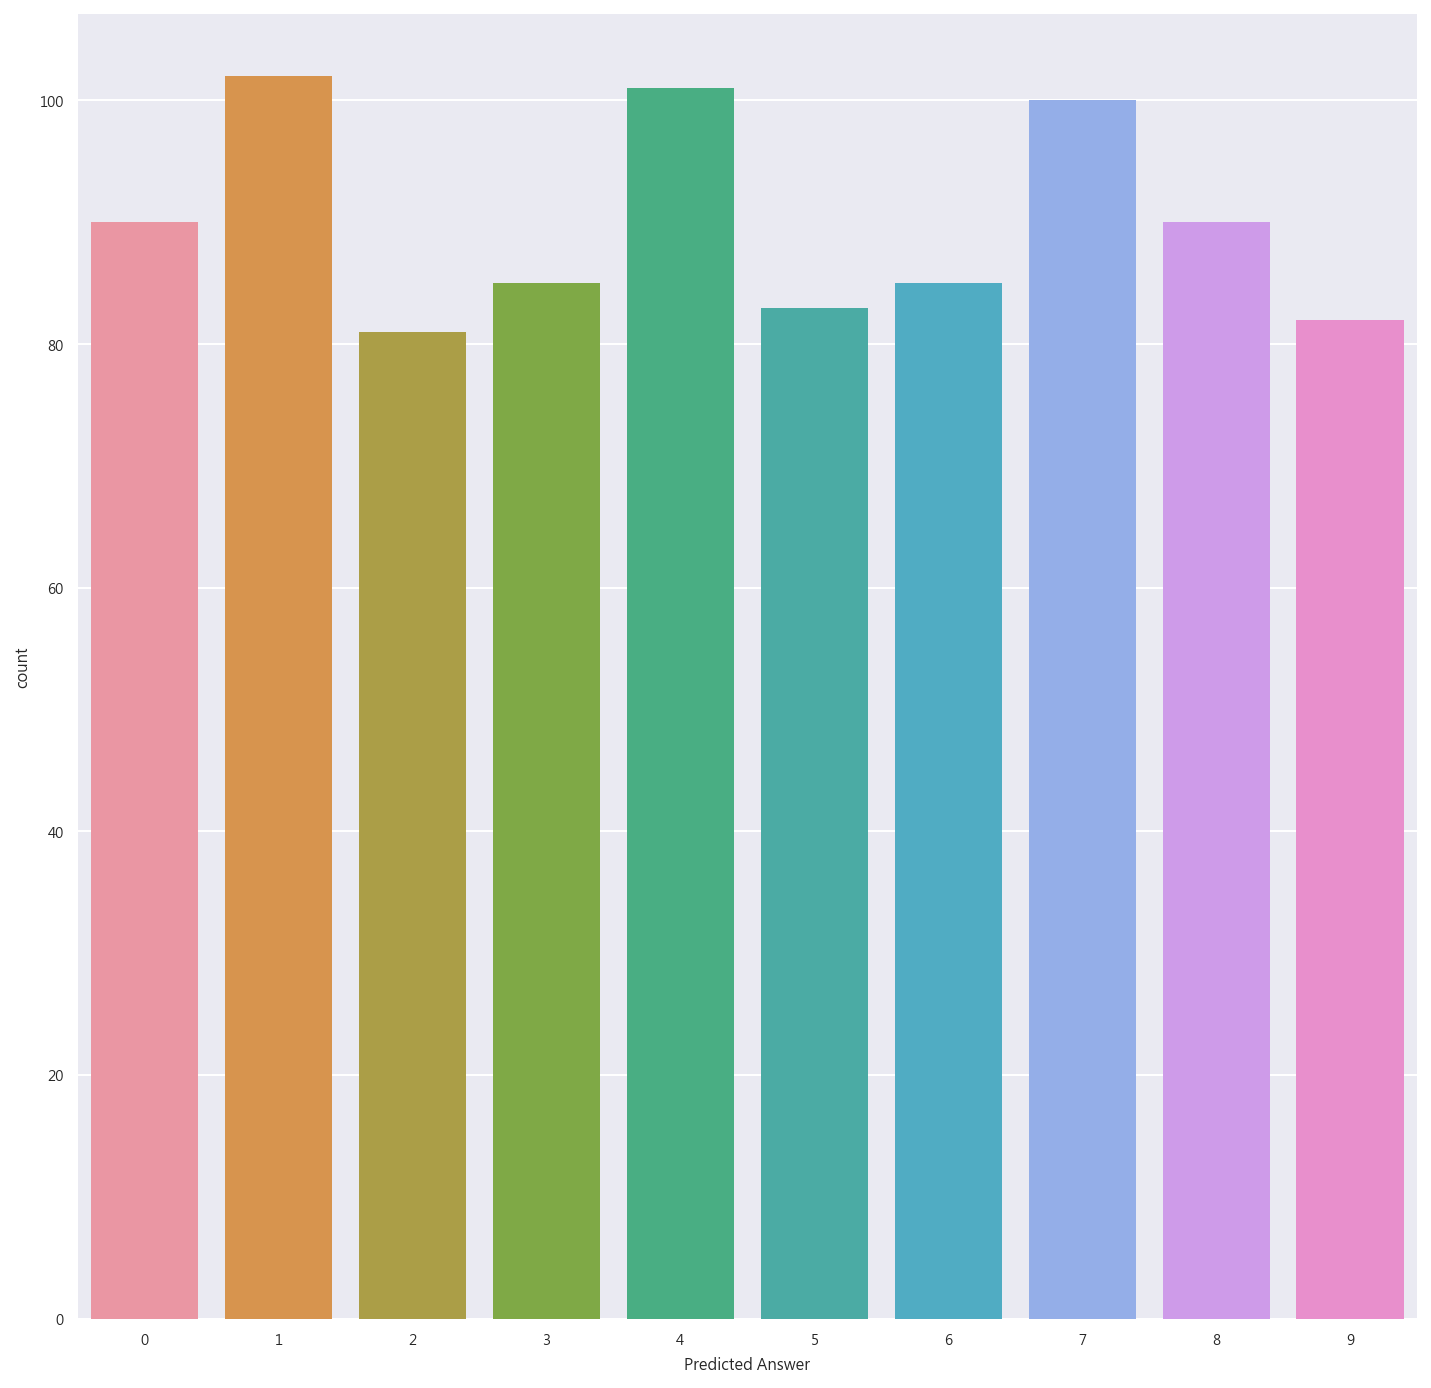

In [58]:
with open(r"Model/clfknc.model", "rb") as input_file:
    clfknc = pickle.load(input_file)

Answer_by_clfknc = clfknc.predict(TestX_Scaler)
Answer_proba_clfknc = clfknc.predict_proba(TestX_Scaler)
ax = sns.countplot(x=Answer_by_clfknc)
'稍微看一下預測的分佈情形'
ax.set(xlabel='Predicted Answer', ylabel='count')

if not os.path.exists(OutputAnswerCSV):
    Test_Answer = pd.DataFrame()
else:
    Test_Answer = pd.read_csv(OutputAnswerCSV)


    
col_names = ['KNN_p_' + str(s)  for s in clfknc.classes_] 
Test_Answer['KNN'] = Answer_by_clfknc
    
Test_Answer_prob = pd.DataFrame(Answer_proba_clfknc,columns=col_names)


for col in col_names:
    Test_Answer[col] = Test_Answer_prob[col]

    
if TestY is not 0:
    print('以下為測試資料的預測結果準確率')
    if 'Truth' not in Test_Answer.columns:
        Test_Answer['Truth'] = TestY.values
    report = classification_report(TestY, Answer_by_clfknc,digits=4)
    print(os.linesep,report)
    TestReport = pd.concat([TestReport,TestReport_Metrics(
    TestReport,'k-NN',Test_Answer['Truth'],Test_Answer['KNN'],Test_Answer['KNN_p_1'])]).drop_duplicates(subset=['Algorithm'])
    #print(TestReport)
    
Test_Answer.to_csv(OutputAnswerCSV, index=False,header=True,encoding = 'utf8')





<table>
  <tr>
    <th><font size=4% face="Arial Black" color="GOLD">Shortcut :  </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[從零開始](#BEGIN) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[結果](#ToBecontinued) </font></th>
  </tr>

</table>
<a id="BEGIN"></a>

<table>
  <tr>
    <th align="center"><font size=3% face="Arial Black" color="GOLD">Shortcut :  </font></th><th></th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[DecisionTree](#DecisionTree) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[RandomForest](#RandomForest) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[GradientBoost](#GradientBoost) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[Ridge](#Ridge) </font></th><th></th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[SVM](#SVM) </font></th><th></th>

  </tr><tr>
    <th></th><th></th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[KNN](#K-NN) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[SGD](#SGD) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[NaiveBayes](#NaiveBayes) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[DeepLearning](#DeepLearning) </font></th><th> </th>
  </tr>

</table>
<a id="SGD"></a>

## <font color=DARKBLUE>使用 Stochastic Gradient Descent 進行分類</font>


### 分別以 split 產生 report 以及 cross-validation 驗證演算法 

- wiki : [cross-validation 交叉驗證](https://zh.wikipedia.org/wiki/%E4%BA%A4%E5%8F%89%E9%A9%97%E8%AD%89)

本範例中以 **4-fold** 進行驗證，以 **75%** 的有答案資料 (Training Data)進行建模，以剩餘的 **25%** (valid)來計算正確率。

* train_test_split : 將資料進行切分去訓練模型
* classification_report : 依據訓練的模型，預測 valid 資料，並產生結果表格
* cross_val_score : 將資料進行切分去訓練模型，重複執行交叉驗證，並產生 Accuracy 平均 

**train_test_split** 的 **classification_report**是其中一次切割之後的驗證結果，可能會不足以說明模型穩定度

**cross_val_score**則是數次交叉驗證的平均，一般而言可用以預測整體模型準確率

<!--- ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
--->

<font color=OliveDrab size=5%>◎◎◎ ↓ </font> 建立 Stochastic Gradient Descent 模型，並以 cross-validation 檢驗效能

In [59]:
from sklearn.linear_model import SGDClassifier

clfsgd = SGDClassifier(alpha=0.00002, max_iter=1e4, loss='log' ,random_state=Random_State,n_jobs=n_jobs)

temp = int(int(250/TrainX.shape[1])*1e3)
msize = min(max(temp,TrainY.shape[0]),temp)


clfsgd.fit(X_train_sc[:msize],y_train[:msize])

print('以下是 SGDClassifier 的分類與驗證 : ', )
report = classification_report(y_valid, clfsgd.predict(X_valid_sc),digits=4)
print(os.linesep,report)


CrossValid = cross_val_score(clfsgd, TrainX_Scaler[:msize], TrainY[:msize], cv=4, verbose=3,  scoring='f1_weighted')
Train_Valid_Acc.update({'SGD':CrossValid.mean()})
print(os.linesep,'以上為 CrossValidation 每次的準確度，平均準確為', CrossValid.mean().round(10) , '大約是 Baseline DummyClassifier 的' , (CrossValid.mean()/DumCrossValid).round(3),'倍')



以下是 SGDClassifier 的分類與驗證 : 

              precision    recall  f1-score   support

          0     1.0000    1.0000    1.0000        18
          1     1.0000    0.9500    0.9744        20
          2     0.9474    0.9474    0.9474        19
          3     0.9000    0.9474    0.9231        19
          4     0.9474    0.9474    0.9474        19
          5     1.0000    0.8750    0.9333        24
          6     0.9048    0.9500    0.9268        20
          7     1.0000    0.8824    0.9375        17
          8     0.7895    0.8333    0.8108        18
          9     0.8519    0.9583    0.9020        24

avg / total     0.9336    0.9293    0.9300       198

[CV]  ................................................................
[CV] ....................... , score=0.9143913117313721, total=  12.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.2s remaining:    0.0s


[CV] ....................... , score=0.9293576104551715, total=  13.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   25.2s remaining:    0.0s


[CV] ....................... , score=0.9396195542523573, total=  13.7s
[CV]  ................................................................
[CV] ....................... , score=0.9270890844575055, total=  12.9s

 以上為 CrossValidation 每次的準確度，平均準確為 0.9276143902 大約是 Baseline DummyClassifier 的 11.777 倍


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   51.9s finished


### <font color=DARKBLUE>建立 Stochastic Gradient Descent </font>



#### 調參數 <font color=RED>(耗時注意)</font> 

 <font color=YELLOW, size=3%>注意，本段程式碼為調參數迴圈，速度緩慢，如只是測試實驗不建議解除註解</font> 
 
目前已註解 # ，如要使用請移除下方程式碼區塊的註解符號#

In [60]:
# param_grid = {
#     'loss': ['log','modified_huber','perceptron'],
#     'penalty': ['l1', 'l2', 'elasticnet'],
#     'alpha': [0.01, 0.001, 0.0001, 0.00001],
#     'max_iter' : range(100,2000,700),
#     'learning_rate' : ['constant','optimal','invscaling'],
#     'eta0' :[0.00001],
#     'class_weight' : ['balanced']
#               }
# clfsgd_Grid = GridSearchCV(SGDClassifier(random_state=Random_State), param_grid=param_grid, scoring='accuracy',verbose=1,n_jobs=n_jobs)
# clfsgd_Grid.fit(TrainX,TrainY)
# clfsgd = clfsgd_Grid.best_estimator_
# clfsgd_Grid.best_params_

<!---
{'alpha': 0.001,
 'class_weight': 'balanced',
 'eta0': 0.001,
 'learning_rate': 'optimal',
 'loss': 'log',
 'max_iter': 100,
 'penalty': 'l1'}
--->
<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  使用整個資料建立 Stochastic Gradient Descent，並將其儲存為 clfsgd.model (格式為 pickle檔案)

In [61]:
clfsgd.fit(TrainX_Scaler, TrainY)
TrainPredict['SGD'] = clfsgd.predict(TrainX_Scaler)
report = classification_report(TrainY, TrainPredict['SGD'], digits=4)
print(os.linesep,report)


prob = clfsgd.predict_proba(TrainX_Scaler)
for i,s in enumerate(clfsgd.classes_):
    TrainPredict['SGD_p_' + str(s)] = prob[:,i]

with open(r"Model/clfsgd.model", "wb") as output_file:
    pickle.dump(clfsgd, output_file)




              precision    recall  f1-score   support

          0     1.0000    1.0000    1.0000        79
          1     1.0000    1.0000    1.0000        79
          2     1.0000    1.0000    1.0000        79
          3     1.0000    1.0000    1.0000        79
          4     1.0000    0.9873    0.9936        79
          5     1.0000    1.0000    1.0000        79
          6     1.0000    1.0000    1.0000        79
          7     1.0000    1.0000    1.0000        79
          8     0.9753    1.0000    0.9875        79
          9     1.0000    0.9873    0.9936        79

avg / total     0.9975    0.9975    0.9975       790



### <font color=DARKBLUE>使用 Stochastic Gradient Descent 進行預測</font>
#### 讀取clfsgd.model，對Test data 預測，如果Test data 有答案則順便產生預測報告
如果出現 IOerror "Permission denied" ，請關閉 'Test_Answer.csv' 檔案並重新執行

以下為測試資料的預測結果準確率

              precision    recall  f1-score   support

          0     0.9773    1.0000    0.9885        86
          1     0.8687    0.9053    0.8866        95
          2     1.0000    0.9419    0.9701        86
          3     0.9647    0.8817    0.9213        93
          4     0.9700    0.9510    0.9604       102
          5     0.9659    0.9444    0.9551        90
          6     0.9535    0.9762    0.9647        84
          7     0.8842    0.9882    0.9333        85
          8     0.8495    0.8495    0.8495        93
          9     0.8333    0.8235    0.8284        85

avg / total     0.9269    0.9255    0.9255       899



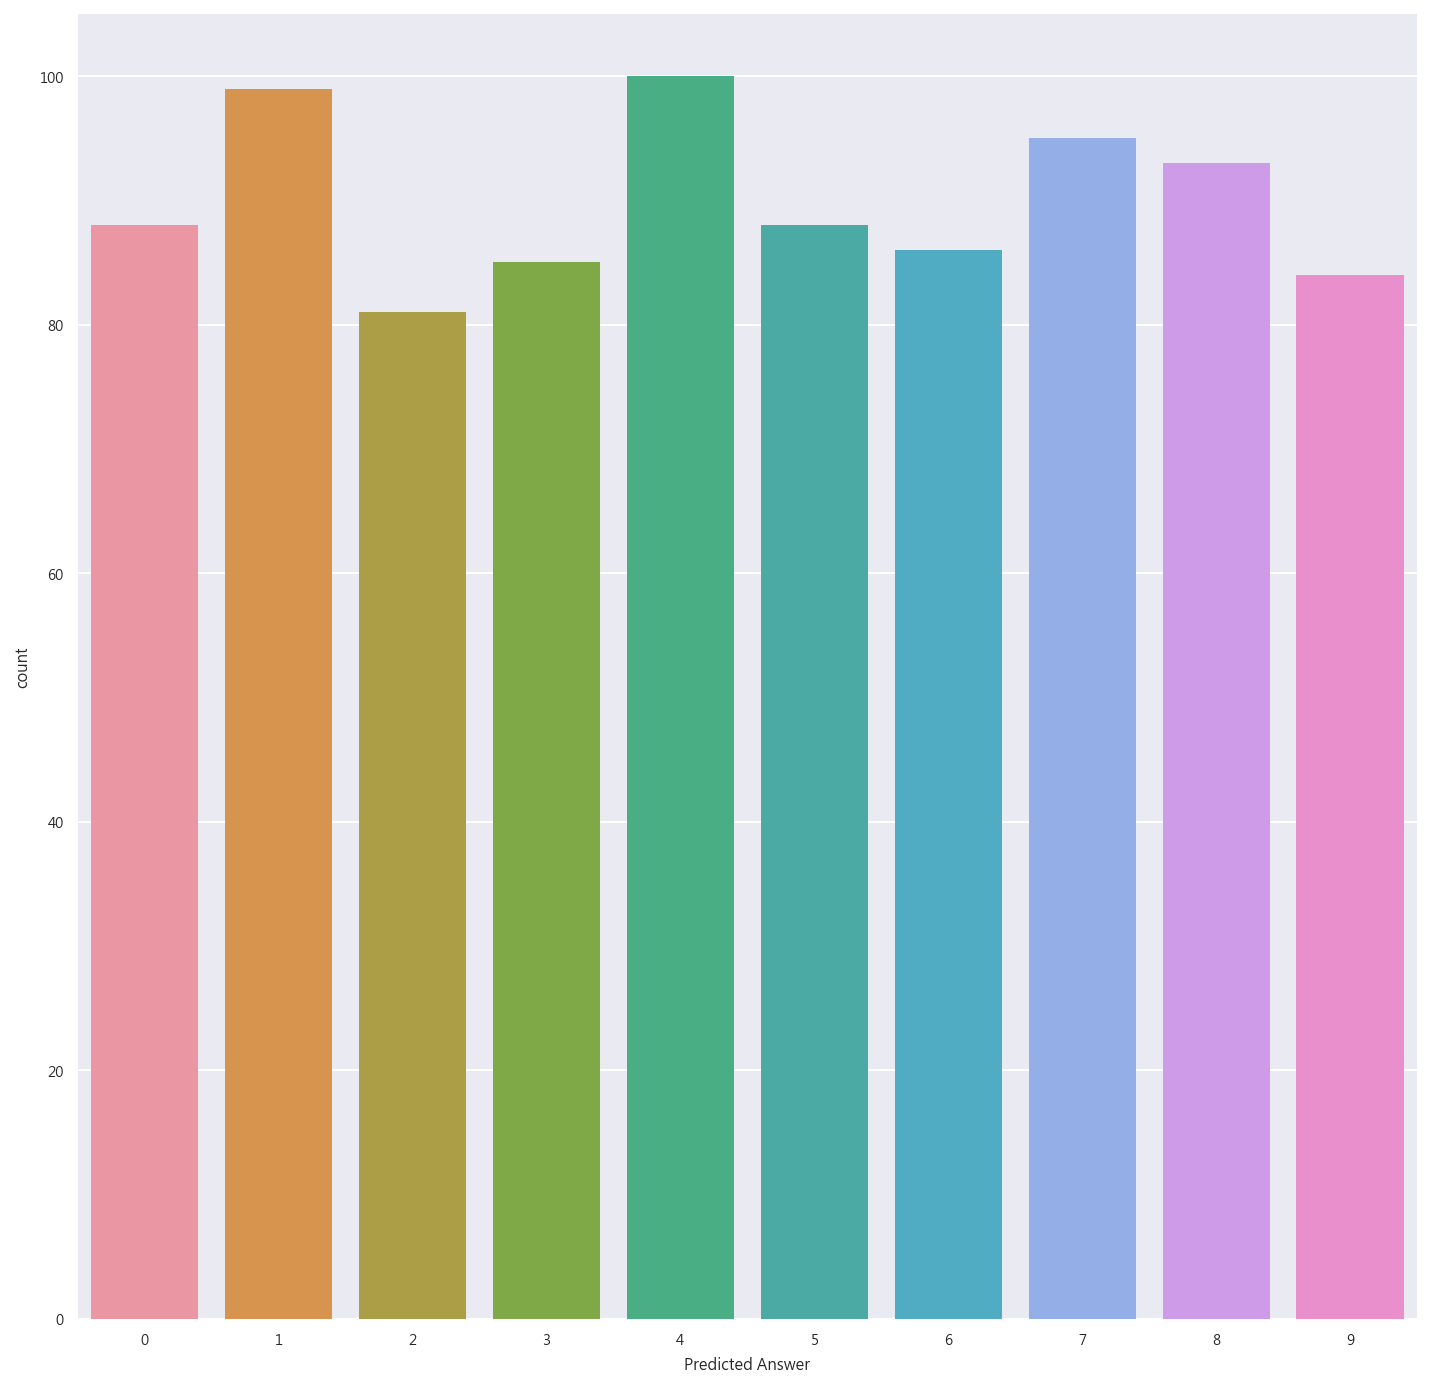

In [62]:
with open(r"Model/clfsgd.model", "rb") as input_file:
    clfsgd = pickle.load(input_file)

Answer_by_clfsgd = clfsgd.predict(TestX_Scaler)
Answer_proba_clfsgd = clfsgd.predict_proba(TestX_Scaler)
ax = sns.countplot(x=Answer_by_clfsgd)
'稍微看一下預測的分佈情形'
ax.set(xlabel='Predicted Answer', ylabel='count')

if not os.path.exists(OutputAnswerCSV):
    Test_Answer = pd.DataFrame()
else:
    Test_Answer = pd.read_csv(OutputAnswerCSV)


    
col_names = ['SGD_p_' + str(s)  for s in clfsgd.classes_] 
Test_Answer['SGD'] = Answer_by_clfsgd
    
Test_Answer_prob = pd.DataFrame(Answer_proba_clfsgd,columns=col_names)


for col in col_names:
    Test_Answer[col] = Test_Answer_prob[col]

    
if TestY is not 0:
    print('以下為測試資料的預測結果準確率')
    if 'Truth' not in Test_Answer.columns:
        Test_Answer['Truth'] = TestY.values
    report = classification_report(TestY, Answer_by_clfsgd,digits=4)
    print(os.linesep,report)
    TestReport = pd.concat([TestReport,TestReport_Metrics(
    TestReport,'GradientDescent',Test_Answer['Truth'],Test_Answer['SGD'],Test_Answer['SGD_p_1'])]).drop_duplicates(subset=['Algorithm'])
    #print(TestReport)
    
Test_Answer.to_csv(OutputAnswerCSV, index=False,header=True,encoding = 'utf8')





<table>
  <tr>
    <th><font size=4% face="Arial Black" color="GOLD">Shortcut :  </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[從零開始](#BEGIN) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[結果](#ToBecontinued) </font></th>
  </tr>

</table>
<a id="BEGIN"></a>

<table>
  <tr>
    <th align="center"><font size=3% face="Arial Black" color="GOLD">Shortcut :  </font></th><th></th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[DecisionTree](#DecisionTree) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[RandomForest](#RandomForest) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[GradientBoost](#GradientBoost) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[Ridge](#Ridge) </font></th><th></th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[SVM](#SVM) </font></th><th></th>

  </tr><tr>
    <th></th><th></th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[KNN](#K-NN) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[SGD](#SGD) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[NaiveBayes](#NaiveBayes) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[DeepLearning](#DeepLearning) </font></th><th> </th>
  </tr>

</table>
<a id="NaiveBayes"></a>

## <font color=DARKBLUE>使用 Gaussian Naive Bayes 進行分類</font>


### 分別以 split 產生 report 以及 cross-validation 驗證演算法 

- wiki : [cross-validation 交叉驗證](https://zh.wikipedia.org/wiki/%E4%BA%A4%E5%8F%89%E9%A9%97%E8%AD%89)

本範例中以 **4-fold** 進行驗證，以 **75%** 的有答案資料 (Training Data)進行建模，以剩餘的 **25%** (valid)來計算正確率。

* train_test_split : 將資料進行切分去訓練模型
* classification_report : 依據訓練的模型，預測 valid 資料，並產生結果表格
* cross_val_score : 將資料進行切分去訓練模型，重複執行交叉驗證，並產生 Accuracy 平均 

**train_test_split** 的 **classification_report**是其中一次切割之後的驗證結果，可能會不足以說明模型穩定度

**cross_val_score**則是數次交叉驗證的平均，一般而言可用以預測整體模型準確率

<!--- ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
--->

<font color=OliveDrab size=5%>◎◎◎ ↓ </font> 建立 Gaussian Naive Bayes 模型，並以 cross-validation 檢驗效能

In [63]:
from sklearn.naive_bayes import GaussianNB
clfgnb = GaussianNB()



clfgnb.fit(X_train_sc,y_train)

print('以下是  Gaussian Naive Bayes 的分類與驗證 : ', )
report = classification_report(y_valid, clfgnb.predict(X_valid_sc))
print(os.linesep,report)


CrossValid = cross_val_score(clfgnb, TrainX_Scaler, TrainY, cv=4, verbose=3,  scoring='accuracy')
Train_Valid_Acc.update({'NaiveBayes':CrossValid.mean()})
print(os.linesep,'以上為 CrossValidation 每次的準確度，平均準確為', CrossValid.mean().round(10) , '大約是 Baseline DummyClassifier 的' , (CrossValid.mean()/DumCrossValid).round(3),'倍')



以下是  Gaussian Naive Bayes 的分類與驗證 : 

              precision    recall  f1-score   support

          0       1.00      0.83      0.91        18
          1       0.86      0.90      0.88        20
          2       0.95      0.95      0.95        19
          3       0.80      0.84      0.82        19
          4       1.00      0.63      0.77        19
          5       1.00      0.79      0.88        24
          6       0.80      1.00      0.89        20
          7       0.71      1.00      0.83        17
          8       0.87      0.72      0.79        18
          9       0.68      0.79      0.73        24

avg / total       0.87      0.84      0.84       198

[CV]  ................................................................
[CV] ..................................... , score=0.84, total=   0.0s
[CV]  ................................................................
[CV] ..................................... , score=0.83, total=   0.0s
[CV]  .................................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


### <font color=DARKBLUE>建立 Gaussian Naive Bayes </font>



<!---
{'algorithm': 'ball_tree', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
--->
<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  使用整個資料建立 Stochastic Gradient Descent，並將其儲存為 clfgnb.model (格式為 pickle檔案)

In [64]:
clfgnb.fit(TrainX_Scaler, TrainY)
TrainPredict['GNB'] = clfgnb.predict(TrainX_Scaler)

report = classification_report(TrainY, TrainPredict['GNB'])
print(os.linesep,report)


prob = clfgnb.predict_proba(TrainX_Scaler)
for i,s in enumerate(clfgnb.classes_):
    TrainPredict['GNB_p_' + str(s)] = prob[:,i]

with open(r"Model/clfgnb.model", "wb") as output_file:
    pickle.dump(clfgnb, output_file)




              precision    recall  f1-score   support

          0       1.00      1.00      1.00        79
          1       0.84      0.90      0.87        79
          2       0.94      0.95      0.94        79
          3       0.97      0.84      0.90        79
          4       0.98      0.68      0.81        79
          5       0.96      0.92      0.94        79
          6       0.81      1.00      0.90        79
          7       0.76      0.99      0.86        79
          8       0.88      0.72      0.79        79
          9       0.85      0.89      0.87        79

avg / total       0.90      0.89      0.89       790



### <font color=DARKBLUE>使用 Gaussian Naive Bayes 進行預測</font>
#### 讀取clfgnb.model，對Test data 預測，如果Test data 有答案則順便產生預測報告
如果出現 IOerror "Permission denied" ，請關閉 'Test_Answer.csv' 檔案並重新執行

以下為測試資料的預測結果準確率

              precision    recall  f1-score   support

          0     1.0000    1.0000    1.0000        86
          1     0.6952    0.7684    0.7300        95
          2     0.9241    0.8488    0.8848        86
          3     1.0000    0.8172    0.8994        93
          4     0.9620    0.7451    0.8398       102
          5     0.9176    0.8667    0.8914        90
          6     0.8384    0.9881    0.9071        84
          7     0.6641    1.0000    0.7981        85
          8     0.7317    0.6452    0.6857        93
          9     0.7875    0.7412    0.7636        85

avg / total     0.8533    0.8376    0.8384       899



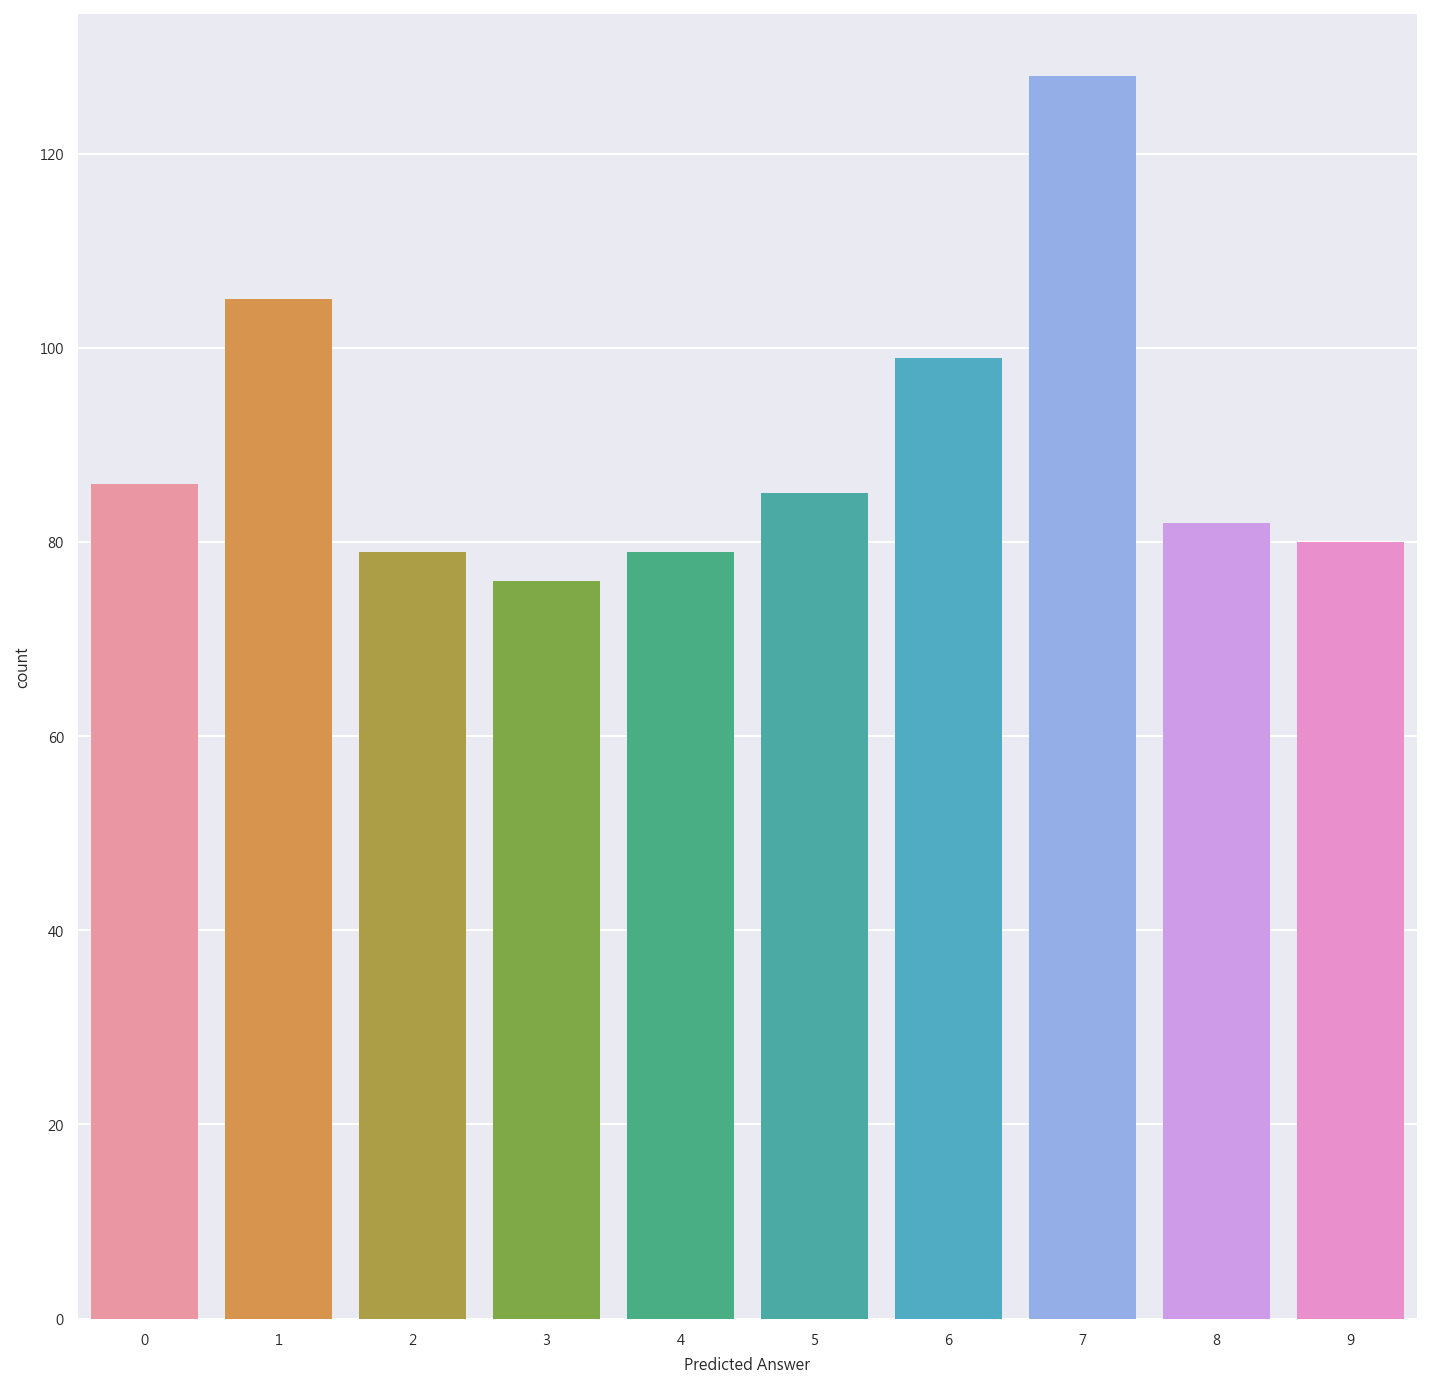

In [65]:
with open(r"Model/clfgnb.model", "rb") as input_file:
    clfgnb = pickle.load(input_file)

Answer_by_clfgnb = clfgnb.predict(TestX_Scaler)
Answer_proba_clfgnb = clfgnb.predict_proba(TestX_Scaler)
ax = sns.countplot(x=Answer_by_clfgnb)
'稍微看一下預測的分佈情形'
ax.set(xlabel='Predicted Answer', ylabel='count')

if not os.path.exists(OutputAnswerCSV):
    Test_Answer = pd.DataFrame()
else:
    Test_Answer = pd.read_csv(OutputAnswerCSV)


    
col_names = ['GNB_p_' + str(s)  for s in clfgnb.classes_] 
Test_Answer['GNB'] = Answer_by_clfgnb
    
Test_Answer_prob = pd.DataFrame(Answer_proba_clfgnb,columns=col_names)


for col in col_names:
    Test_Answer[col] = Test_Answer_prob[col]

    
if TestY is not 0:
    print('以下為測試資料的預測結果準確率')
    if 'Truth' not in Test_Answer.columns:
        Test_Answer['Truth'] = TestY.values
    report = classification_report(TestY, Answer_by_clfgnb,digits=4)
    print(os.linesep,report)
    TestReport = pd.concat([TestReport,TestReport_Metrics(
    TestReport,'GaussianNB',Test_Answer['Truth'],Test_Answer['GNB'],Test_Answer['GNB_p_1'])]).drop_duplicates(subset=['Algorithm'])
    #print(TestReport)
    
Test_Answer.to_csv(OutputAnswerCSV, index=False,header=True,encoding = 'utf8')





<table>
  <tr>
    <th><font size=4% face="Arial Black" color="GOLD">Shortcut :  </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[從零開始](#BEGIN) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font></th><th></th>
    <th><font size=5% face="Microsoft JhengHei">[結果](#ToBecontinued) </font></th>
  </tr>

</table>
<a id="BEGIN"></a>

<table>
  <tr>
    <th align="center"><font size=3% face="Arial Black" color="GOLD">Shortcut :  </font></th><th></th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[DecisionTree](#DecisionTree) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[RandomForest](#RandomForest) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[GradientBoost](#GradientBoost) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[Ridge](#Ridge) </font></th><th></th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[SVM](#SVM) </font></th><th></th>

  </tr><tr>
    <th></th><th></th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[KNN](#K-NN) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[SGD](#SGD) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[NaiveBayes](#NaiveBayes) </font></th><th> </th>
    <th style="text-align: center;"><font size=4% face="Microsoft JhengHei">[DeepLearning](#DeepLearning) </font></th><th> </th>
  </tr>

</table>
<a id="DeepLearning"></a>

------
## <font color=DARKBLUE>使用深度學習(類神經網路)進行分類</font>
↓ : 建立Keras網路，因為類神經網路耗時，直接進行擬合訓練及預測

↓ : 建立一個數層的網路，以準確度為衡量標準，以validation的loss作為監測，一段時間沒改善就停止

In [66]:
#from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
    #label_encoder = LabelEncoder()
    #integer_encoded = label_encoder.fit_transform(TrainY)
if len(set(TrainY)) > 2 :
    onehot_encoder = OneHotEncoder(sparse=False)
    onehot_encoded = onehot_encoder.fit_transform((TrainY+9).values.reshape(len(TrainY), 1))
    #inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
    np.argmax(onehot_encoded, axis=1)



    
from keras.models import Sequential, Model
from keras.layers import Dense,Dropout,Input,concatenate
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.preprocessing import OneHotEncoder
#from sklearn.model_selection import train_test_split
early_stopping_monitor = EarlyStopping(patience=12,monitor='val_loss', mode='min')

save_best = ModelCheckpoint('Model/clfkeras_best.hdf5', save_best_only=True, monitor='val_loss', mode='min')
# create model




M_in = Input(shape=(TrainX_Scaler.shape[1],))
M_1 = Dense(128, activation = 'relu')(M_in)
M_1 = Dropout(0.25)(M_1)
M_2 = Dense(256, activation = 'relu')(M_1)
M_2 = Dropout(0.25)(M_2)
M_3 = Dense(256, activation = 'relu')(M_2)
M_3 = Dropout(0.25)(M_3)
M_4 = Dense(128, activation = 'relu')(M_3)
M_4 = Dropout(0.25)(M_4)
M_5 = Dense(64, activation = 'relu')(M_3)
M_5 = Dropout(0.25)(M_4)
M_6 = Dense(32, activation = 'relu')(M_4)
M_6 = Dropout(0.25)(M_5)

if len(set(TrainY)) == 2 :
    M_out = Dense(1,  activation='sigmoid')(M_6)
    model = Model(inputs = M_in, outputs  = M_out)
    model.summary()
    model.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy'])
else:
    M_out = Dense(onehot_encoded.shape[1],  activation='softmax')(M_6)
    model = Model(inputs = M_in, outputs  = M_out)
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
__________

####  <font color=DARKBLUE> 訓練類神經網路學習 </font>
<a id="chapter-1"></a>

In [67]:

# Fit the model
#class_weight = dict(zip(TrainY.value_counts().keys(),[int(20*(TrainY.shape[0] - x)/TrainY.shape[0]) for x in list(TrainY.value_counts())] ))



if len(set(TrainY)) == 2 :
    model.fit(TrainX_Scaler.values, TrainY.values, epochs=100, batch_size=64,validation_split=0.25,\
               shuffle=True,callbacks=[early_stopping_monitor,save_best])
    # evaluate the model
    scores = model.evaluate(TrainX_Scaler.values, TrainY.values)
else:
    model.fit(TrainX_Scaler.values, onehot_encoded, epochs=100, batch_size=64,validation_split=0.25,\
               shuffle=True,callbacks=[early_stopping_monitor,save_best])
    # evaluate the model
    scores = model.evaluate(TrainX_Scaler.values, onehot_encoded)



print()
print('整體分類準確度'+"\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


from keras.models import load_model
model.save('Model/clfkeras.h5')

Train on 592 samples, validate on 198 samples
Epoch 1/100
592/592 [==============================] - 1s 1ms/step - loss: 2.2538 - acc: 0.1520 - val_loss: 2.0419 - val_acc: 0.3485
Epoch 2/100
592/592 [==============================] - 0s 323us/step - loss: 1.8659 - acc: 0.3666 - val_loss: 1.2309 - val_acc: 0.6717
Epoch 3/100
592/592 [==============================] - 0s 179us/step - loss: 1.3023 - acc: 0.5574 - val_loss: 1.0024 - val_acc: 0.6414
Epoch 4/100
592/592 [==============================] - 0s 257us/step - loss: 0.9962 - acc: 0.6537 - val_loss: 0.6242 - val_acc: 0.8333
Epoch 5/100
592/592 [==============================] - 0s 238us/step - loss: 0.7821 - acc: 0.7500 - val_loss: 0.5177 - val_acc: 0.8586
Epoch 6/100
592/592 [==============================] - 0s 205us/step - loss: 0.6151 - acc: 0.8226 - val_loss: 0.5076 - val_acc: 0.8737
Epoch 7/100
592/592 [==============================] - 0s 201us/step - loss: 0.5163 - acc: 0.8429 - val_loss: 0.3930 - val_acc: 0.8788
Epoch 8/100

####  <font color=DARKBLUE> 儲存已訓練的網路 </font>
儲存並且再使用存好的網路進行預測

In [68]:
from keras.models import load_model
model = load_model('Model/clfkeras_best.hdf5')

Train_Predict = model.predict(TrainX_Scaler.values)
#report = classification_report(TrainY, np.argmax(Train_Predict).round(0))


if len(set(TrainY)) == 2 :
    Answer_by_keras = Train_Predict.reshape((TrainX_Scaler.shape[0])).round(0)
    TrainPredict['keras'] = Answer_by_keras
    report = classification_report(TrainY, Answer_by_keras,digits=4)
    print(os.linesep,report)
    temp = np.hstack([1-Train_Predict,Train_Predict])
    for i,s in enumerate(sorted(set(TrainY))):
        TrainPredict['keras_p_' + str(s)] = temp[:,i]
    scores_v = model.evaluate(TrainX_Scaler.values[-int(len(TrainX_Scaler)/4):], TrainY.values[-int(len(TrainX_Scaler)/4):])

else:
    Answer_by_keras = pd.Series(list(set(TrainY)))[np.argmax(Train_Predict, axis=1) ].values
    TrainPredict['keras'] = Answer_by_keras
    report = classification_report(TrainY, Answer_by_keras,digits=4)
    print(os.linesep,report)
    for i,s in enumerate(sorted(set(TrainY))):
        TrainPredict['keras_p_' + str(s)] = Train_Predict[:,i]             
    scores_v = model.evaluate(TrainX_Scaler.values[-int(len(TrainX_Scaler)/4):], onehot_encoded[-int(len(TrainX_Scaler)/4):])


Train_Valid_Acc.update({'Deep':scores_v[1]})
print(scores_v[1])



              precision    recall  f1-score   support

          0     0.9753    1.0000    0.9875        79
          1     0.9620    0.9620    0.9620        79
          2     1.0000    1.0000    1.0000        79
          3     0.9405    1.0000    0.9693        79
          4     0.9625    0.9747    0.9686        79
          5     0.9500    0.9620    0.9560        79
          6     1.0000    0.9873    0.9936        79
          7     0.9634    1.0000    0.9814        79
          8     0.9459    0.8861    0.9150        79
          9     0.9589    0.8861    0.9211        79

avg / total     0.9659    0.9658    0.9654       790

197/197 [==============================] - 0s 441us/step
0.9390862944162437


### <font color=DARKBLUE>使用 類神經網路 進行預測</font>
#### 讀取clfkeras.h5，對Test data 預測，如果Test data 有答案則順便產生預測報告
如果出現 IOerror "Permission denied" ，請關閉 'Test_Answer.csv' 檔案並重新執行

以下為測試資料的預測結果準確率

              precision    recall  f1-score   support

          0     0.9770    0.9884    0.9827        86
          1     0.8632    0.8632    0.8632        95
          2     0.9425    0.9535    0.9480        86
          3     0.9239    0.9140    0.9189        93
          4     0.9608    0.9608    0.9608       102
          5     0.9667    0.9667    0.9667        90
          6     0.9535    0.9762    0.9647        84
          7     0.7522    1.0000    0.8586        85
          8     0.9041    0.7097    0.7952        93
          9     0.8784    0.7647    0.8176        85

avg / total     0.9130    0.9088    0.9076       899



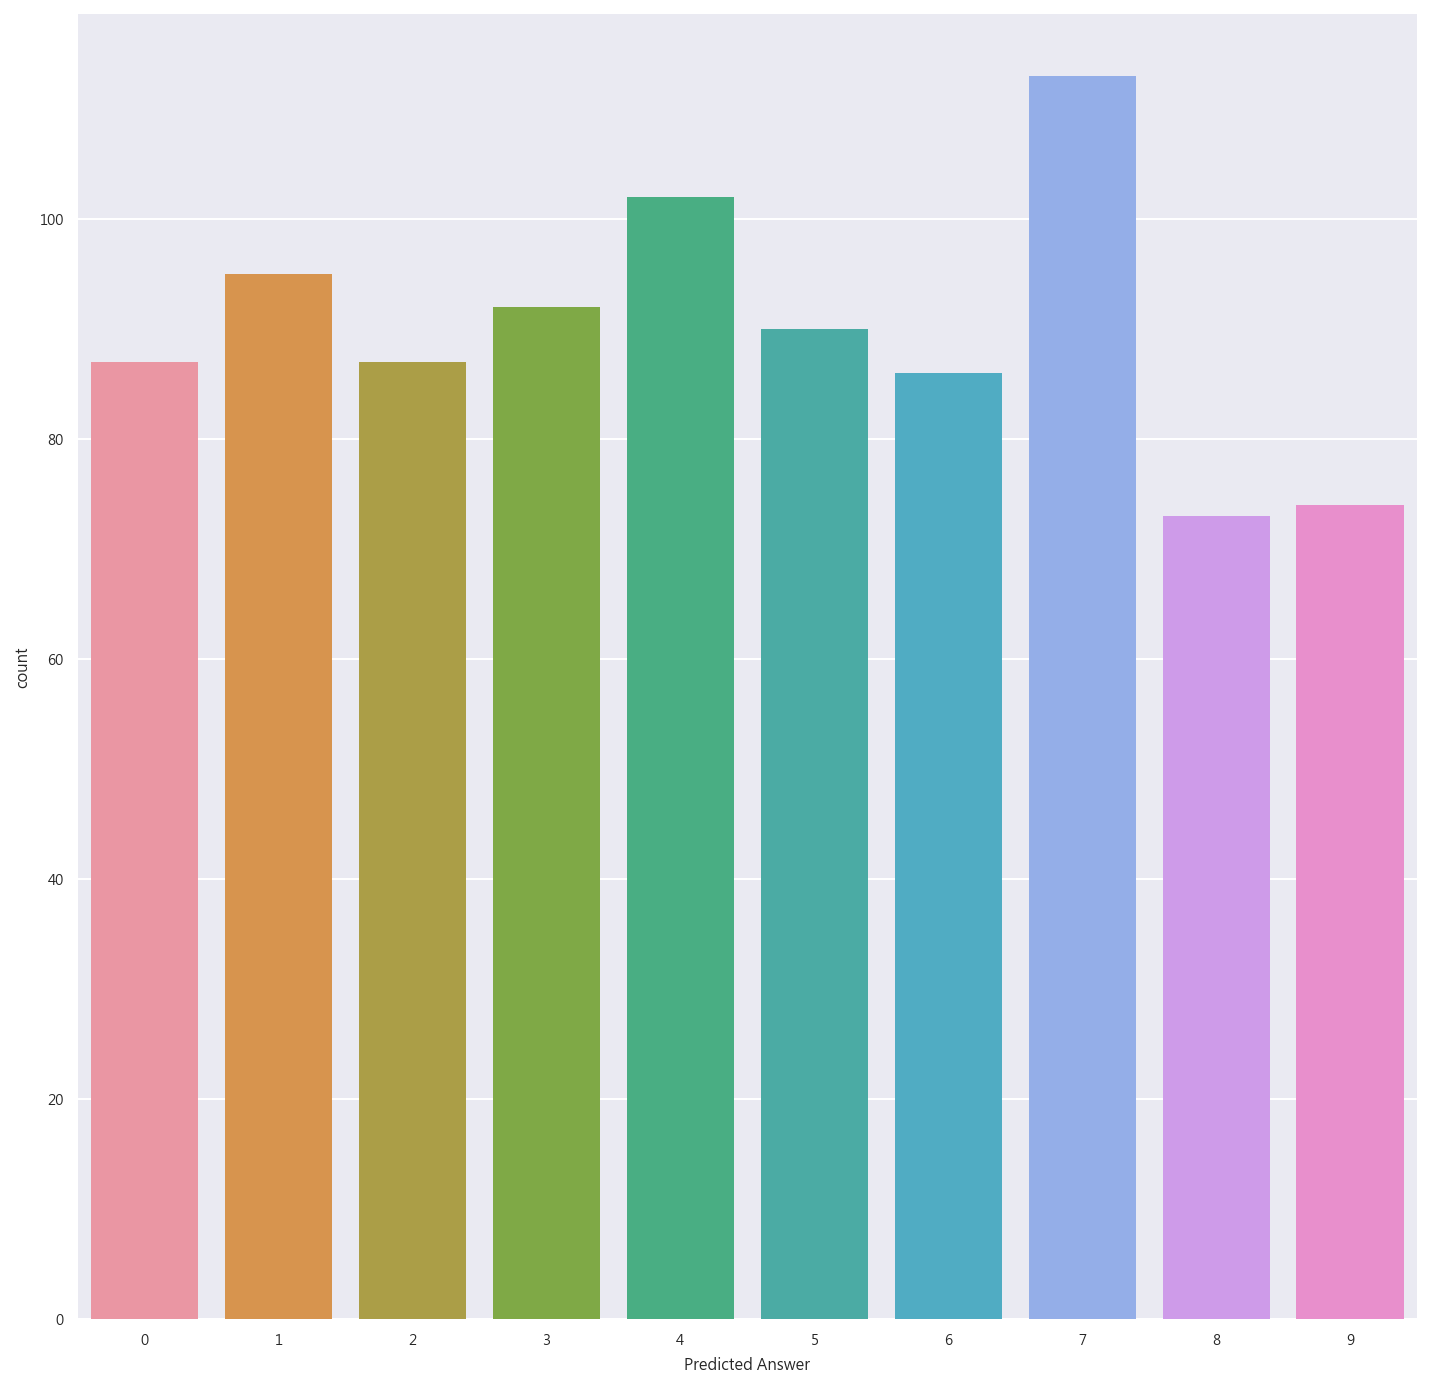

In [69]:
predictions = model.predict(TestX_Scaler)

if len(set(TrainY)) == 2 :
    Answer_by_keras = predictions.reshape((TestX_Scaler.shape[0]))
else:
    Answer_by_keras = pd.Series(list(set(TrainY)))[np.argmax(Train_Predict, axis=1) ].values
    
col_names = ['keras_p_' + str(s)  for s in range(0,len(set(TrainY)))]  

if not os.path.exists(OutputAnswerCSV):
    Test_Answer = pd.DataFrame()
else:
    Test_Answer = pd.read_csv(OutputAnswerCSV)

if len(set(TrainY)) == 2 :
    Answer_by_keras = predictions.reshape((TestX_Scaler.shape[0])).round(0)
    Test_Answer['keras'] = Answer_by_keras
    Test_Answer_prob = pd.DataFrame(np.hstack([1-predictions,predictions]),columns=col_names)
else:
    Answer_by_keras = np.argmax(predictions, axis=1) 
    Test_Answer['keras'] = Answer_by_keras
    Test_Answer_prob = pd.DataFrame(predictions,columns=col_names )
    

ax = sns.countplot(x=Answer_by_keras)
'稍微看一下預測的分佈情形'
ax.set(xlabel='Predicted Answer', ylabel='count')

Test_Answer['keras'] = Answer_by_keras
for col in col_names:
    Test_Answer[col] = Test_Answer_prob[col]
   
if TestY is not 0:
    print('以下為測試資料的預測結果準確率')
    if 'Truth' not in Test_Answer.columns:
        Test_Answer['Truth'] = TestY.values
    report = classification_report(TestY, Answer_by_keras,digits=4)
    print(os.linesep,report)
    TestReport = pd.concat([TestReport,TestReport_Metrics(
    TestReport,'DeepLearning',Test_Answer['Truth'],Test_Answer['keras'],Test_Answer['keras_p_1'])]).drop_duplicates(subset=['Algorithm'])
    #print(TestReport)
    


    
Test_Answer.to_csv(OutputAnswerCSV, index=False,header=True,encoding = 'utf8')



# 開啟結果檔

以下呈現各模型在訓練時，驗證的準確度比較圖

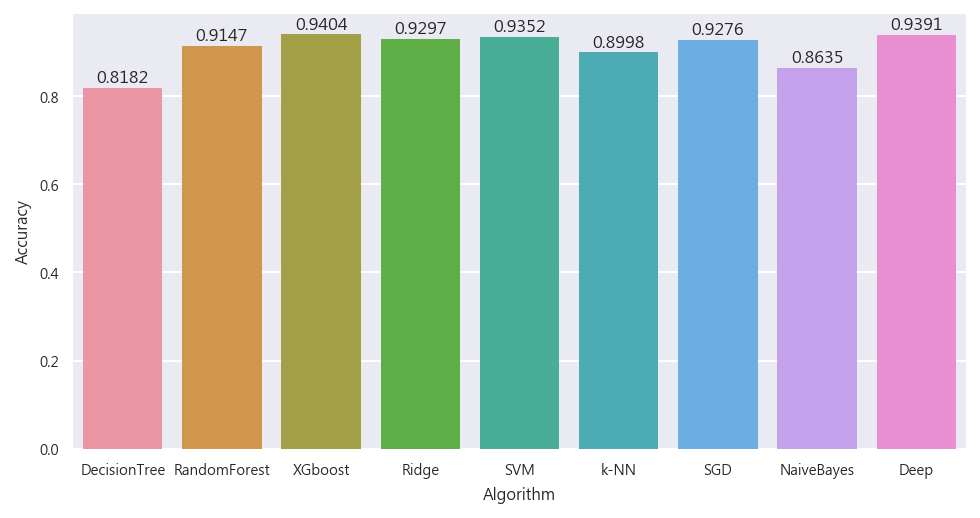

In [70]:
'模型簡單比較'
plt.rcParams['figure.figsize'] = (8,4)
algobarplot = sns.barplot(x='Algorithm',y='Accuracy',data=pd.DataFrame(list(Train_Valid_Acc.items()),columns=['Algorithm','Accuracy']))
for p in algobarplot.patches: algobarplot.annotate(np.round(p.get_height(),decimals=4), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

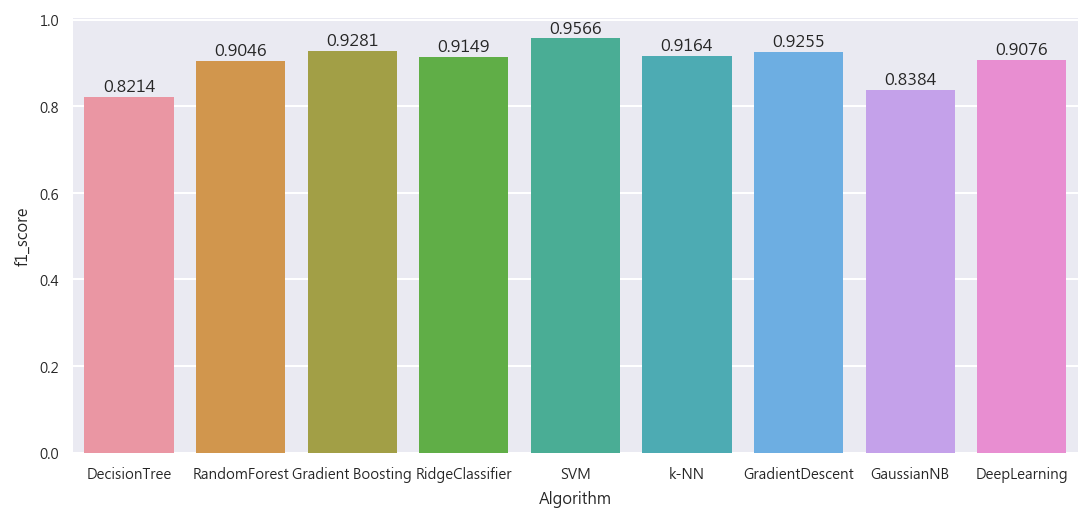

In [74]:
'模型簡單比較'
plt.rcParams['figure.figsize'] = (9,4)
if len(set(TrainY)) ==2 :
    algobarplot = sns.barplot(x='Algorithm',y='ROC_AUC',data=TestReport)
else:
    algobarplot = sns.barplot(x='Algorithm',y='f1_score',data=TestReport)

for p in algobarplot.patches: algobarplot.annotate(np.round(p.get_height(),decimals=4), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

In [73]:
import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "11pt")]),
            dict(selector="td",
                 props=[('padding', ".4em .4em"),("font-size", "13pt"),('min-width', '105px')])
            ]
#cm = sns.light_palette("green", as_cmap=True)

TestReport.reset_index(inplace=True,drop=True)
if len(set(TrainY)) >2 :
    temp = TestReport.drop(['ROC_AUC','confusion_matrix'],axis=1).style.set_precision(5).set_table_styles(magnify()).background_gradient(cmap='viridis', low=.9, high=0).highlight_null('Gainsboro')
else:
    temp = TestReport.drop(['confusion_matrix'],axis=1).style.set_precision(5).set_table_styles(magnify()).background_gradient(cmap='viridis', low=.9, high=0).highlight_null('Gainsboro')    
temp

,Algorithm,Accuracy,Precision,Recall,f1_score,Cohen's kappa,JaccardSim,HammingLoss
0,DecisionTree,0.82091,0.82303,0.82091,0.82142,0.80097,0.82091,-0.17909
1,RandomForest,0.90545,0.90766,0.90545,0.90455,0.89489,0.90545,-0.094549
2,Gradient Boosting,0.9277,0.9297,0.9277,0.9281,0.91964,0.9277,-0.072303
3,RidgeClassifier,0.91546,0.91616,0.91546,0.91487,0.90605,0.91546,-0.084538
4,SVM,0.95662,0.95733,0.95662,0.95664,0.95177,0.95662,-0.043382
5,k-NN,0.91657,0.91861,0.91657,0.91638,0.90727,0.91657,-0.083426
6,GradientDescent,0.92547,0.92686,0.92547,0.92553,0.91717,0.92547,-0.074527
7,GaussianNB,0.8376,0.85327,0.8376,0.83837,0.81962,0.8376,-0.1624
8,DeepLearning,0.90879,0.91299,0.90879,0.90763,0.89863,0.90879,-0.091212


以下呈現預測結果的檔案，會包含各模型預測結果、各模型預測各個分類的機率或函數(Ridge)

In [87]:
# from os import startfile
# startfile(OutputAnswerCSV)
from IPython.display import FileLink, FileLinks
FileLink('./'+OutputAnswerCSV)#lists all downloadable files on server

/home/i9e00411/Classification/digits_ans.csv

↑請點擊以上連結進行結果檔下載